In [1]:
#Supress Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import numpy and pandas packages
import numpy as np
import pandas as pd
import datetime

#import required libraries to plot
import matplotlib.pyplot as plt
import seaborn as sns

# set a seaborn style of your taste
#sns.set_style("whitegrid")
#plt.style.use('ggplot')
%matplotlib inline

In [3]:
#Set display options
#pd.set_option('display.max_columns',500)
pd.set_option('expand_frame_repr', True)

In [4]:
#Reading Datasets

# Making a list of missing value types
missing_values = ["n/a", "na", "--","NA","NaN"]

#application_data.csv
app_data = pd.read_csv('./application_data.csv',encoding='iso-8859-1',na_values = missing_values)

#Previous Application Dataset
prev_data = pd.read_csv('./previous_application.csv',encoding='iso-8859-1',na_values = missing_values)

#columns_description
col_descdf = pd.read_csv('./columns_description.csv',encoding='iso-8859-1')


In [5]:
#Lets First take first dataset - application_dataset.csv and do the analysis

#Print basic information about the dataset
print('Information about app_data:\n')
print(app_data.info())
print('Description of app_data:\n', app_data.describe())
print('Shape of app_data:\n',app_data.shape)

Information about app_data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Description of app_data:
           SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.

In [6]:
#Print datatypes of various columns available in app_data
print(app_data.dtypes)

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [7]:
#Print Sample records
print(app_data.head())

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [8]:
#Data Cleaning

#Lets first check missing values in columns and rows in our dataset.

#Define a function to check missing values in a dataset
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (100 *(data.isnull().sum()/data.isnull().count())).sort_values(ascending=False)
    return pd.concat([total,percent], axis=1, keys=['Total','Percent'])

In [9]:
#Print missing values information in app_data
print(missing_data(app_data))

                              Total    Percent
COMMONAREA_MEDI              214865  69.872297
COMMONAREA_AVG               214865  69.872297
COMMONAREA_MODE              214865  69.872297
NONLIVINGAPARTMENTS_MODE     213514  69.432963
NONLIVINGAPARTMENTS_MEDI     213514  69.432963
NONLIVINGAPARTMENTS_AVG      213514  69.432963
FONDKAPREMONT_MODE           210295  68.386172
LIVINGAPARTMENTS_MEDI        210199  68.354953
LIVINGAPARTMENTS_MODE        210199  68.354953
LIVINGAPARTMENTS_AVG         210199  68.354953
FLOORSMIN_MEDI               208642  67.848630
FLOORSMIN_MODE               208642  67.848630
FLOORSMIN_AVG                208642  67.848630
YEARS_BUILD_MEDI             204488  66.497784
YEARS_BUILD_AVG              204488  66.497784
YEARS_BUILD_MODE             204488  66.497784
OWN_CAR_AGE                  202929  65.990810
LANDAREA_MODE                182590  59.376738
LANDAREA_AVG                 182590  59.376738
LANDAREA_MEDI                182590  59.376738
BASEMENTAREA_

In [10]:
#Insight - I see that for some of the columns of app_data has more than or equal to 50% of missing values. 
#Lets just drop them as they will not be able to provide us any insight

NA_col = app_data.isnull().sum().sort_values()
#Lets see how many columns has more than 50% missing values.
NA_col = NA_col[NA_col.values >= (0.5*len(app_data))]
print(NA_col)

HOUSETYPE_MODE              154297
LIVINGAREA_AVG              154350
LIVINGAREA_MODE             154350
LIVINGAREA_MEDI             154350
ENTRANCES_AVG               154828
ENTRANCES_MODE              154828
ENTRANCES_MEDI              154828
APARTMENTS_MEDI             156061
APARTMENTS_AVG              156061
APARTMENTS_MODE             156061
WALLSMATERIAL_MODE          156341
ELEVATORS_MEDI              163891
ELEVATORS_AVG               163891
ELEVATORS_MODE              163891
NONLIVINGAREA_MODE          169682
NONLIVINGAREA_AVG           169682
NONLIVINGAREA_MEDI          169682
EXT_SOURCE_1                173378
BASEMENTAREA_MODE           179943
BASEMENTAREA_AVG            179943
BASEMENTAREA_MEDI           179943
LANDAREA_MEDI               182590
LANDAREA_AVG                182590
LANDAREA_MODE               182590
OWN_CAR_AGE                 202929
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
YEARS_BUILD_MEDI            204488
FLOORSMIN_AVG       

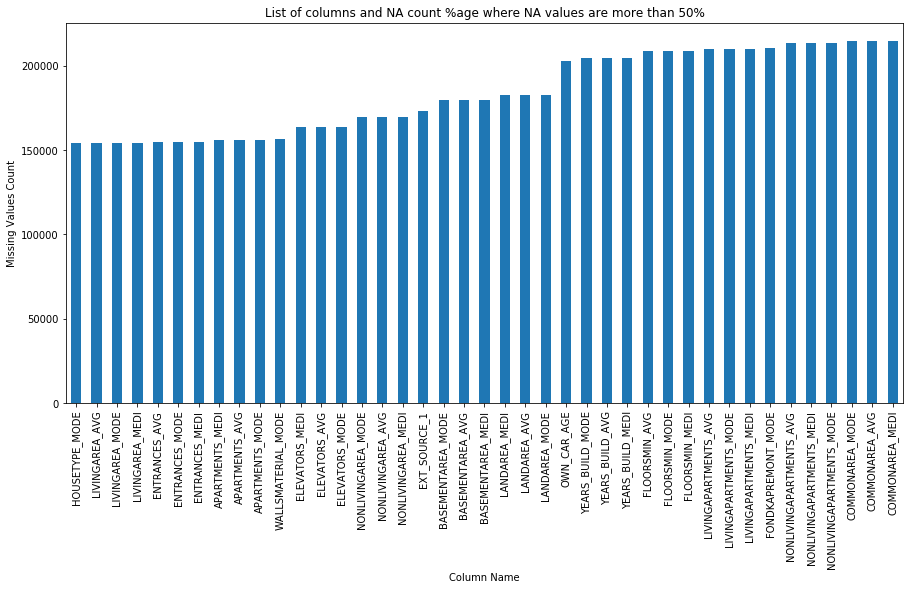

In [11]:
#Plot NA count for columns having more than 50% missing values
plt.figure(figsize=(15,7))
NA_col.plot(kind='bar')
plt.title('List of columns and NA count %age where NA values are more than 50%')
plt.xlabel("Column Name")
plt.ylabel("Missing Values Count")
plt.show()

In [12]:
#Insights: There are 41 columns which have more than 50% missing values.

In [13]:
#Drop those columns where missing values>= 50% as they will not be able to provide us 
#any insight into the situation.
col_to_remove = NA_col.index.to_list()
#Create a backup of app_data
cleaned_app_data = app_data.copy()
print('Number of rows,Number of columns of cleaned dataset before removing columns:\n',cleaned_app_data.shape)

cleaned_app_data = cleaned_app_data[cleaned_app_data.columns.difference(col_to_remove)]
print('\nNumber of rows,Number of columns of cleaned dataset after above step:\n', cleaned_app_data.shape)
print('\nSample data of our cleaned dataset:\n',cleaned_app_data.head())


Number of rows,Number of columns of cleaned dataset before removing columns:
 (307511, 122)

Number of rows,Number of columns of cleaned dataset after above step:
 (307511, 81)

Sample data of our cleaned dataset:
    AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  \
0      24700.5    406597.5         351000.0          202500.0   
1      35698.5   1293502.5        1129500.0          270000.0   
2       6750.0    135000.0         135000.0           67500.0   
3      29686.5    312682.5         297000.0          135000.0   
4      21865.5    513000.0         513000.0          121500.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT

In [14]:
#Checking out rows with more than 50% or 30% missing values

NA_row = 100*(cleaned_app_data.transpose().isnull().sum()/len(cleaned_app_data))
print(NA_row[NA_row.values > (0.5 * len(cleaned_app_data))])
print(NA_row[NA_row.values > (0.3 * len(cleaned_app_data))])

Series([], dtype: float64)
Series([], dtype: float64)


In [15]:
#Insights - Unlike Columns, there are no rows having more than 50% or 30% missing values

In [16]:
#Remove columns with only one unique values
uniq_cleaned_app_data= cleaned_app_data.loc[:,cleaned_app_data.nunique()!=1]
print(uniq_cleaned_app_data.shape)


(307511, 81)


In [17]:
#Insight - I see that there is no column in our dataset with a single value

In [18]:
#After checking columns description of above listed columns,
#we came to know that not all the columns are required for our analysis

#Creating a list of required fields for this analysis
required_fields_for_analysis = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']

#Selecting only those columns which are required for this analysis
required_app_data = uniq_cleaned_app_data[uniq_cleaned_app_data.columns.intersection(required_fields_for_analysis)]
print('Number of rows,Number of columns left in dataset after chossing specific columns step:\n', required_app_data.shape)
print('\nSample data of our dataset after above step:\n', required_app_data.head())

#Check if required fields are imported with correct dtype
print('\nDatatypes of our left columns are:\n', required_app_data.dtypes)

Number of rows,Number of columns left in dataset after chossing specific columns step:
 (307511, 20)

Sample data of our dataset after above step:
    AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  AMT_INCOME_TOTAL  CNT_CHILDREN  \
0      24700.5    406597.5         351000.0          202500.0             0   
1      35698.5   1293502.5        1129500.0          270000.0             0   
2       6750.0    135000.0         135000.0           67500.0             0   
3      29686.5    312682.5         297000.0          135000.0             0   
4      21865.5    513000.0         513000.0          121500.0             0   

   CNT_FAM_MEMBERS CODE_GENDER  DAYS_BIRTH  DAYS_EMPLOYED FLAG_OWN_CAR  \
0              1.0           M       -9461           -637            N   
1              2.0           F      -16765          -1188            N   
2              1.0           M      -19046           -225            Y   
3              2.0           F      -19005          -3039            N   
4      

In [19]:
#Here I see that field 'TARGET' is of integer type but in our analysis,
#it is a categorical variable which indictaes whether the customer would be able to pay loan or not.
#So changing its dtype.

required_app_data['TARGET'] = required_app_data['TARGET'].astype('object')

#Creating New Metrics
#Creating new fields as Age and employment experience through Days_Birth divided by 365.29 and DAYS_EMPLOYED divided by 365.29.
#Here division is done by 365.29 to get better view in case of leapyear

required_app_data['AGE'] = round(abs(required_app_data['DAYS_BIRTH']/365.29))
required_app_data['EMPLOYMENT_EXPERIENCE'] = round(abs(required_app_data['DAYS_EMPLOYED']/365.29))


#Drop DAYS_BIRTH and DAYS_EMPLOYED fields as they are no more required.
required_app_data.drop('DAYS_BIRTH', axis=1, inplace=True)
required_app_data.drop('DAYS_EMPLOYED', axis=1, inplace=True)
print('Datatypes of our columns:\n',required_app_data.dtypes)
required_app_data.head()

Datatypes of our columns:
 AMT_ANNUITY              float64
AMT_CREDIT               float64
AMT_GOODS_PRICE          float64
AMT_INCOME_TOTAL         float64
CNT_CHILDREN               int64
CNT_FAM_MEMBERS          float64
CODE_GENDER               object
FLAG_OWN_CAR              object
FLAG_OWN_REALTY           object
NAME_CONTRACT_TYPE        object
NAME_EDUCATION_TYPE       object
NAME_FAMILY_STATUS        object
NAME_HOUSING_TYPE         object
NAME_INCOME_TYPE          object
OCCUPATION_TYPE           object
ORGANIZATION_TYPE         object
SK_ID_CURR                 int64
TARGET                    object
AGE                      float64
EMPLOYMENT_EXPERIENCE    float64
dtype: object


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,TARGET,AGE,EMPLOYMENT_EXPERIENCE
0,24700.5,406597.5,351000.0,202500.0,0,1.0,M,N,Y,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Laborers,Business Entity Type 3,100002,1,26.0,2.0
1,35698.5,1293502.5,1129500.0,270000.0,0,2.0,F,N,N,Cash loans,Higher education,Married,House / apartment,State servant,Core staff,School,100003,0,46.0,3.0
2,6750.0,135000.0,135000.0,67500.0,0,1.0,M,Y,Y,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Laborers,Government,100004,0,52.0,1.0
3,29686.5,312682.5,297000.0,135000.0,0,2.0,F,N,Y,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Laborers,Business Entity Type 3,100006,0,52.0,8.0
4,21865.5,513000.0,513000.0,121500.0,0,1.0,M,N,Y,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Core staff,Religion,100007,0,55.0,8.0


In [20]:
#Task: Missing Values imputation 

#Check for missing data for our choosen columns
missing_data(required_app_data)

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650
FLAG_OWN_REALTY,0,0.000000
AMT_CREDIT,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
CNT_CHILDREN,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000


#Insights -
#I see that there are still some columns with missing values in our dataset. 
#Out of which, few are categorical variable while others are quantitative variables.

Now, we can impute the missing values through various ways:
    1. Remove those columns if we have higher proportion of missing data
    2. Replace them with 
        - Mean/Median/Mode in case of quantitative variables.
        - Most repeated value in case of categorical variables.
    3. Replace with a default value
    4. Leave as it is.

In our case, as the columns with higher proportion of missing values, we have already dropped and now we have very less proportion of it.
Lets first find out the most frequent value for categorical fields - OCCUPATION_TYPE
and median/mode for numeric fields - AMT_GOODS_PRICE, AMT_ANNUITY, CNT_FAM_MEMBERS, as there are chances of having outliers in our data


In [21]:
print('Most frequent occupation type:\n', required_app_data.OCCUPATION_TYPE.mode().values[0])
print('Median of Goods_price amount field:\n',required_app_data.AMT_GOODS_PRICE.median())
print('Median of AMT_ANNUITY is:\n',required_app_data.AMT_ANNUITY.median() )
print('Most repetitive count of family members is:\n ', required_app_data.CNT_FAM_MEMBERS.mode().values[0])


Most frequent occupation type:
 Laborers
Median of Goods_price amount field:
 450000.0
Median of AMT_ANNUITY is:
 24903.0
Most repetitive count of family members is:
  2.0


In [22]:
required_app_data.OCCUPATION_TYPE.fillna(required_app_data.OCCUPATION_TYPE.mode().values[0],inplace=True)
required_app_data.AMT_GOODS_PRICE.fillna(required_app_data.AMT_GOODS_PRICE.median(), inplace=True)
required_app_data.AMT_ANNUITY.fillna(required_app_data.AMT_ANNUITY.median(), inplace=True)
required_app_data.CNT_FAM_MEMBERS.fillna(required_app_data.CNT_FAM_MEMBERS.mode().values[0],inplace=True)

In [23]:
#Family number count cannot be a decimal. It should be an integer. So changinf its type to int.
required_app_data['CNT_FAM_MEMBERS'] = required_app_data['CNT_FAM_MEMBERS'].astype('int')
#Changing dtype of EMPLOYMENT_EXPERIENCE to int.
required_app_data['EMPLOYMENT_EXPERIENCE'] = required_app_data['EMPLOYMENT_EXPERIENCE'].astype('int')

required_app_data.dtypes

AMT_ANNUITY              float64
AMT_CREDIT               float64
AMT_GOODS_PRICE          float64
AMT_INCOME_TOTAL         float64
CNT_CHILDREN               int64
CNT_FAM_MEMBERS            int32
CODE_GENDER               object
FLAG_OWN_CAR              object
FLAG_OWN_REALTY           object
NAME_CONTRACT_TYPE        object
NAME_EDUCATION_TYPE       object
NAME_FAMILY_STATUS        object
NAME_HOUSING_TYPE         object
NAME_INCOME_TYPE          object
OCCUPATION_TYPE           object
ORGANIZATION_TYPE         object
SK_ID_CURR                 int64
TARGET                    object
AGE                      float64
EMPLOYMENT_EXPERIENCE      int32
dtype: object

In [24]:
#Task - 
#Lets now check for outliers in our dataset

#Find the numeric columns in both datasets
numerictype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #List containing the different numeric datatypes
numeric_columns_appdf = required_app_data.select_dtypes(include = numerictype).columns
print(numeric_columns_appdf)


Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'SK_ID_CURR', 'AGE',
       'EMPLOYMENT_EXPERIENCE'],
      dtype='object')


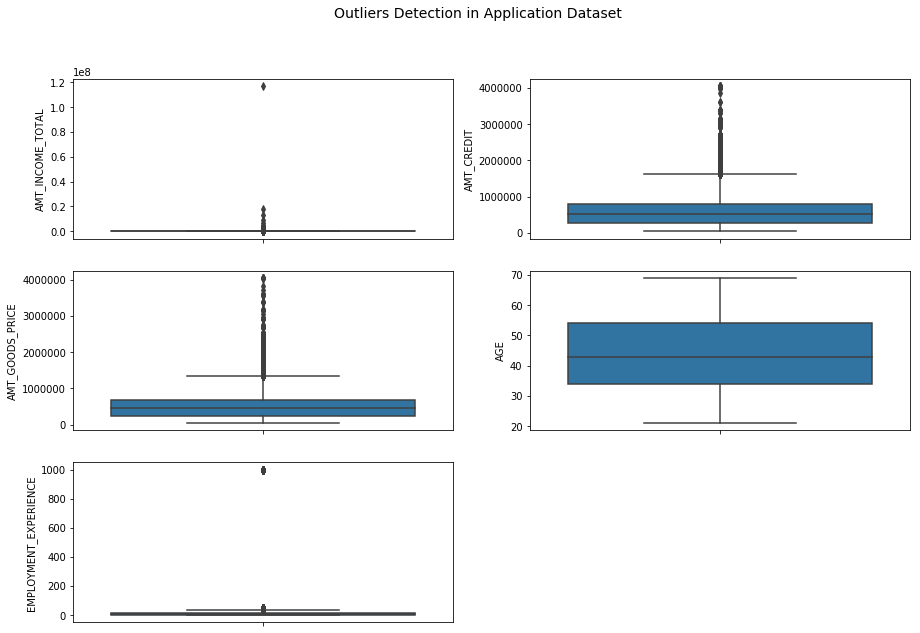

In [25]:
#Checking for outliers in AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, AGE, EMPLOYMENT_EXPERIENCE
fig=plt.figure(figsize=(15,10))
fig.suptitle("Outliers Detection in Application Dataset", fontsize=14)
plt.subplot(321)
sns.boxplot(y=required_app_data['AMT_INCOME_TOTAL'])
plt.subplot(322)
sns.boxplot(y=required_app_data['AMT_CREDIT'])
plt.subplot(323)
sns.boxplot(y=required_app_data['AMT_GOODS_PRICE'])
plt.subplot(324)
sns.boxplot(y=required_app_data['AGE'])
plt.subplot(325)
sns.boxplot(y=required_app_data['EMPLOYMENT_EXPERIENCE'])
plt.show()

In [26]:
#Insight - Above box plots clearly shows that other than AGE, each column has outliers in our dataset.
#As it may distort our analysis, so we will remove these datapoints.

#After looking at the dataset, I found that we have some infinite values in DAYS_EXPERIENCE columns i.e. 365243 
#which is equivalent to 1000 years. Clearly it is an outlier. So, Lets first drop these values

required_app_data_backup = required_app_data.copy()
#required_app_data.shape #(307511,20)

required_app_data = required_app_data[required_app_data['EMPLOYMENT_EXPERIENCE']<999]
#required_app_data.shape #252137,20
#required_app_data.head()

In [27]:
#Also, I found that there is a huge value gap in 99% values and top 1% for above plotted dataset.
#Lets now remove top 1% of datapoints to remove outliers in our dataset.

required_app_data2=required_app_data.copy()
threshold_income = required_app_data['AMT_INCOME_TOTAL'].quantile([0.99]).values[0]

row_index_to_rm_income = required_app_data[required_app_data['AMT_INCOME_TOTAL'] > threshold_income].index
#print(row_index_to_rm_income.shape) #2495
app_data_without_income_outliers = required_app_data2.drop(row_index_to_rm_income)
#print(app_data_without_income_outliers.shape)  #249642

threshold_credit = app_data_without_income_outliers['AMT_CREDIT'].quantile([0.99]).values[0]
row_index_to_rm_credit = app_data_without_income_outliers[app_data_without_income_outliers['AMT_CREDIT'] > threshold_credit].index
#print(row_index_to_rm_credit.shape) #2494
app_data_without_credit_outliers = app_data_without_income_outliers.drop(row_index_to_rm_credit)
#print(app_data_without_credit_outliers.shape)  #247148

threshold_good_price = app_data_without_credit_outliers['AMT_GOODS_PRICE'].quantile([0.99]).values[0]
row_index_to_rm_goods_price = app_data_without_credit_outliers[app_data_without_credit_outliers['AMT_GOODS_PRICE'] > threshold_good_price].index
#print(row_index_to_rm_goods_price.shape) #1270
app_data_without_gprice_outliers = app_data_without_credit_outliers.drop(row_index_to_rm_goods_price)
#print(app_data_without_gprice_outliers.shape)  #245878

threshold_experience = app_data_without_gprice_outliers['EMPLOYMENT_EXPERIENCE'].quantile([0.99]).values[0]
row_index_to_rm_exp = app_data_without_gprice_outliers[app_data_without_gprice_outliers['EMPLOYMENT_EXPERIENCE'] > threshold_experience].index
#print(row_index_to_rm_exp.shape)#2215
app_data_without_exp_outliers = app_data_without_gprice_outliers.drop(row_index_to_rm_exp)
#print(app_data_without_exp_outliers.shape)  #243663

app_data_without_outliers = app_data_without_exp_outliers.copy()


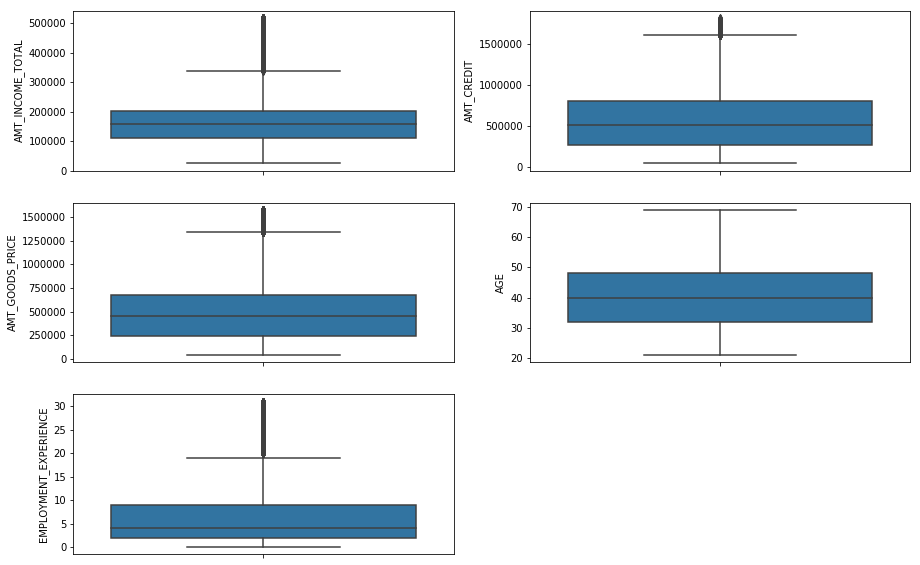

In [28]:
#Checking again for outliers in AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, AGE, EMPLOYMENT_EXPERIENCE
plt.figure(figsize=(15,10))
plt.subplot(321)
sns.boxplot(y=app_data_without_outliers['AMT_INCOME_TOTAL'])
plt.subplot(322)
sns.boxplot(y=app_data_without_outliers['AMT_CREDIT'])
plt.subplot(323)
sns.boxplot(y=app_data_without_outliers['AMT_GOODS_PRICE'])
plt.subplot(324)
sns.boxplot(y=app_data_without_outliers['AGE'])
plt.subplot(325)
sns.boxplot(y=app_data_without_outliers['EMPLOYMENT_EXPERIENCE'])
plt.show()

#Insights- 
1. There are still some outliers in our dataset but we will keep them for our analysis.
2. I see that all above amount fileds, age and experience are continuous variable. So, lets divide them into bins.


In [29]:
#-----------------------Derived Metrics----------------------------------------#
#As AMT_INCOME_TOTAL, AMT_ANNUITY, AMT_CREDIT and AMT_GOODS_PRICE are continuous variables, Let's divide
#them into bins so that we can do the analysis on them to get a better insight.

income_range_list = list(app_data_without_outliers['AMT_INCOME_TOTAL'].quantile([0, 0.25, 0.5,0.75,1]).values)
income_range_list.insert(0,0)
print(income_range_list)

amt_annuity_list = list(app_data_without_outliers['AMT_ANNUITY'].quantile([0.5, 0.998,1]).values)
amt_annuity_list.insert(0,0)
print(amt_annuity_list)

amt_credit_list = list(app_data_without_outliers['AMT_CREDIT'].quantile([0,0.25,0.5,0.75,1]).values)
amt_credit_list.insert(0,0)
print(amt_credit_list)

amt_gprice_list = list(app_data_without_outliers['AMT_GOODS_PRICE'].quantile([0,0.25,0.5,0.75,1]).values)
amt_gprice_list.insert(0,0)
print(amt_gprice_list)

#age_list = list(app_data_without_outliers['AGE'].quantile([0,0.5,1]).values)
#age_list.insert(0,0)
#print(age_list)

#exp_list = list(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'].quantile([0,0.25,0.7,0.75,1]).values)
#As we have minimum experince as 0, so not inserting 0 again in experience list
#print(exp_list)

income_slot = ['0-25650', '25650-112500', '112500-157500', '157500-202500', '202500-517500']
app_data_without_outliers['INCOME_RANGE'] =pd.cut(app_data_without_outliers['AMT_INCOME_TOTAL'], income_range_list, labels=income_slot)

#annuity_slot = []
credit_slot = ['0-45000', '45000-272520', '272520-512447','512447-808650', '808650-1822158']
app_data_without_outliers['CREDIT_RANGE'] = pd.cut(app_data_without_outliers['AMT_CREDIT'], amt_credit_list, labels=credit_slot)

gprice_slot = ['0-40500', '40500-238500', '238500-450000', '450000-679500', '679500-1575000']
app_data_without_outliers['GOODS_PRICE_RANGE'] = pd.cut(app_data_without_outliers['AMT_GOODS_PRICE'], amt_gprice_list, labels=gprice_slot)

#age_slot = ['0-21', '21-40', '40-70']
#app_data_without_outliers['AGE_RANGE'] = pd.cut(app_data_without_outliers['AGE'], age_list, labels=age_slot)

#exp_slot = ['0-1','1-10','10-20','20-31']
#app_data_without_outliers['EXP_RANGE'] = pd.cut(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'], exp_list, labels=exp_slot)

[0, 25650.0, 112500.0, 157500.0, 202500.0, 517500.0]
[0, 25447.5, 88969.5, 150759.0]
[0, 45000.0, 272520.0, 512446.5, 808650.0, 1822158.0]
[0, 40500.0, 238500.0, 450000.0, 679500.0, 1575000.0]


In [30]:
app_data_without_outliers.head(100)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_CONTRACT_TYPE,...,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,SK_ID_CURR,TARGET,AGE,EMPLOYMENT_EXPERIENCE,INCOME_RANGE,CREDIT_RANGE,GOODS_PRICE_RANGE
0,24700.5,406597.5,351000.0,202500.0,0,1,M,N,Y,Cash loans,...,Working,Laborers,Business Entity Type 3,100002,1,26.0,2,157500-202500,272520-512447,238500-450000
1,35698.5,1293502.5,1129500.0,270000.0,0,2,F,N,N,Cash loans,...,State servant,Core staff,School,100003,0,46.0,3,202500-517500,808650-1822158,679500-1575000
2,6750.0,135000.0,135000.0,67500.0,0,1,M,Y,Y,Revolving loans,...,Working,Laborers,Government,100004,0,52.0,1,25650-112500,45000-272520,40500-238500
3,29686.5,312682.5,297000.0,135000.0,0,2,F,N,Y,Cash loans,...,Working,Laborers,Business Entity Type 3,100006,0,52.0,8,112500-157500,272520-512447,238500-450000
4,21865.5,513000.0,513000.0,121500.0,0,1,M,N,Y,Cash loans,...,Working,Core staff,Religion,100007,0,55.0,8,112500-157500,512447-808650,450000-679500
5,27517.5,490495.5,454500.0,99000.0,0,2,M,N,Y,Cash loans,...,State servant,Laborers,Other,100008,0,46.0,4,25650-112500,272520-512447,450000-679500
6,41301.0,1560726.0,1395000.0,171000.0,1,3,F,Y,Y,Cash loans,...,Commercial associate,Accountants,Business Entity Type 3,100009,0,38.0,9,157500-202500,808650-1822158,679500-1575000
7,42075.0,1530000.0,1530000.0,360000.0,0,2,M,Y,Y,Cash loans,...,State servant,Managers,Other,100010,0,52.0,1,202500-517500,808650-1822158,679500-1575000
9,20250.0,405000.0,405000.0,135000.0,0,1,M,N,Y,Revolving loans,...,Working,Laborers,Electricity,100012,0,40.0,6,112500-157500,272520-512447,238500-450000
10,21177.0,652500.0,652500.0,112500.0,1,3,F,N,Y,Cash loans,...,Working,Core staff,Medicine,100014,0,28.0,2,25650-112500,512447-808650,450000-679500


In [31]:
#app_data_without_outliers = app_data_without_outliers.drop(['Family_Count'],axis = 1)

In [32]:
#Creating a new column emp term to have the range for the employement experience
#Let's divide EMPLOYMENT_EXPERIENCE also into bins so that we can do the analysis on them 
#to get a better insight on the basis of experience.

app_data_without_outliers.loc[(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] < 1),'EMP_TERM'] = '0-1 year'
app_data_without_outliers.loc[(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] >= 1) & (app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] <= 10), 'EMP_TERM'] = '1 - 10 years'
app_data_without_outliers.loc[(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] > 10) & (app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] <= 20), 'EMP_TERM'] = '11 - 20 years'
app_data_without_outliers.loc[(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] > 20) & (app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] <= 30), 'EMP_TERM'] = '21 - 30 years'
app_data_without_outliers.loc[(app_data_without_outliers['EMPLOYMENT_EXPERIENCE'] > 30),'EMP_TERM'] = '30+ years'

In [33]:
#Creating a new column age_group to have the range for the age group
#Let's divide AGE also into bins so that we can do the analysis on them 
#to get a better insight on the basis of age as age is also a continuous variable.


app_data_without_outliers.loc[(app_data_without_outliers.AGE < 10),'AGE_RANGE'] = '0-10 year'
app_data_without_outliers.loc[(app_data_without_outliers.AGE >= 10) & (app_data_without_outliers.AGE <= 20), 'AGE_RANGE'] = '11 - 20 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 20) & (app_data_without_outliers.AGE <= 30), 'AGE_RANGE'] = '21 - 30 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 30) & (app_data_without_outliers.AGE <= 40), 'AGE_RANGE'] = '31 - 40 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 40) & (app_data_without_outliers.AGE <= 50), 'AGE_RANGE'] = '41 - 50 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 50) & (app_data_without_outliers.AGE <= 60), 'AGE_RANGE'] = '51 - 60 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 60) & (app_data_without_outliers.AGE <= 70), 'AGE_RANGE'] = '61 - 70 years'
app_data_without_outliers.loc[(app_data_without_outliers.AGE > 70),'AGE_RANGE'] = '70+ years'

In [34]:
#Creating a new column Children count to have the range for the count of Children

app_data_without_outliers.loc[(app_data_without_outliers.CNT_CHILDREN >= 0) & (app_data_without_outliers.CNT_CHILDREN <= 2), 'Children_Count'] = '0-2'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_CHILDREN > 2) & (app_data_without_outliers.CNT_CHILDREN <= 5), 'Children_Count'] = '3-5'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_CHILDREN > 5) & (app_data_without_outliers.CNT_CHILDREN <= 10), 'Children_Count'] = '6-10'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_CHILDREN > 10),'Children_Count'] = '10+'

In [35]:
#Creating a new column Family Member Count to have the range for count of Family members
app_data_without_outliers.loc[(app_data_without_outliers.CNT_FAM_MEMBERS >= 0) & (app_data_without_outliers.CNT_FAM_MEMBERS <= 2), 'Family_Count'] = '0-2'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_FAM_MEMBERS > 2) & (app_data_without_outliers.CNT_FAM_MEMBERS <= 5), 'Family_Count'] = '3-5'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_FAM_MEMBERS > 5) & (app_data_without_outliers.CNT_FAM_MEMBERS <= 10), 'Family_Count'] = '6-10'
app_data_without_outliers.loc[(app_data_without_outliers.CNT_FAM_MEMBERS > 10),'Family_Count'] = '10+'

In [36]:
app_data_without_outliers.dtypes   #Check category dtypes

AMT_ANNUITY               float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
AMT_INCOME_TOTAL          float64
CNT_CHILDREN                int64
CNT_FAM_MEMBERS             int32
CODE_GENDER                object
FLAG_OWN_CAR               object
FLAG_OWN_REALTY            object
NAME_CONTRACT_TYPE         object
NAME_EDUCATION_TYPE        object
NAME_FAMILY_STATUS         object
NAME_HOUSING_TYPE          object
NAME_INCOME_TYPE           object
OCCUPATION_TYPE            object
ORGANIZATION_TYPE          object
SK_ID_CURR                  int64
TARGET                     object
AGE                       float64
EMPLOYMENT_EXPERIENCE       int32
INCOME_RANGE             category
CREDIT_RANGE             category
GOODS_PRICE_RANGE        category
EMP_TERM                   object
AGE_RANGE                  object
Children_Count             object
Family_Count               object
dtype: object

In [37]:
#Data Analysis:

In [38]:
#Replacing the values if Target column from 0 and 1 to Non-Defaulter to Defaulter
app_data_without_outliers['TARGET'] = app_data_without_outliers['TARGET'].replace(0, 'Non-Defaulter')
app_data_without_outliers['TARGET'] = app_data_without_outliers['TARGET'].replace(1, 'Defaulter')

In [39]:
#Task - Data Imbalance

#Univariate Analysis
def univariate_analysis(df,col,title=None,x_label=None,len_pdf=None):
    if(title==None):
        title = col
    if(len_pdf==None):
        len_pdf = len(df)
        
    plt.figure(figsize=(12,5))
    ax = df[col].value_counts().plot(kind="bar",rot=45,figsize = (10,5),alpha=0.75,fontsize = 11)
    plt.title(title, fontsize=14)
    plt.ylabel('Number of Applications',fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len_pdf),
            ha="center") 
    plt.show()
    

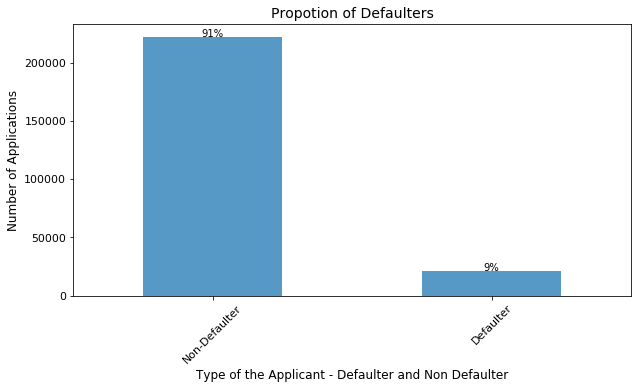

In [40]:
univariate_analysis(app_data_without_outliers,'TARGET','Propotion of Defaulters','Type of the Applicant - Defaulter and Non Defaulter')

In [41]:
#Insight - The above graph implies that we have less number of applicants with payment difficulties

In [42]:
#Lets now first divide our dataset into two: one for defaulter group and other is for non-defaulter group.
app_defaulter_df = app_data_without_outliers[app_data_without_outliers['TARGET']=='Defaulter']
app_nondefaulter_df = app_data_without_outliers[app_data_without_outliers['TARGET']=='Non-Defaulter']
print('Shape of Defaulter Dataset is:\n', app_defaulter_df.shape)
print('Shape of Non-Defaulter Dataset is:\n', app_nondefaulter_df.shape)

Shape of Defaulter Dataset is:
 (21469, 27)
Shape of Non-Defaulter Dataset is:
 (222194, 27)


In [43]:
print('Percentage of Deafulter applicants in our dataset: ', round(100 *(len(app_defaulter_df)/len(app_data_without_outliers)),2))
print('Percentage of Non-Deafulter applicants in our dataset: ', round(100 *(len(app_nondefaulter_df)/len(app_data_without_outliers)),2))

print('Data Imbalance Percentage in our dataset is: ', round(100 *(len(app_defaulter_df)/len(app_nondefaulter_df)),2))

Percentage of Deafulter applicants in our dataset:  8.81
Percentage of Non-Deafulter applicants in our dataset:  91.19
Data Imbalance Percentage in our dataset is:  9.66


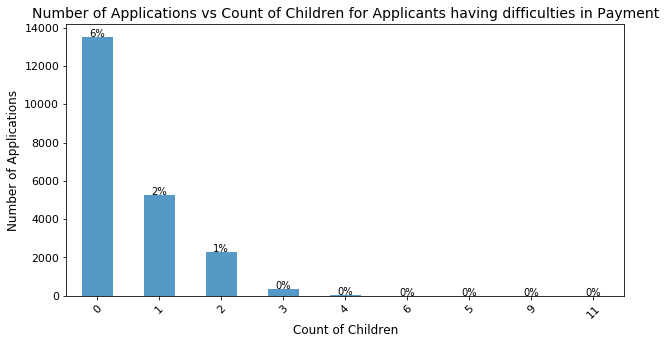

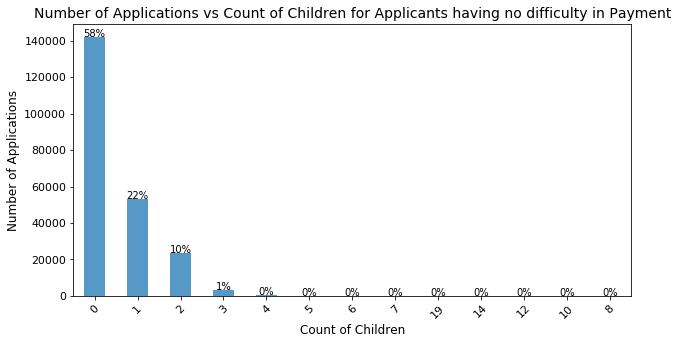

In [44]:
#Univariate Analyis for Defaulter and Non-Defaulter Dataset

#Children Count

univariate_analysis(app_defaulter_df,'CNT_CHILDREN','Number of Applications vs Count of Children for Applicants having difficulties in Payment','Count of Children',len(app_data_without_outliers))
univariate_analysis(app_nondefaulter_df,'CNT_CHILDREN','Number of Applications vs Count of Children for Applicants having no difficulty in Payment','Count of Children',len(app_data_without_outliers) )

In [45]:
#Insight - The number of loan applications by defaulters and non defaulters are more if the count of children is less.

#There are high chances that people with no kid has huge chances of paying their due on time. 
#I dont see any significant difference because of numeber of kids on Applicant behavior.


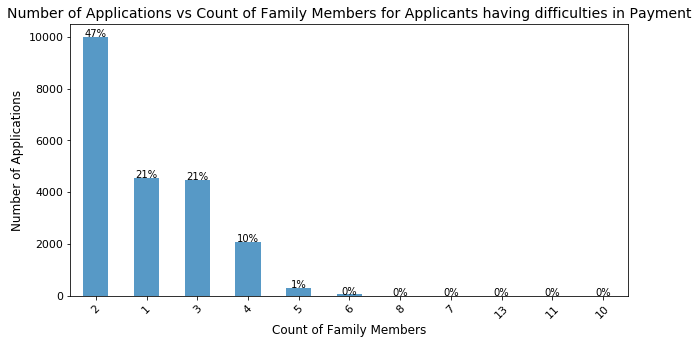

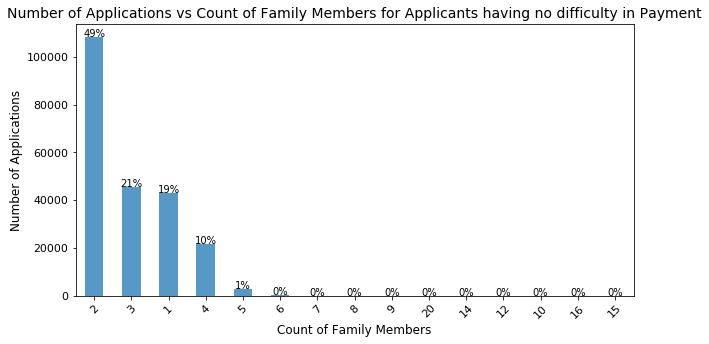

In [46]:
#Count of Family members

univariate_analysis(app_defaulter_df,'CNT_FAM_MEMBERS','Number of Applications vs Count of Family Members for Applicants having difficulties in Payment','Count of Family Members')
univariate_analysis(app_nondefaulter_df,'CNT_FAM_MEMBERS','Number of Applications vs Count of Family Members for Applicants having no difficulty in Payment','Count of Family Members')

In [47]:
#Insight - The number of loan applications by defaulters and non defaulters are more if the count of family members is 2.

#Here, I see that no matter howmanyever family members an applicant has, there is an imbalance of 10% people in defaulets and non-defaulters.


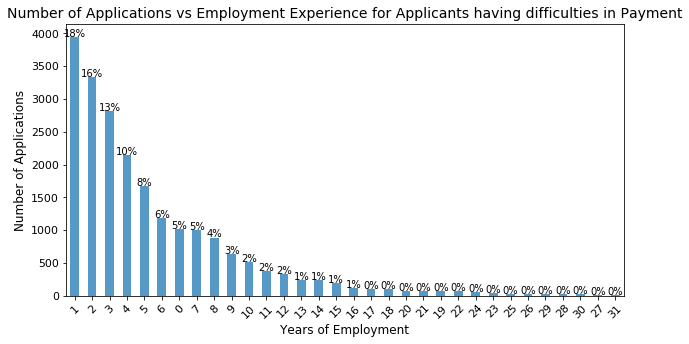

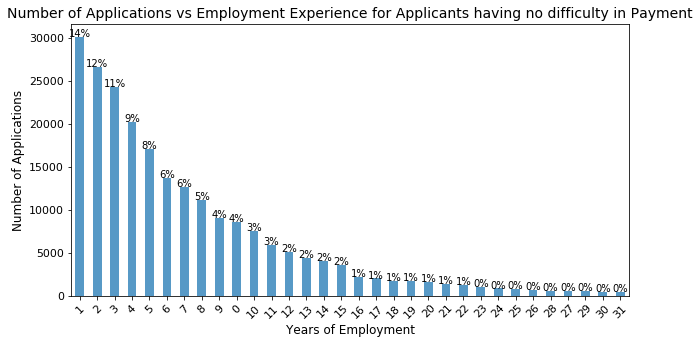

In [48]:
#Employment Experience

univariate_analysis(app_defaulter_df,'EMPLOYMENT_EXPERIENCE','Number of Applications vs Employment Experience for Applicants having difficulties in Payment','Years of Employment')
univariate_analysis(app_nondefaulter_df,'EMPLOYMENT_EXPERIENCE','Number of Applications vs Employment Experience for Applicants having no difficulty in Payment','Years of Employment')

In [49]:
#Insight - The number of loan applications are more if the applicant has a employment experience of less than 10 years 
#as compared to the applicants with higher work experience

#Clearly, with increase in employment experience there are less chances of being a defaulter.

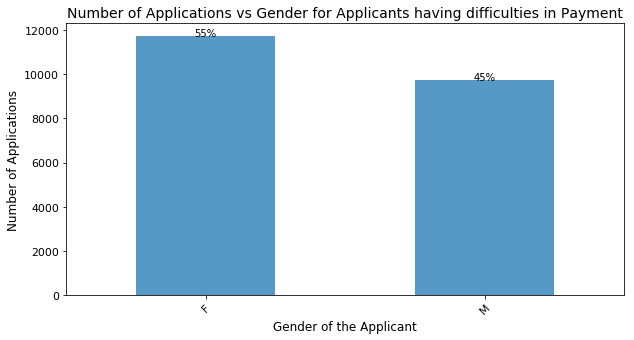

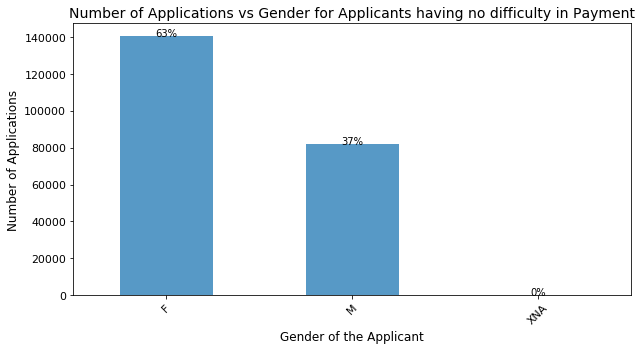

In [50]:
#Gender

univariate_analysis(app_defaulter_df,'CODE_GENDER','Number of Applications vs Gender for Applicants having difficulties in Payment','Gender of the Applicant')
univariate_analysis(app_nondefaulter_df,'CODE_GENDER','Number of Applications vs Gender for Applicants having no difficulty in Payment','Gender of the Applicant')

In [51]:
#Insight - Womens tend to take loan more than mens.

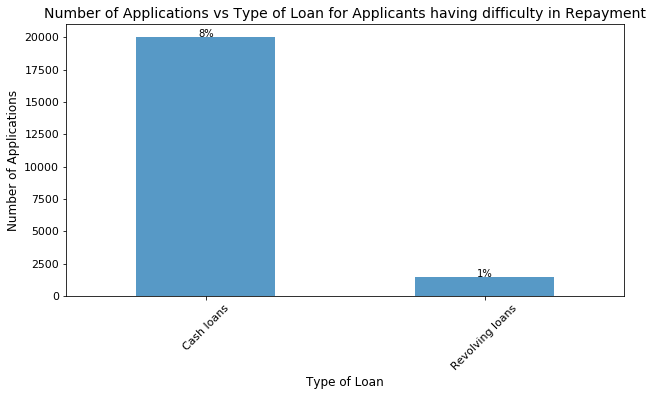

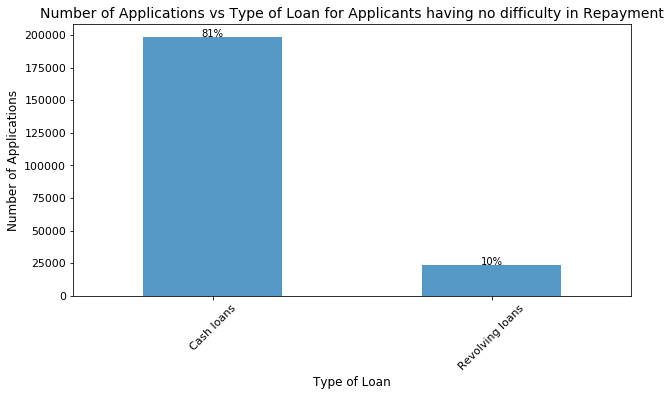

In [52]:
#Type of Loan

univariate_analysis(app_defaulter_df,'NAME_CONTRACT_TYPE','Number of Applications vs Type of Loan for Applicants having difficulty in Repayment','Type of Loan',len(app_data_without_outliers))
univariate_analysis(app_nondefaulter_df,'NAME_CONTRACT_TYPE','Number of Applications vs Type of Loan for Applicants having no difficulty in Repayment','Type of Loan',len(app_data_without_outliers))

In [53]:
#Insight - Clearly there are more number of applications for Cash Loans rather than Revolving Loans. 
#People taking Revolving loan has higher chances of paying their loan on time.

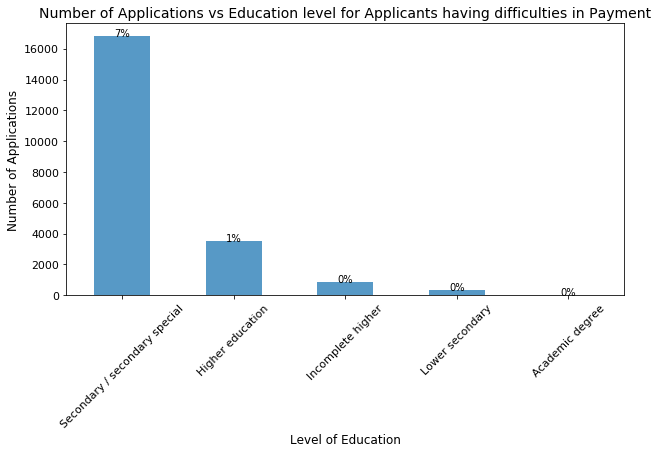

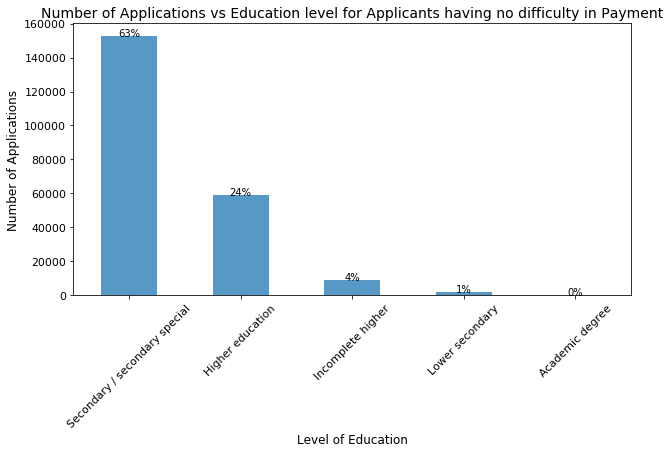

In [54]:
#Education Type

univariate_analysis(app_defaulter_df,'NAME_EDUCATION_TYPE','Number of Applications vs Education level for Applicants having difficulties in Payment','Level of Education',len(app_data_without_outliers))
univariate_analysis(app_nondefaulter_df,'NAME_EDUCATION_TYPE','Number of Applications vs Education level for Applicants having no difficulty in Payment','Level of Education',len(app_data_without_outliers))

In [55]:
#Insight - 
#1.People with secondary or secondary special education have more number of loan applications than others.
#2.There are high chances of an applicant paying the dues on time if a person has done higher education with 1% as default rate.

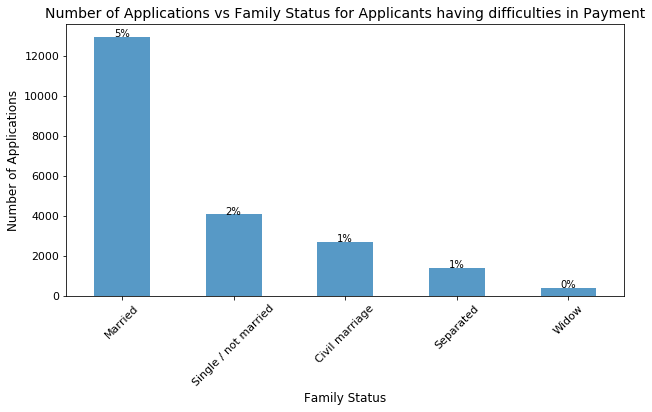

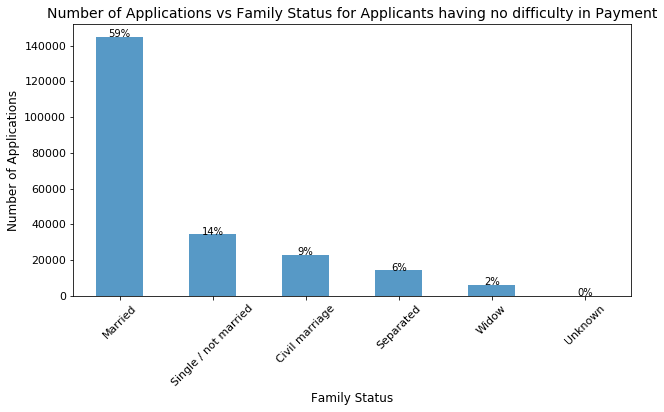

In [56]:
#Family Status

univariate_analysis(app_defaulter_df,'NAME_FAMILY_STATUS','Number of Applications vs Family Status for Applicants having difficulties in Payment','Family Status',len(app_data_without_outliers))
univariate_analysis(app_nondefaulter_df,'NAME_FAMILY_STATUS','Number of Applications vs Family Status for Applicants having no difficulty in Payment','Family Status',len(app_data_without_outliers))

In [57]:
#Insight - Married people tend to take loan more times than other category people.

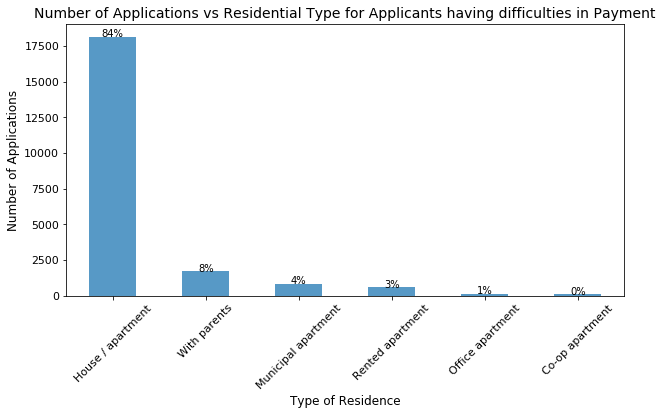

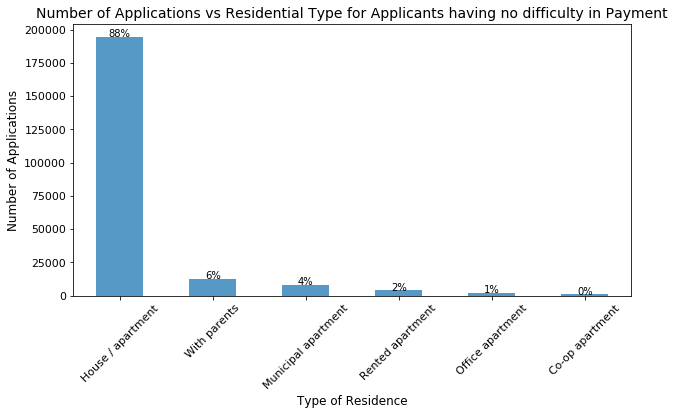

In [58]:
#Housing type

univariate_analysis(app_defaulter_df,'NAME_HOUSING_TYPE','Number of Applications vs Residential Type for Applicants having difficulties in Payment','Type of Residence')
univariate_analysis(app_nondefaulter_df,'NAME_HOUSING_TYPE','Number of Applications vs Residential Type for Applicants having no difficulty in Payment','Type of Residence')

In [59]:
#Insight - The number of loan applications by defaulters and non defaulters are more if an applicant is staying in a House/Apartment
#If an applicant is staying in a rented apartment or with parents, his chances of being a defaulter are more.
#In other categories, applicant is likely to pay his loan on time.

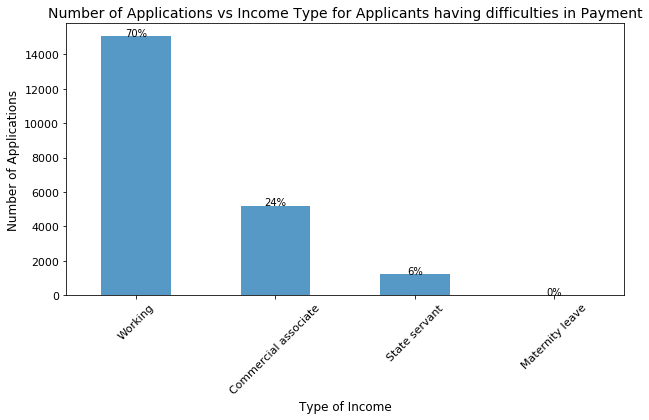

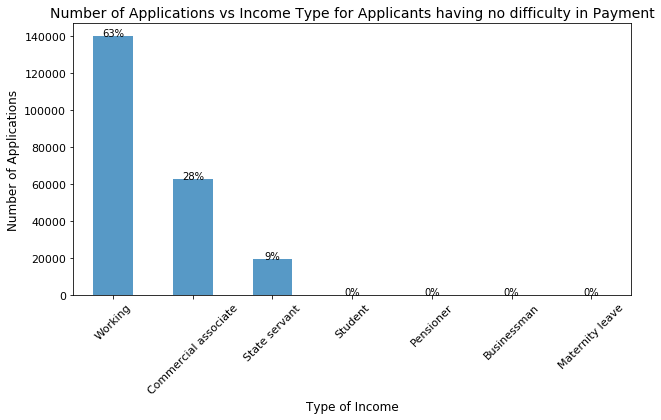

In [60]:
#Income Type

univariate_analysis(app_defaulter_df,'NAME_INCOME_TYPE','Number of Applications vs Income Type for Applicants having difficulties in Payment','Type of Income')
univariate_analysis(app_nondefaulter_df,'NAME_INCOME_TYPE','Number of Applications vs Income Type for Applicants having no difficulty in Payment','Type of Income')

In [61]:
#Insight - The number of loan applications by defaulters and non defaulters are more if the applicant is working. 
#Working people has the most chances of being a defaulter than other people.


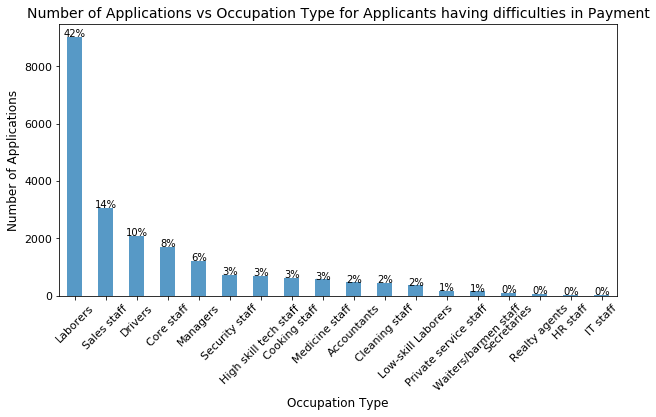

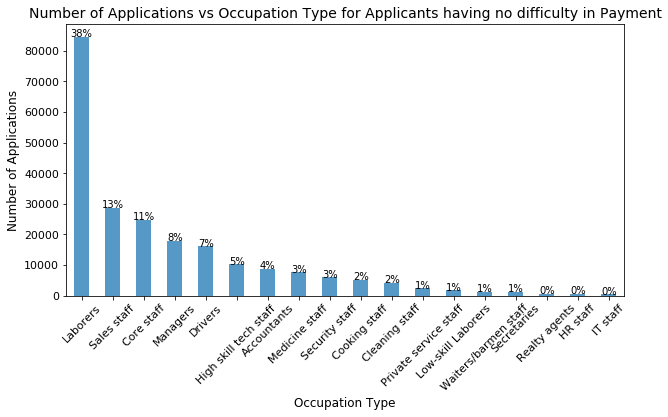

In [62]:
#Occupation type

univariate_analysis(app_defaulter_df,'OCCUPATION_TYPE','Number of Applications vs Occupation Type for Applicants having difficulties in Payment','Occupation Type')
univariate_analysis(app_nondefaulter_df,'OCCUPATION_TYPE','Number of Applications vs Occupation Type for Applicants having no difficulty in Payment','Occupation Type')

In [63]:
#Insights - The number of loan applications by defaulters and non defaulters are more if the applicant is a laborer.
#1. Laborers and Sales Staff have higher chances of being a defaulter.
#2. Core Staff, Managers and drivers are likely to pay their dues on time.

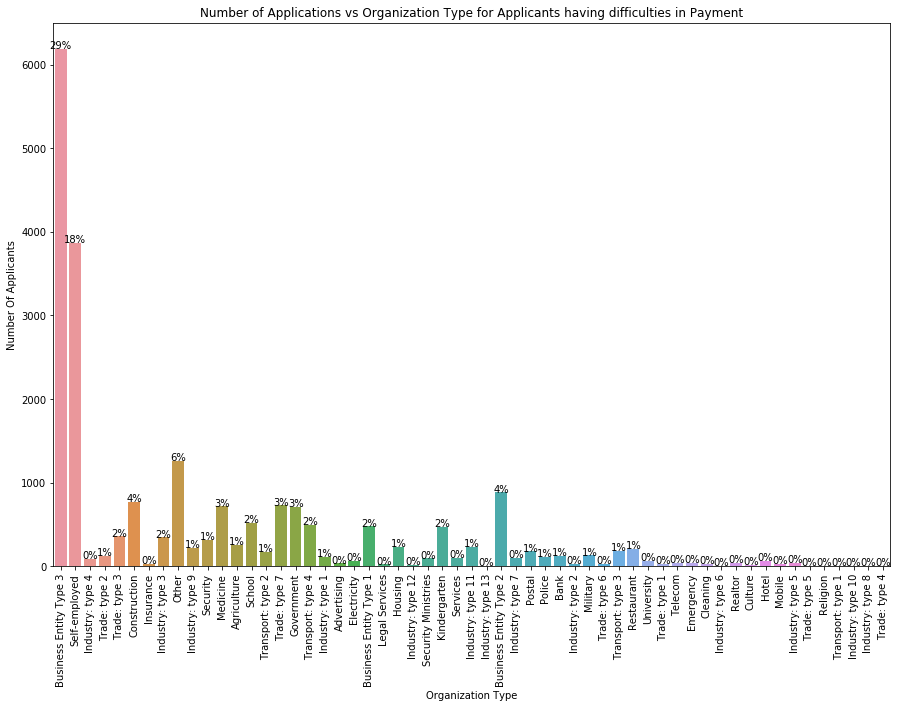

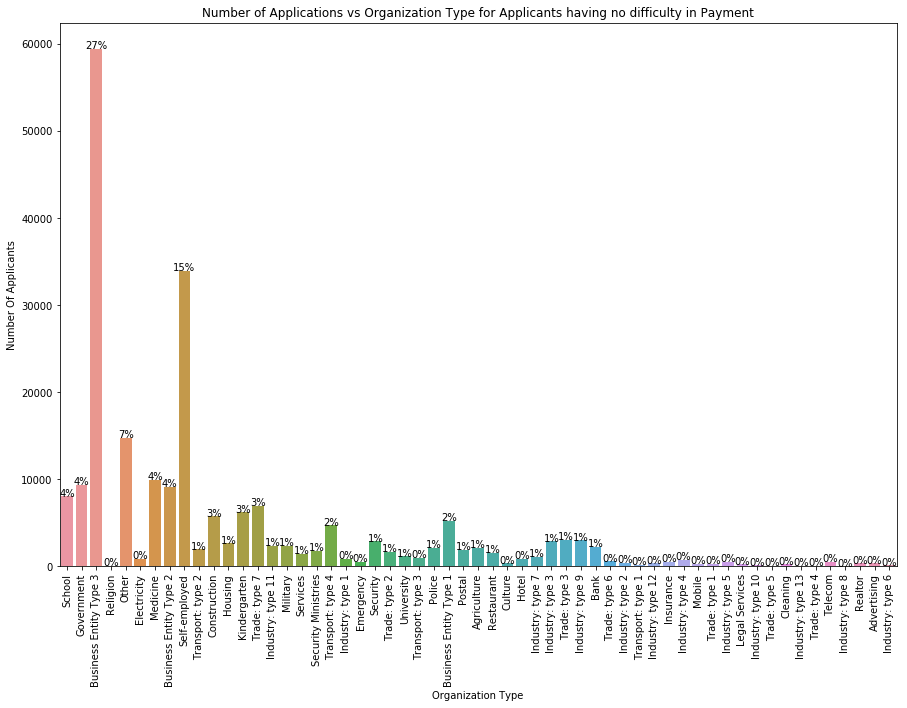

In [64]:
#Organisation Type

#Assumption

#ORGANISATION_TYPE column has the XNA and XAP values
#XNA = not available
#XAP = not applicable (X as a logical not !?) 
#Creating a list by removing XNA and XAP from the list for better visualisation in the plots

org_typelist = ['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3', 'Cleaning', 'Construction', 'Culture', 'Electricity', 'Emergency', 'Government', 'Hotel', 'Housing', 'Industry: type 1', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 'Industry: type 13', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Insurance', 'Kindergarten', 'Legal Services', 'Medicine', 'Military', 'Mobile', 'Other', 'Police', 'Postal', 'Realtor', 'Religion', 'Restaurant', 'School', 'Security', 'Security Ministries', 'Self-employed', 'Services', 'Telecom', 'Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7', 'Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4', 'University']
#print(org_typelist)

#Defaulter
defaulter = app_defaulter_df[app_defaulter_df["ORGANIZATION_TYPE"].isin(org_typelist) ]
plt.figure(figsize=(15,10))
org = sns.countplot(x='ORGANIZATION_TYPE',data=defaulter)
plt.xlabel("Organization Type")
plt.ylabel("Number Of Applicants")
plt.title("Number of Applications vs Organization Type for Applicants having difficulties in Payment")
plt.xticks(rotation=90)
for p in org.patches:
    height = p.get_height()
    org.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(defaulter)),
            ha="center") 
plt.show()

#Non Defaulter
nondefaulter = app_nondefaulter_df[app_nondefaulter_df["ORGANIZATION_TYPE"].isin(org_typelist) ]
plt.figure(figsize=(15,10))
orgn = sns.countplot(x='ORGANIZATION_TYPE',data=nondefaulter)
plt.xlabel("Organization Type")
plt.ylabel("Number Of Applicants")
plt.title("Number of Applications vs Organization Type for Applicants having no difficulty in Payment")
plt.xticks(rotation=90)
for p in orgn.patches:
    height = p.get_height()
    orgn.text(p.get_x()+p.get_width()/2.,height + 3,'{:.0%}'.format(height/len(nondefaulter)),
            ha="center") 
plt.show()

In [65]:
#Insights - The number of loan applications by defaulters and non defaulters are more if the applicant
# is working in Business entity Type 3 organisation type.

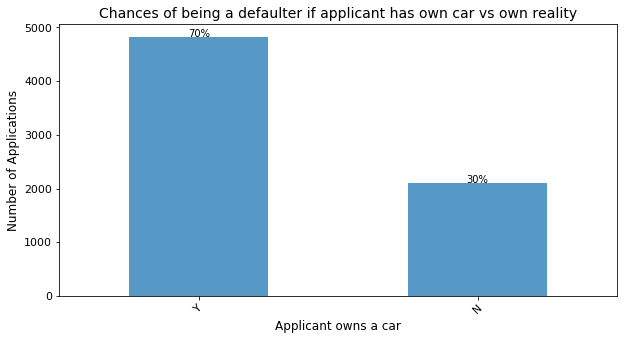

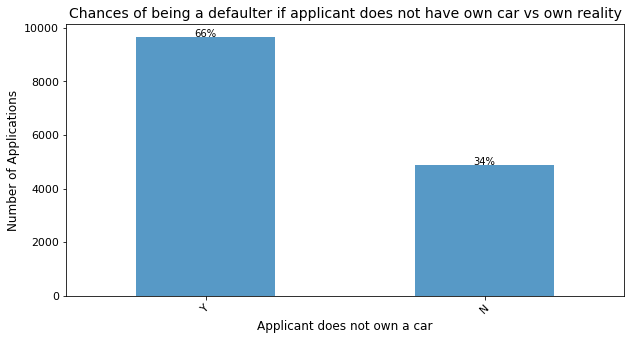

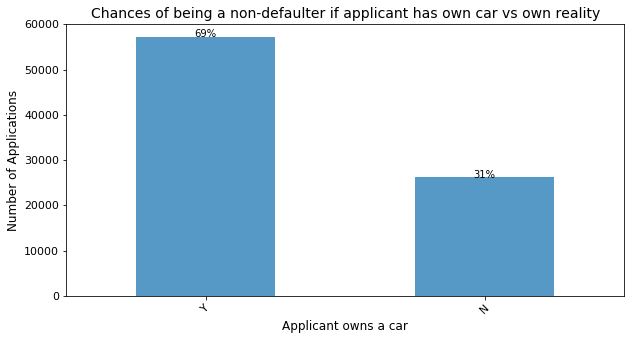

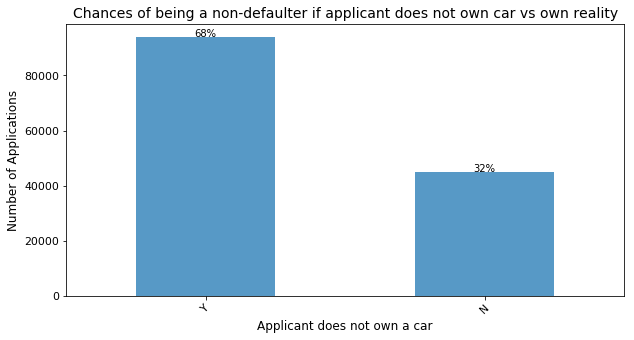

In [66]:
#Analysis based on the Flag columns

#Applicant Owns a car or not??

univariate_analysis(app_defaulter_df[app_defaulter_df['FLAG_OWN_CAR']=='Y'],'FLAG_OWN_REALTY','Chances of being a defaulter if applicant has own car vs own reality','Applicant owns a car')
univariate_analysis(app_defaulter_df[app_defaulter_df['FLAG_OWN_CAR']=='N'],'FLAG_OWN_REALTY','Chances of being a defaulter if applicant does not have own car vs own reality','Applicant does not own a car')


univariate_analysis(app_nondefaulter_df[app_nondefaulter_df['FLAG_OWN_CAR']=='Y'],'FLAG_OWN_REALTY','Chances of being a non-defaulter if applicant has own car vs own reality','Applicant owns a car')
univariate_analysis(app_nondefaulter_df[app_nondefaulter_df['FLAG_OWN_CAR']=='N'],'FLAG_OWN_REALTY','Chances of being a non-defaulter if applicant does not own car vs own reality','Applicant does not own a car')

In [67]:
#Insight - 
#1. Minimum chances of being a defaulter - if applicant has own car but no realty
#2. Maximum chances of being a defaulter - if applicant has no own car but he has own realty
#3. Proportion of being a non-defaulter is more if applicant has no own car but he has own realty

#Let's calculate that proportion

Defaulter_proportion_nocar_homes = round(100*(len(app_defaulter_df[(app_defaulter_df['FLAG_OWN_CAR']=='N') & (app_defaulter_df['FLAG_OWN_REALTY']=='Y')])/len(app_nondefaulter_df[(app_nondefaulter_df['FLAG_OWN_CAR']=='N') & (app_nondefaulter_df['FLAG_OWN_REALTY']=='Y')])),2)
print('Probability of being a defaulter if applicant has its own realty but no car: ',Defaulter_proportion_nocar_homes)

Probability of being a defaulter if applicant has its own realty but no car:  10.28


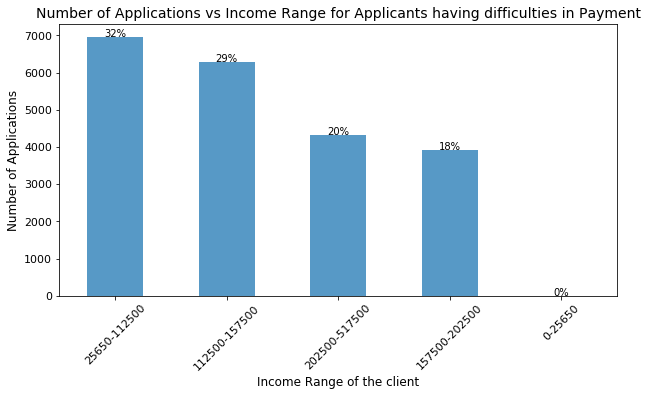

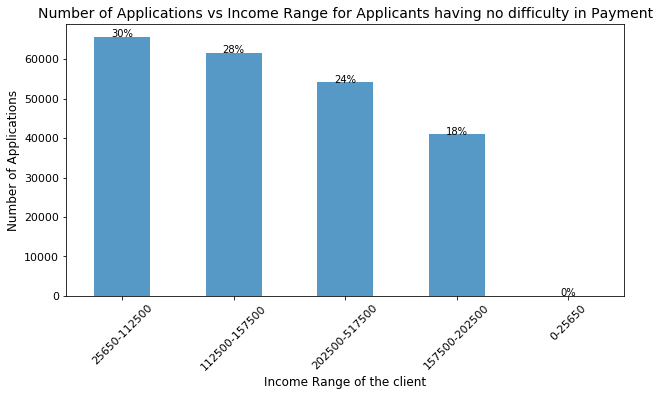

In [68]:
#Income Range

univariate_analysis(app_defaulter_df,'INCOME_RANGE','Number of Applications vs Income Range for Applicants having difficulties in Payment','Income Range of the client')
univariate_analysis(app_nondefaulter_df,'INCOME_RANGE','Number of Applications vs Income Range for Applicants having no difficulty in Payment','Income Range of the client')

In [69]:
#Insight - we can analyse that for majority of the default applicants , has an income in the range 1 to 2 lakhs.

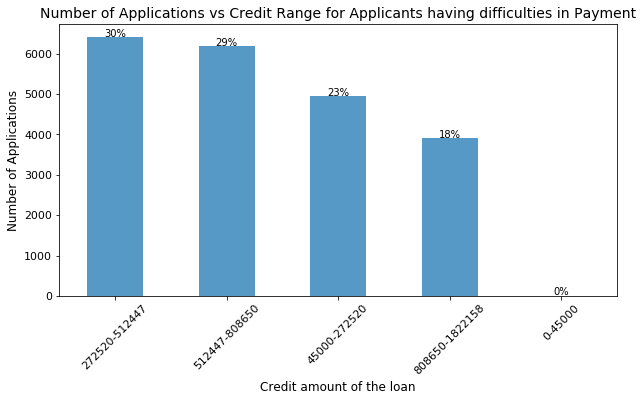

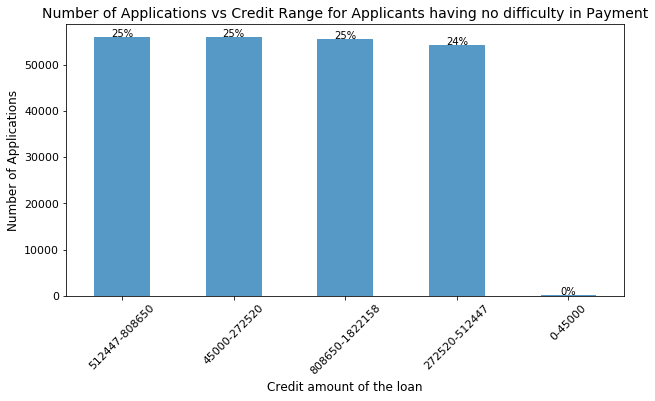

In [70]:
#Credit Range

univariate_analysis(app_defaulter_df,'CREDIT_RANGE','Number of Applications vs Credit Range for Applicants having difficulties in Payment','Credit amount of the loan')
univariate_analysis(app_nondefaulter_df,'CREDIT_RANGE','Number of Applications vs Credit Range for Applicants having no difficulty in Payment','Credit amount of the loan')

In [71]:
#Insight - we can analyse that for majority of the default applicants , the amount credited was between 2.5 and 5 lakhs

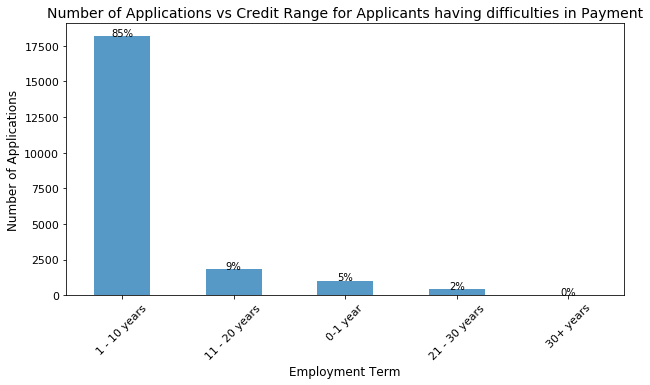

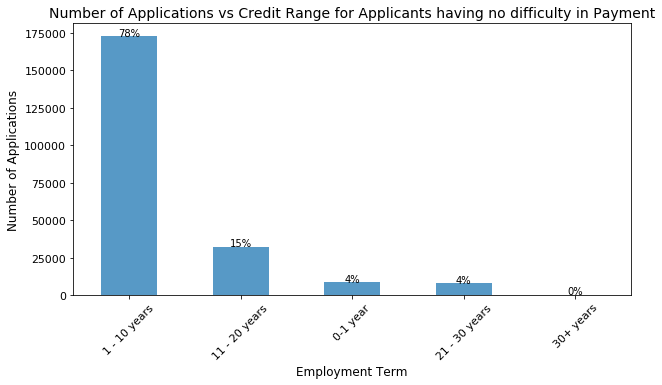

In [72]:
#Employment Term

univariate_analysis(app_defaulter_df,'EMP_TERM','Number of Applications vs Credit Range for Applicants having difficulties in Payment','Employment Term')
univariate_analysis(app_nondefaulter_df,'EMP_TERM','Number of Applications vs Credit Range for Applicants having no difficulty in Payment','Employment Term')

In [73]:
#Insight - The number of loan applications by defaulters and non defaulters are more if the applicant's work experience
#is less than 10 years

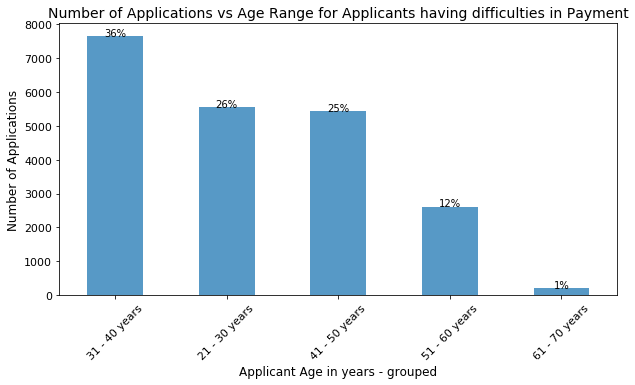

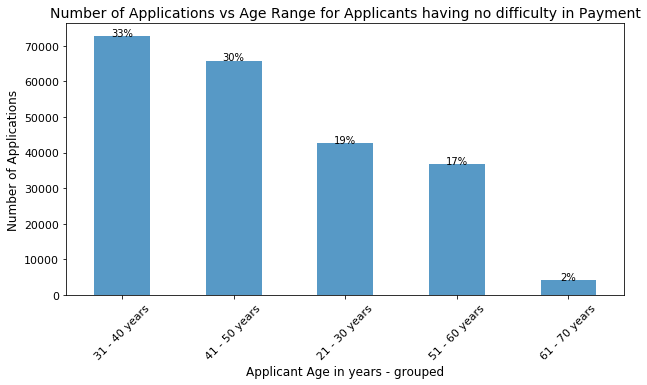

In [74]:
#Age Range

univariate_analysis(app_defaulter_df,'AGE_RANGE','Number of Applications vs Age Range for Applicants having difficulties in Payment','Applicant Age in years - grouped')
univariate_analysis(app_nondefaulter_df,'AGE_RANGE','Number of Applications vs Age Range for Applicants having no difficulty in Payment','Applicant Age in years - grouped')

In [75]:
#Insight - The number of loan applications by defaulters and non defaulters are more if the applicant's age is in the range
#31 to 40 years.

#People with age range - 40-70 prefer to pay their due on time than being a defaulter.
#There are more proportion of defaulters in people in age-range 21-40

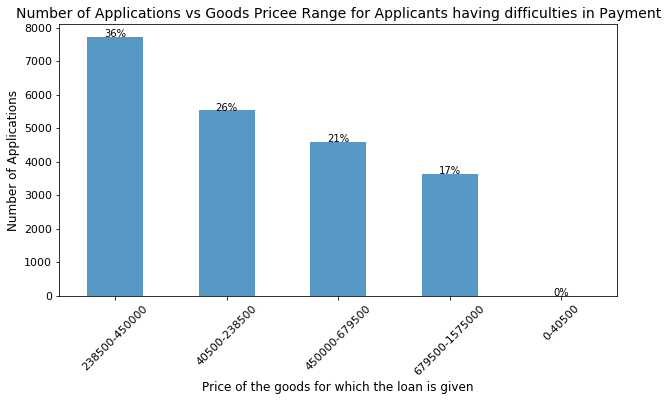

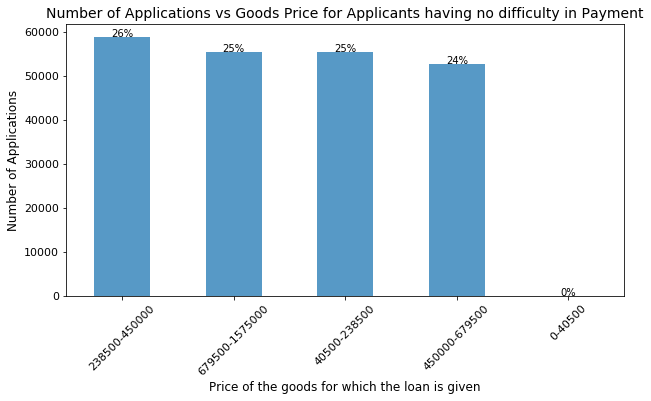

In [76]:
#Amount Goods Price

univariate_analysis(app_defaulter_df,'GOODS_PRICE_RANGE','Number of Applications vs Goods Pricee Range for Applicants having difficulties in Payment','Price of the goods for which the loan is given')
univariate_analysis(app_nondefaulter_df,'GOODS_PRICE_RANGE','Number of Applications vs Goods Price for Applicants having no difficulty in Payment','Price of the goods for which the loan is given')

In [77]:
#Insight -
# There are more applicantions where people have given goods of range 2.3 lakhs to 4.5 lakhs.
# And also, there is high probability of them being as a defaulter.

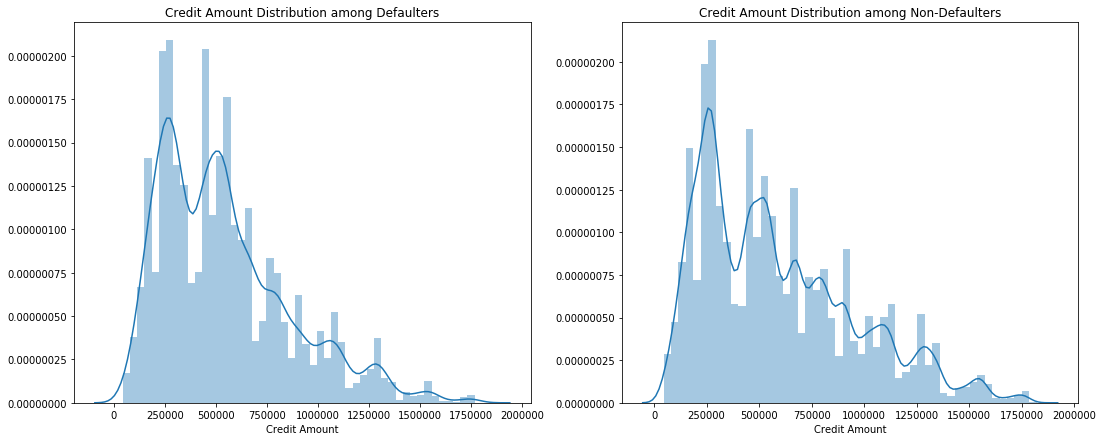

In [78]:
#Plotting of the numerical varibles

#Amount Credit

plt.figure(figsize=(18,7))
plt.subplot(121)
sns.distplot(app_defaulter_df['AMT_CREDIT'])
plt.title('Credit Amount Distribution among Defaulters')
plt.xlabel('Credit Amount')
plt.subplot(122)
sns.distplot(app_nondefaulter_df['AMT_CREDIT'])
plt.title('Credit Amount Distribution among Non-Defaulters')
plt.xlabel('Credit Amount')
plt.show()

In [79]:
#Insight - Majority of the credit amount of the applicants is distributed  between 2,50,000 and 5,00,000 lakhs

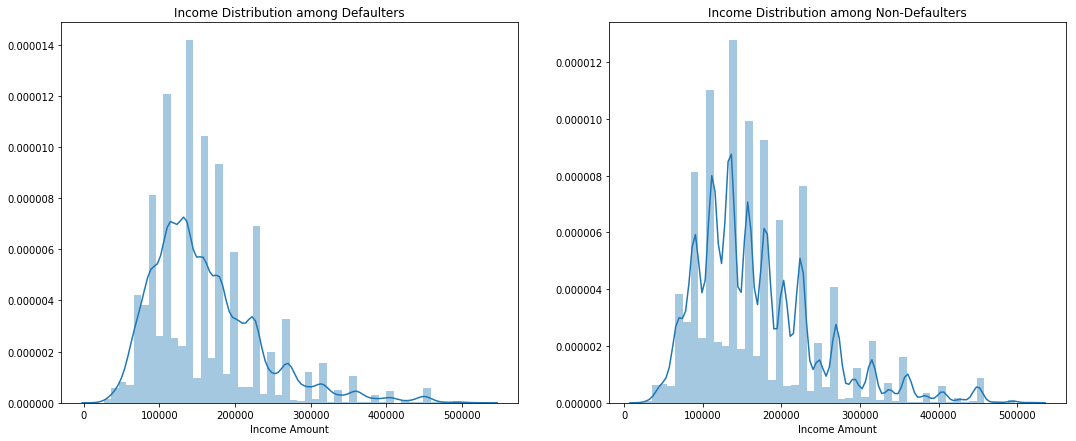

In [80]:
#Income of the Applicant

plt.figure(figsize=(18,7))
plt.subplot(121)
sns.distplot(app_defaulter_df['AMT_INCOME_TOTAL'])
plt.title('Income Distribution among Defaulters')
plt.xlabel('Income Amount')
plt.subplot(122)
sns.distplot(app_nondefaulter_df['AMT_INCOME_TOTAL'])
plt.title('Income Distribution among Non-Defaulters')
plt.xlabel('Income Amount')
plt.show()

In [81]:
#Insight - Majority of the Income amount of the applicants is between 1 to 2 lakhs.

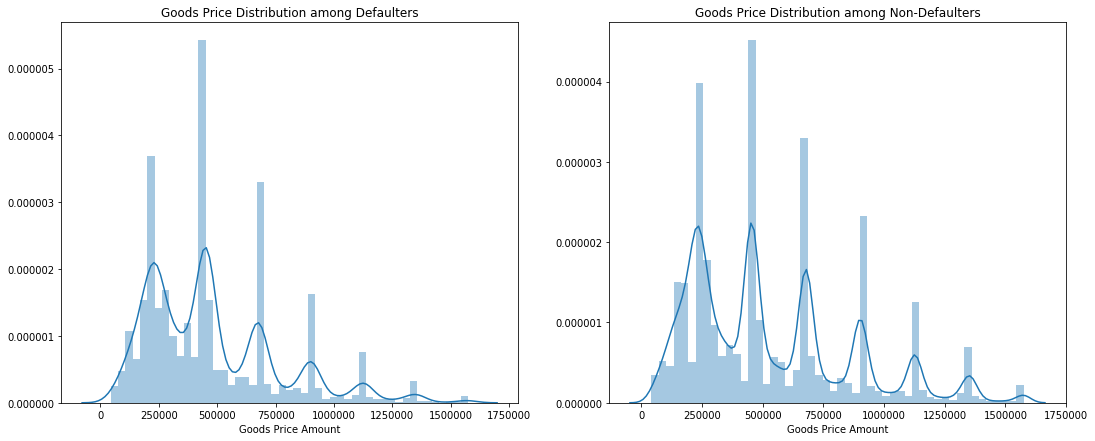

In [82]:
# Goods Price

plt.figure(figsize=(18,7))
plt.subplot(121)
sns.distplot(app_defaulter_df['AMT_GOODS_PRICE'])
plt.title('Goods Price Distribution among Defaulters')
plt.xlabel('Goods Price Amount')
plt.subplot(122)
sns.distplot(app_nondefaulter_df['AMT_GOODS_PRICE'])
plt.title('Goods Price Distribution among Non-Defaulters')
plt.xlabel('Goods Price Amount')
plt.show()

In [83]:
#Insight - Majority of the goods price in the applications is approximately between 3 and 6 lakhs.

In [84]:
#------------- Picking relevent fields to check if they are correlated ----------------- 

In [85]:
#finding the numeric columns in the curr_app dataset
numeric_cols = app_defaulter_df.select_dtypes(include = numerictype).columns
print(numeric_cols)

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'SK_ID_CURR', 'AGE',
       'EMPLOYMENT_EXPERIENCE'],
      dtype='object')


In [86]:
#remove SK_ID_CURR column from dataset
app_defaulter_df.drop('SK_ID_CURR', axis=1,inplace=True)
defaulter_metric = app_defaulter_df.corr()
defaulter_metric

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_EXPERIENCE
AMT_ANNUITY,1.000000,0.731677,0.732449,0.409249,0.018018,0.056363,0.082181,0.049009
AMT_CREDIT,0.731677,1.000000,0.980063,0.335939,0.003286,0.051004,0.186413,0.108872
AMT_GOODS_PRICE,0.732449,0.980063,1.000000,0.340066,-0.002325,0.048075,0.182099,0.115262
AMT_INCOME_TOTAL,0.409249,0.335939,0.340066,1.000000,-0.028288,-0.022875,0.096553,0.030300
CNT_CHILDREN,0.018018,0.003286,-0.002325,-0.028288,1.000000,0.893758,-0.174239,-0.024155
CNT_FAM_MEMBERS,0.056363,0.051004,0.048075,-0.022875,0.893758,1.000000,-0.108683,0.009496
AGE,0.082181,0.186413,0.182099,0.096553,-0.174239,-0.108683,1.000000,0.290195
EMPLOYMENT_EXPERIENCE,0.049009,0.108872,0.115262,0.030300,-0.024155,0.009496,0.290195,1.000000


In [87]:
#remove SK_ID_CURR column from dataset
app_nondefaulter_df.drop('SK_ID_CURR', axis=1,inplace=True)
non_defaulter_metric = app_nondefaulter_df.corr()
non_defaulter_metric

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AGE,EMPLOYMENT_EXPERIENCE
AMT_ANNUITY,1.000000,0.741760,0.745966,0.440034,-0.006239,0.042575,0.087613,0.053011
AMT_CREDIT,0.741760,1.000000,0.983919,0.357232,-0.016742,0.038955,0.156374,0.091980
AMT_GOODS_PRICE,0.745966,0.983919,1.000000,0.362976,-0.020736,0.037196,0.150728,0.093387
AMT_INCOME_TOTAL,0.440034,0.357232,0.362976,1.000000,-0.016825,-0.010400,0.051327,0.038552
CNT_CHILDREN,-0.006239,-0.016742,-0.020736,-0.016825,1.000000,0.893684,-0.236101,-0.040904
CNT_FAM_MEMBERS,0.042575,0.038955,0.037196,-0.010400,0.893684,1.000000,-0.171742,-0.008599
AGE,0.087613,0.156374,0.150728,0.051327,-0.236101,-0.171742,1.000000,0.316759
EMPLOYMENT_EXPERIENCE,0.053011,0.091980,0.093387,0.038552,-0.040904,-0.008599,0.316759,1.000000


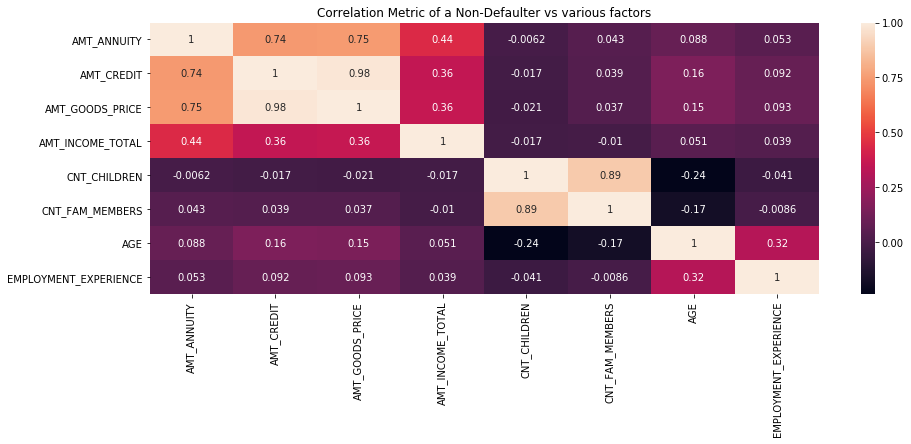

In [88]:
#Heat Map to find the correlation between variables in the non defaulter dataset
plt.figure(figsize=(15,5))
sns.heatmap(non_defaulter_metric, xticklabels=non_defaulter_metric.columns, yticklabels=non_defaulter_metric.columns,annot=True)
plt.title("Correlation Metric of a Non-Defaulter vs various factors")
plt.show()

In [89]:
# Create a metric out of correlation matrix without diagonal values - non defaulter

upper1_shape = np.ones(non_defaulter_metric.shape)
np.fill_diagonal(upper1_shape,0)
upper1 = non_defaulter_metric.where(upper1_shape.astype(np.bool))
# Find index of feature columns with correlation
correlatedCols_nondefaulter50 = [column for column in upper1.columns if any(upper1[column] > 0.50)]
correlatedCols_nondefaulter75 = [column for column in upper1.columns if any(upper1[column] > 0.75)]
correlatedCols_nondefaulter95 = [column for column in upper1.columns if any(upper1[column] > 0.95)]

print("Non Defaulter : greater than 50% correlation",correlatedCols_nondefaulter50)
print("Non Defaulter : greater than 75% correlation",correlatedCols_nondefaulter75)
print("Non Defaulter : greater than 95% correlation",correlatedCols_nondefaulter95)

Non Defaulter : greater than 50% correlation ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
Non Defaulter : greater than 75% correlation ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
Non Defaulter : greater than 95% correlation ['AMT_CREDIT', 'AMT_GOODS_PRICE']


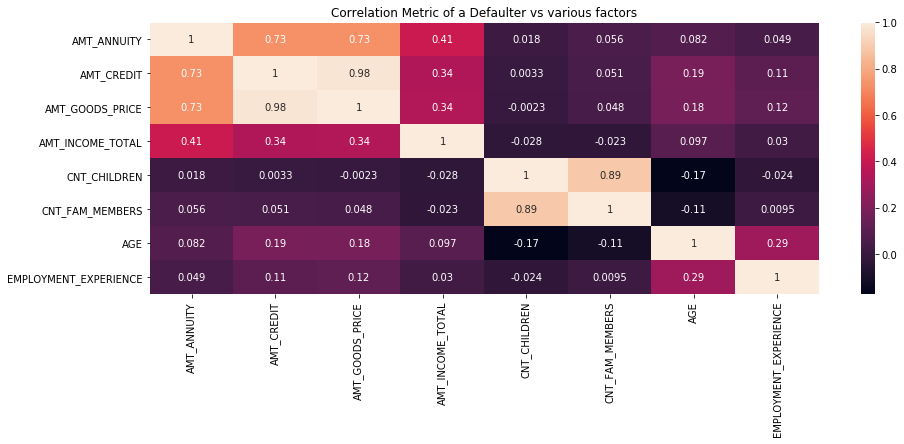

In [90]:
#Heat Map to find the correlation between variables in the defaulter dataset
plt.figure(figsize=(15,5))
sns.heatmap(defaulter_metric, xticklabels=defaulter_metric.columns, yticklabels=defaulter_metric.columns,annot=True)
plt.title("Correlation Metric of a Defaulter vs various factors")
plt.show()

In [91]:
# Create a metric out of correlation matrix without diagonal values- defaulter
upper_shape = np.ones(defaulter_metric.shape)
np.fill_diagonal(upper_shape,0)
upper = defaulter_metric.where(upper_shape.astype(np.bool))
# Find index of feature columns with correlation
correlatedCols_defaulter50 = [column for column in upper.columns if any(upper[column] > 0.50)]
correlatedCols_defaulter75 = [column for column in upper.columns if any(upper[column] > 0.75)]
correlatedCols_defaulter95 = [column for column in upper.columns if any(upper[column] > 0.95)]

print("Defaulter : greater than 50% correlation",correlatedCols_defaulter50)
print("Defaulter : greater than 75% correlation",correlatedCols_defaulter75)
print("Defaulter : greater than 95% correlation",correlatedCols_defaulter95)

Defaulter : greater than 50% correlation ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
Defaulter : greater than 75% correlation ['AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS']
Defaulter : greater than 95% correlation ['AMT_CREDIT', 'AMT_GOODS_PRICE']


In [92]:
#It is clear from the HEAT map that 
#--the loan amount credited,annuity amount is highly correlated with the goods price
#--the count of children is higly correlated with count of family members
#--the days of birth is also correlated with days employed.

#As a result, we can use one of these columns out of each for analysing our data and providing the expected result

# Task: Top 10 Correlational variables w.r.t Target

In [93]:
#To achieve this, lets consider our previous cleaned application dataset.

uniq_cleaned_app_data['TARGET'] = uniq_cleaned_app_data['TARGET'].astype('object')
uniq_cleaned_app_data.drop('SK_ID_CURR', axis=1,inplace=True)
cleaned_app_data_metric = uniq_cleaned_app_data.corr()

In [94]:
upper1_full_shape = np.ones(cleaned_app_data_metric.shape)
np.fill_diagonal(upper1_full_shape,0)
upper1_full = cleaned_app_data_metric.where(upper1_full_shape.astype(np.bool))
s=upper1_full.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
print(so.head(10))

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998490
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998490
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997034
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997034
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993825
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993825
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988237
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988237
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986968
AMT_GOODS_PRICE               AMT_CREDIT                      0.986968
dtype: float64


# Top 10 fields which effect Target variable the most are:
    OBS_60_CNT_SOCIAL_CIRCLE
    OBS_30_CNT_SOCIAL_CIRCLE
    FLOORSMAX_MEDI
    FLOORSMAX_AVG
    YEARS_BEGINEXPLUATATION_AVG
    YEARS_BEGINEXPLUATATION_MEDI
    FLOORSMAX_MODE
    FLOORSMAX_MEDI
    AMT_CREDIT
    AMT_GOODS_PRICE 

In [95]:
defaulter =uniq_cleaned_app_data[uniq_cleaned_app_data['TARGET'] ==1]
non_defaulter =uniq_cleaned_app_data[uniq_cleaned_app_data['TARGET'] ==0]
def_metric = defaulter.corr()
nondef_metric = non_defaulter.corr()


In [96]:
#Top 10 Fcators influencing Defaulter's behavior
upper1_full_shape = np.ones(def_metric.shape)
np.fill_diagonal(upper1_full_shape,0)
upper1_full = def_metric.where(upper1_full_shape.astype(np.bool))
s=upper1_full.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
print(so.head(10))

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998269
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998269
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997187
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997187
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996124
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996124
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989195
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989195
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986594
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986594
dtype: float64


#Insight - 
#Top 10 Factors to influence Defaulter's behavior
OBS_60_CNT_SOCIAL_CIRCLE
OBS_30_CNT_SOCIAL_CIRCLE
FLOORSMAX_MEDI
FLOORSMAX_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BEGINEXPLUATATION_MEDI
FLOORSMAX_MODE
FLOORSMAX_MEDI
FLOORSMAX_AVG
FLOORSMAX_MODE 

In [97]:
#Top 10 Fcators influencing Non-Defaulter's behavior
upper1_full_shape = np.ones(nondef_metric.shape)
np.fill_diagonal(upper1_full_shape,0)
upper1_full = nondef_metric.where(upper1_full_shape.astype(np.bool))
s=upper1_full.unstack()
so=s.sort_values(kind="quicksort",ascending=False)
print(so.head(10))

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998508
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998508
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997018
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997018
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993582
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993582
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988153
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988153
AMT_CREDIT                    AMT_GOODS_PRICE                 0.987250
AMT_GOODS_PRICE               AMT_CREDIT                      0.987250
dtype: float64


In [98]:
#Insight - 
#Top 10 Factors to influence Non-Defaulter's behavior
#OBS_60_CNT_SOCIAL_CIRCLE
#OBS_30_CNT_SOCIAL_CIRCLE
#FLOORSMAX_MEDI
#FLOORSMAX_AVG
#YEARS_BEGINEXPLUATATION_AVG
#YEARS_BEGINEXPLUATATION_MEDI
#FLOORSMAX_MODE
#FLOORSMAX_MEDI
#AMT_CREDIT
#AMT_GOODS_PRICE

In [99]:
#-----------------------------------BiVariate Analysis-----------------------------

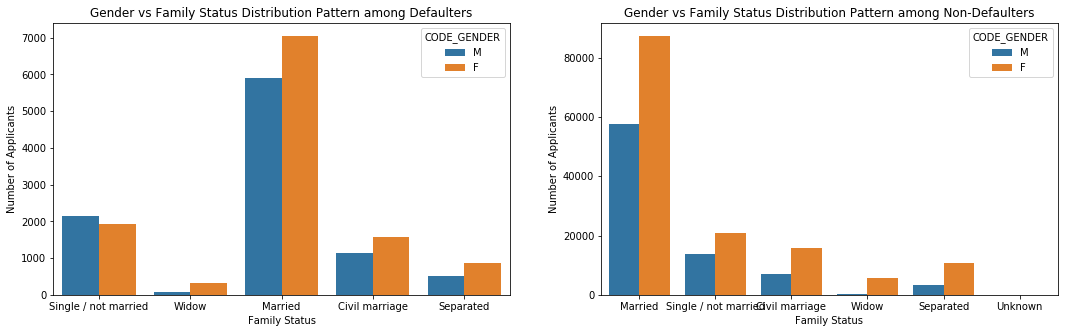

In [100]:
#Gender vs Family status among Defaulter and Non Defaulter.

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='NAME_FAMILY_STATUS', hue='CODE_GENDER', data=app_defaulter_df, hue_order=['M','F'])
plt.title('Gender vs Family Status Distribution Pattern among Defaulters')
plt.xlabel('Family Status')
plt.ylabel('Number of Applicants')
plt.subplot(122)
sns.countplot(x='NAME_FAMILY_STATUS', hue='CODE_GENDER', hue_order=['M','F'], data=app_nondefaulter_df[app_nondefaulter_df['CODE_GENDER']!='XNA'])
plt.title('Gender vs Family Status Distribution Pattern among Non-Defaulters')
plt.xlabel('Family Status')
plt.ylabel('Number of Applicants')
plt.show()

#Insight - Single mens tend to have payment difficulties in repaying the loan
#While The probability of married/Separated/Civil marraige womens being a defaulter is more than married mens. 

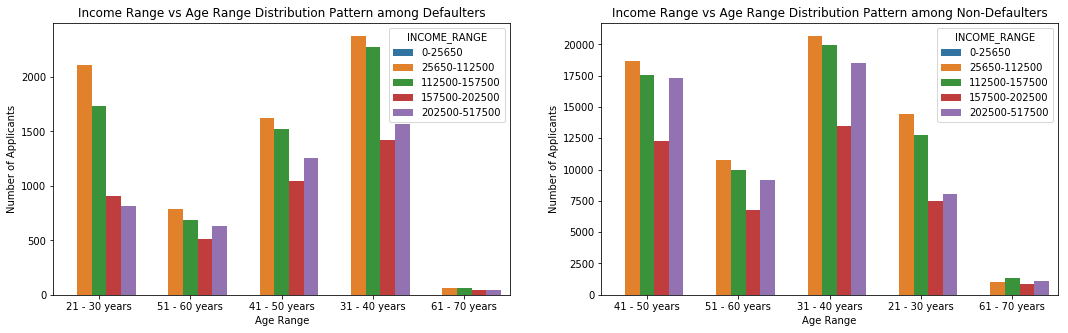

In [101]:
#Age Range vs Income Range among defaulter and non defaulters

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='AGE_RANGE', hue='INCOME_RANGE', data =app_defaulter_df )
plt.title('Income Range vs Age Range Distribution Pattern among Defaulters')
plt.xlabel('Age Range')
plt.ylabel('Number of Applicants')
plt.subplot(122)
sns.countplot(x='AGE_RANGE', hue='INCOME_RANGE', data =app_nondefaulter_df )
plt.title('Income Range vs Age Range Distribution Pattern among Non-Defaulters')
plt.xlabel('Age Range')
plt.ylabel('Number of Applicants')
plt.show()
#plt.subplot(223)
#sns.countplot(x='INCOME_RANGE', hue='AGE_RANGE', data =app_data_without_outliers )

#Insight - 
1. A person, if earning more than the mid salary, i.e. range 157500-202500, he will always pay his debts on time.
2. More proportion of People with more than mid-salary(157500-202500) tends to pay their loan on time.
3. People earning more than 25000 and less than 1lakh tend to go for loan more than others
4. People earning between 2-5 lakhs tend to be a defaulter in 21-40 age than in 40-70 age.

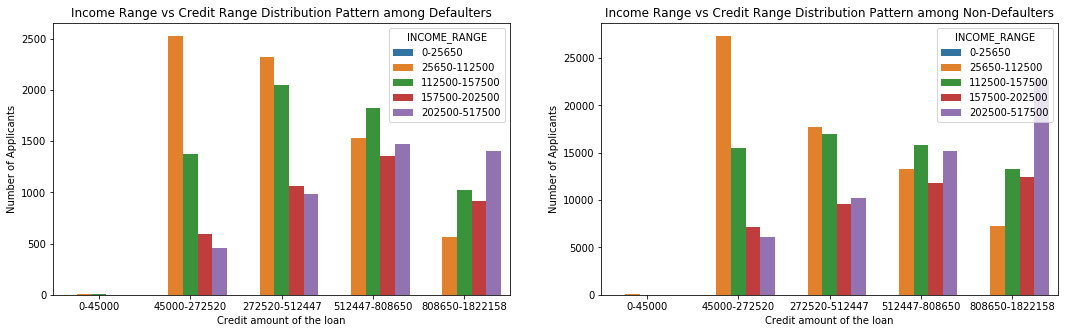

In [102]:
#Credit Range Vs Income Range

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='CREDIT_RANGE', hue='INCOME_RANGE', data =app_defaulter_df )
plt.title('Income Range vs Credit Range Distribution Pattern among Defaulters')
plt.xlabel('Credit amount of the loan')
plt.ylabel('Number of Applicants')
plt.subplot(122)
sns.countplot(x='CREDIT_RANGE', hue='INCOME_RANGE', data =app_nondefaulter_df )
plt.title('Income Range vs Credit Range Distribution Pattern among Non-Defaulters')
plt.xlabel('Credit amount of the loan')
plt.ylabel('Number of Applicants')
plt.show()
#plt.subplot(223)
#sns.countplot(x='INCOME_RANGE', hue='AGE_RANGE', data =app_data_without_outliers )

In [103]:
#Insight -
#1. There are more chances of being a defauter if a person earning less than 25000 applies for a loan.
#2. A person eaning more than 1.12 lakhs but less than 1.6lakh, if goes for higher loan - more chances of paying his debt on time.

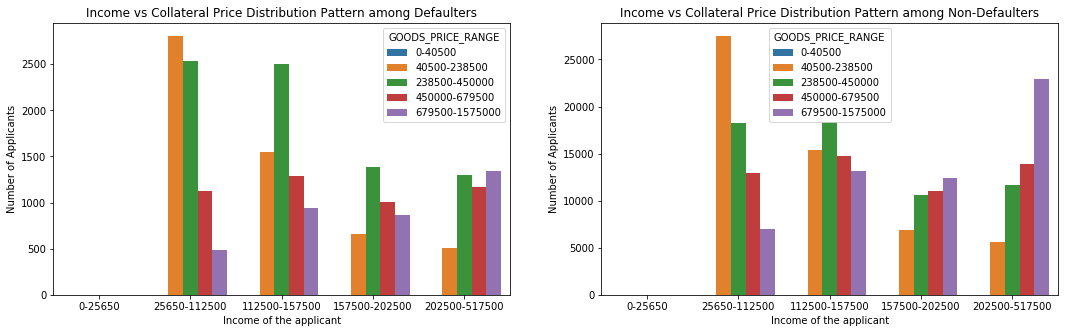

In [104]:
#Income Range vs Goods Price Range

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='INCOME_RANGE', hue='GOODS_PRICE_RANGE', data =app_defaulter_df )
plt.title('Income vs Collateral Price Distribution Pattern among Defaulters')
plt.xlabel('Income of the applicant')
plt.ylabel('Number of Applicants')
plt.subplot(122)
sns.countplot(x='INCOME_RANGE', hue='GOODS_PRICE_RANGE', data =app_nondefaulter_df )
plt.title('Income vs Collateral Price Distribution Pattern among Non-Defaulters')
plt.xlabel('Income of the applicant')
plt.ylabel('Number of Applicants')
plt.show()

In [105]:
#Insights-
#1. People with collateral amount more than 68 lakhs tend to pay their loans ontime.
#2. If the income is less, people applying for a loan with high goods price is less.

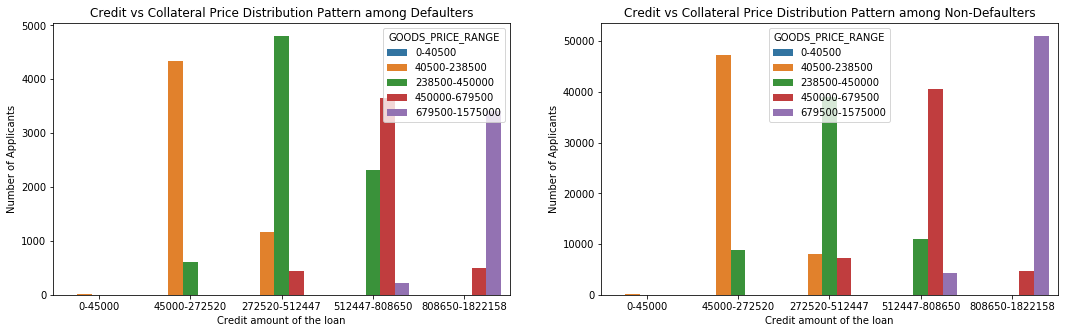

In [106]:
#Income Range vs Goods Price Range

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='CREDIT_RANGE', hue='GOODS_PRICE_RANGE', data =app_defaulter_df )
plt.title('Credit vs Collateral Price Distribution Pattern among Defaulters')
plt.xlabel('Credit amount of the loan')
plt.ylabel('Number of Applicants')
plt.subplot(122)
sns.countplot(x='CREDIT_RANGE', hue='GOODS_PRICE_RANGE', data =app_nondefaulter_df )
plt.title('Credit vs Collateral Price Distribution Pattern among Non-Defaulters')
plt.xlabel('Credit amount of the loan')
plt.ylabel('Number of Applicants')
plt.show()

In [107]:
#Insights-
#1. There are highest chances of being a defaulter if collateral amount and loan amounts are almost same.
#2. People have more tendency of being a defaulter if collateral amount is less than loan amount.

In [108]:
#----------BiVariate Anlaysis performed on the application dataset which has both defaulter and non defaulter values----------

In [109]:
#Find the probability of default to identify the defaulters
#We know that probability of any event is occurence of that event happening/total events

#In our case, we can find the probability of a defaulter and a non defaulter using the below logic

#Probability of defaulter = defaulter/(defaulter + non defaulter)
#Probability of nondefaulter = nondefaulter/(defaulter + non defaulter)

#Lets create a function to calculate the default percentage and also a fucntion to perform bivariate analysis by using this 
#probability

In [110]:
def defaulter_precentage(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['TARGET'],margins=True)
    def_tab['All'] = def_tab['Non-Defaulter'] + def_tab['Defaulter']
    def_tab['Defaulter Probability'] = round((def_tab['Defaulter']/def_tab['All']),3)
    def_tab['Non-Defaulter Probability'] = round((def_tab['Non-Defaulter']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

In [111]:
def bivariate_analysis(df,col,title,x_label=None,stacked=False):
    
    plot = defaulter_precentage(df,col)
    #display(plot)
    #initializing line plot
    plt.figure(figsize=(14,5))
    
    linePlot = plot[['Defaulter Probability']]
    linePlot1 = plot[['Non-Defaulter Probability']]
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line1 = linePlot1.plot(figsize=(20,8), marker='o',color = 'g',lw=2)
    #line chart for defaulter
    line.set_title(title+' vs Defaulter Probability',fontsize=20,weight="bold")
    #line.set_xlabel('Range',fontsize=14)
    line.set_ylabel('Defaulter Probability',color = 'r',fontsize=20)
    #line chart for non defaulter
    line1.set_title(title+' vs Non-Defaulter Probability',fontsize=20,weight="bold")
    #line1.set_xlabel('Range',fontsize=14)
    line1.set_ylabel('Non Defaulter Probability',color = 'r',fontsize=20)
    
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:2] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
   # bar.set_xlabel(x_label,color = 'r',fontsize=20)
    bar1 = barPlot.plot(kind='bar',ax = line1,rot=1,secondary_y=True,stacked=stacked)
    bar1.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
   # bar1.set_xlabel(x_label,color = 'r',fontsize=20)

    #plt.xlabel(x_label,fontsize=14)
    plt.show()

<Figure size 1008x360 with 0 Axes>

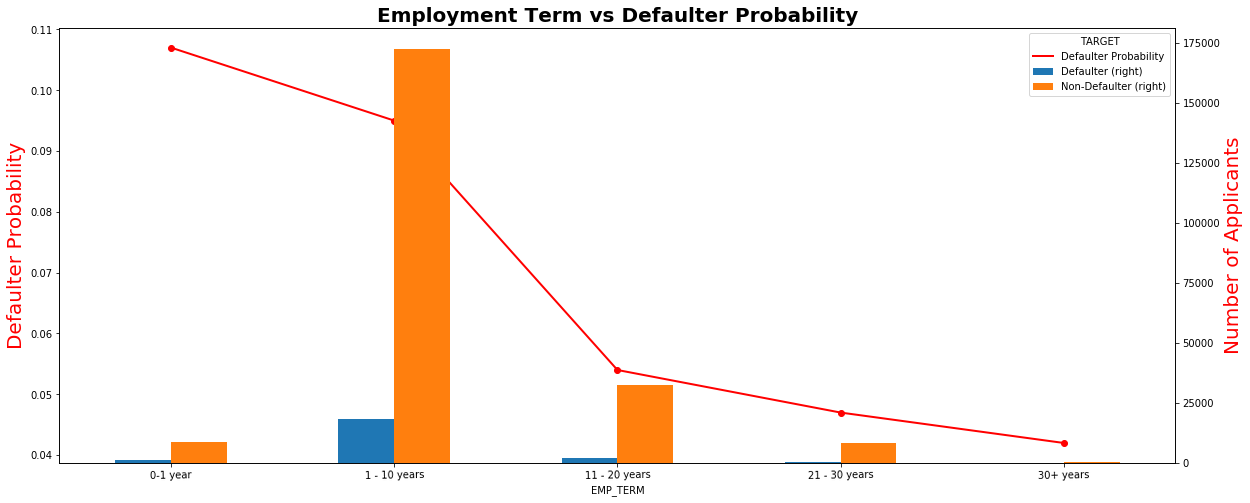

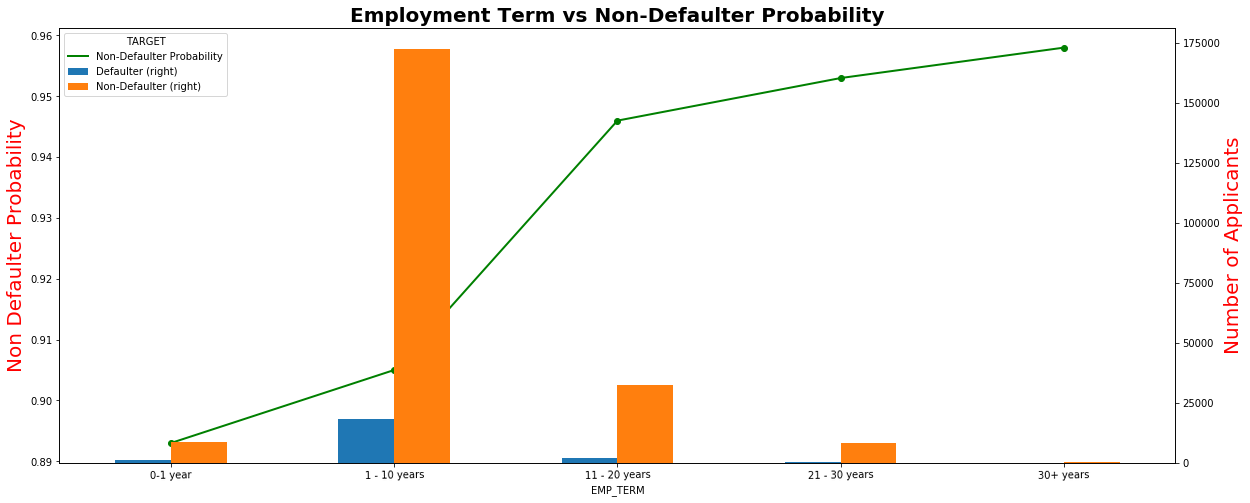

In [112]:
#Defaulters and Non Defaulters with respect to employment term
bivariate_analysis(app_data_without_outliers,'EMP_TERM','Employment Term','Years of employment of the Applicant')


In [113]:
#Insight -  we can infer that, we have more defaulters when the employment term is less than 10 years
#As the employment term increases, the chances of an applicant being an defaulter reduces

<Figure size 1008x360 with 0 Axes>

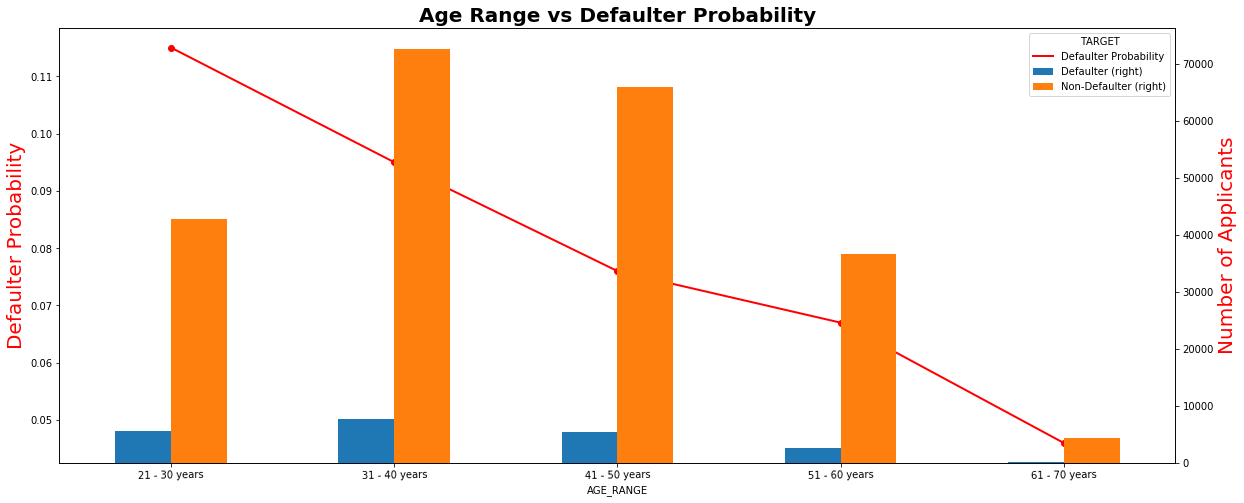

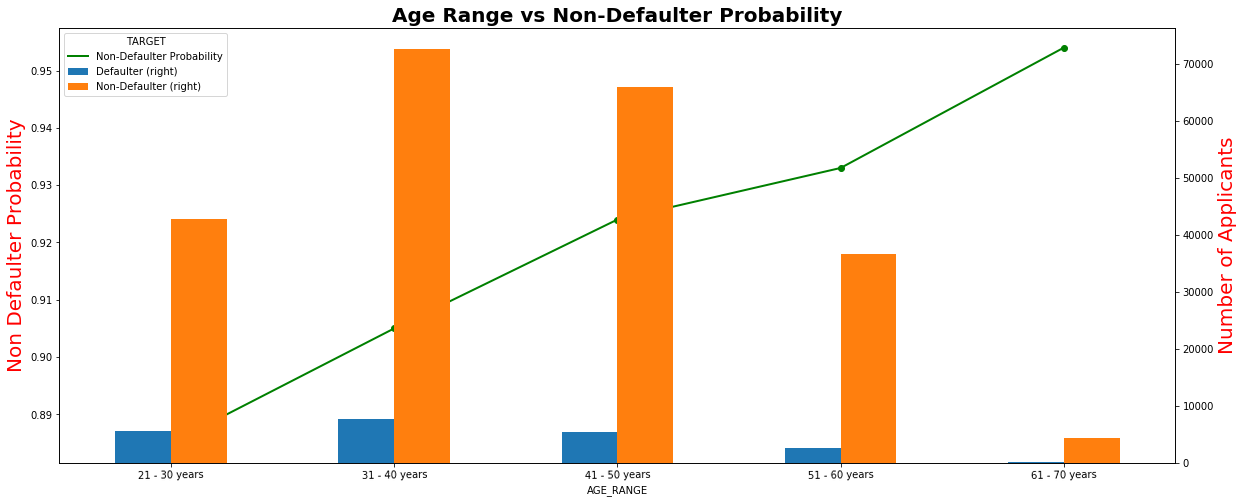

In [114]:
#Defaulters and Non Defaulters with respect to Age Group
bivariate_analysis(app_data_without_outliers,'AGE_RANGE','Age Range')

In [115]:
#Insight -  we can infer that, we have highest default probability in the age group of 21 to 30 years 
#As the age increases, the chances of an applicant being an defaulter reduces.

<Figure size 1008x360 with 0 Axes>

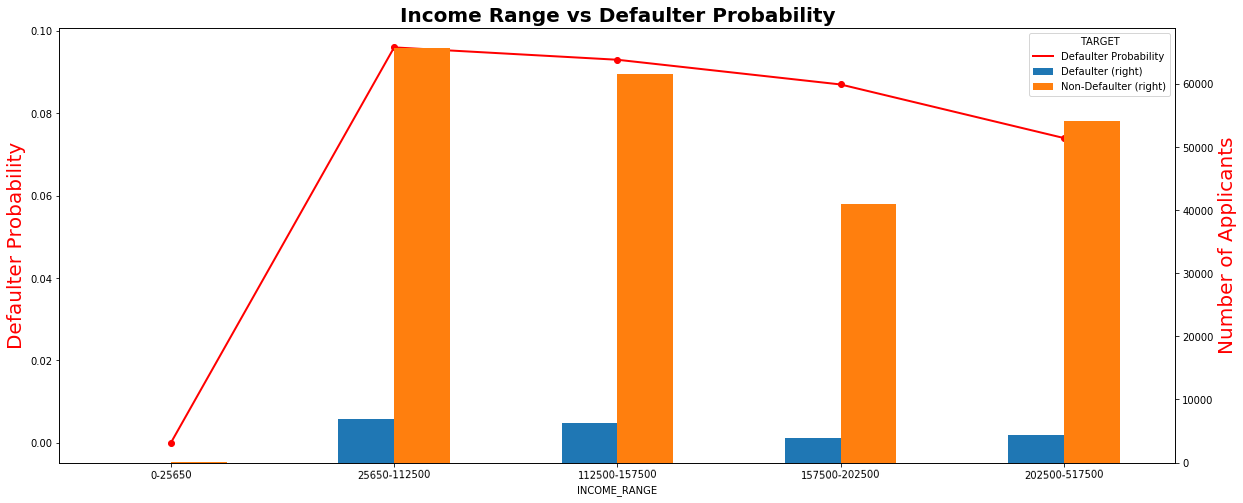

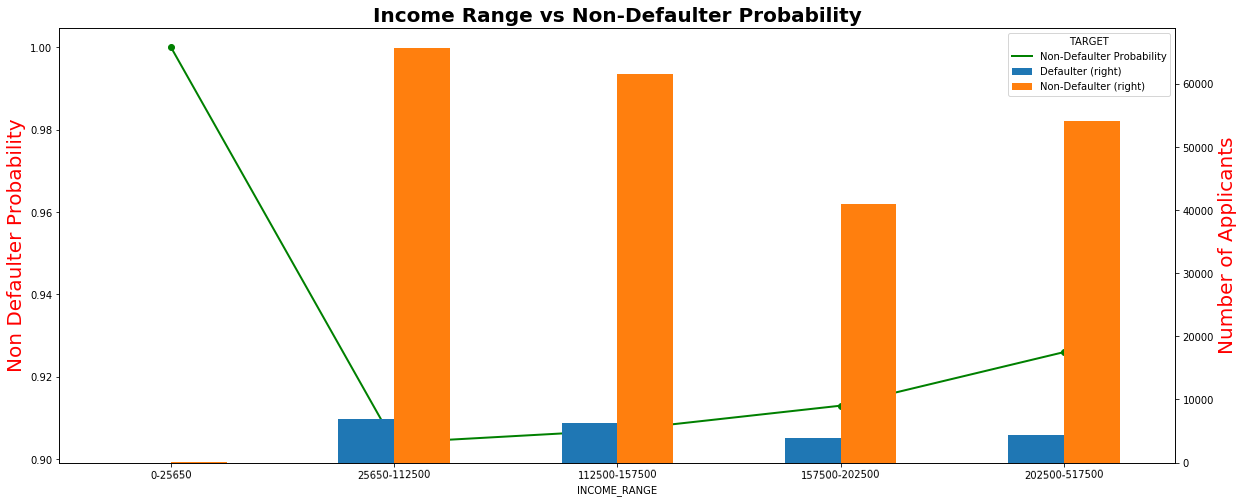

In [116]:
#Defaulters and Non Defaulters with respect to income-range
bivariate_analysis(app_data_without_outliers,'INCOME_RANGE','Income Range')

In [117]:
#Insight -  we can infer that, we have highest default probability in the income range 25k to 1.12k
#As the income increases, the chances of an applicant being an defaulter reduces.

<Figure size 1008x360 with 0 Axes>

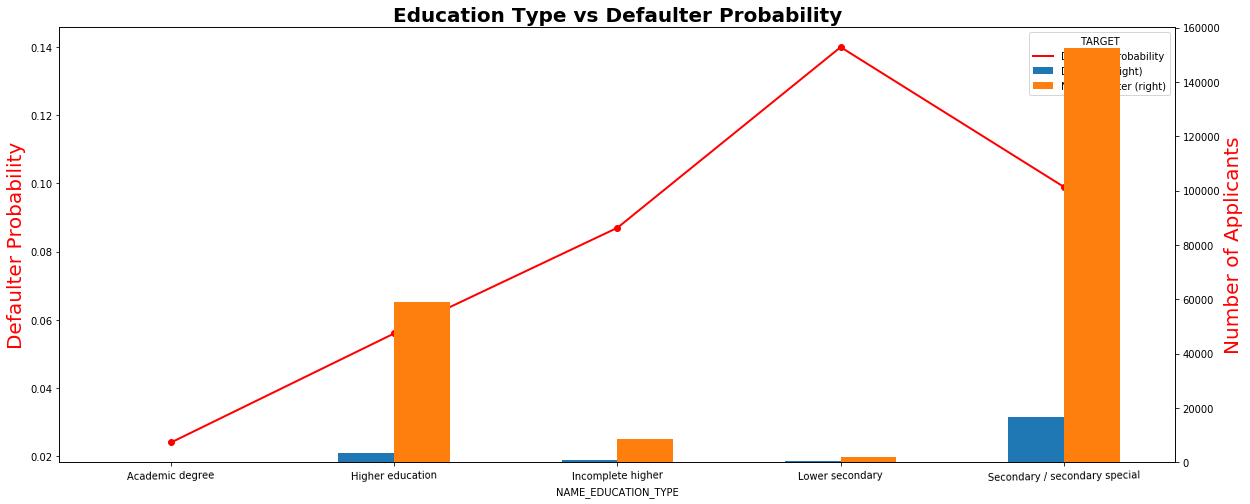

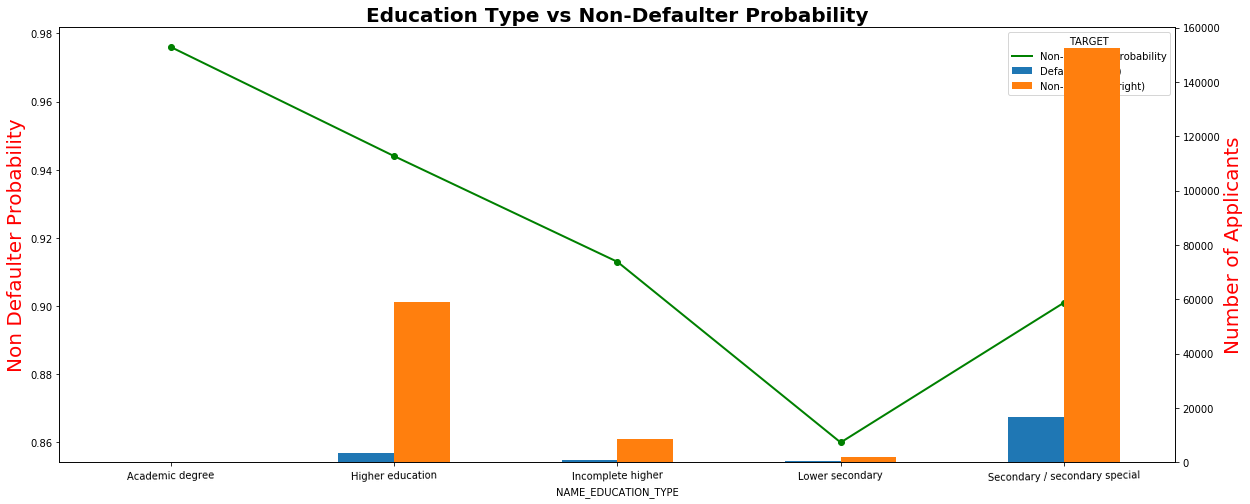

In [118]:
#Defaulters and Non Defaulters with respect to Education Type
bivariate_analysis(app_data_without_outliers,'NAME_EDUCATION_TYPE','Education Type')

In [119]:
#Insight - we can infer that the default proability is high when the education type is Lower secondary. 
#The default probability is less when the education type is higher.

<Figure size 1008x360 with 0 Axes>

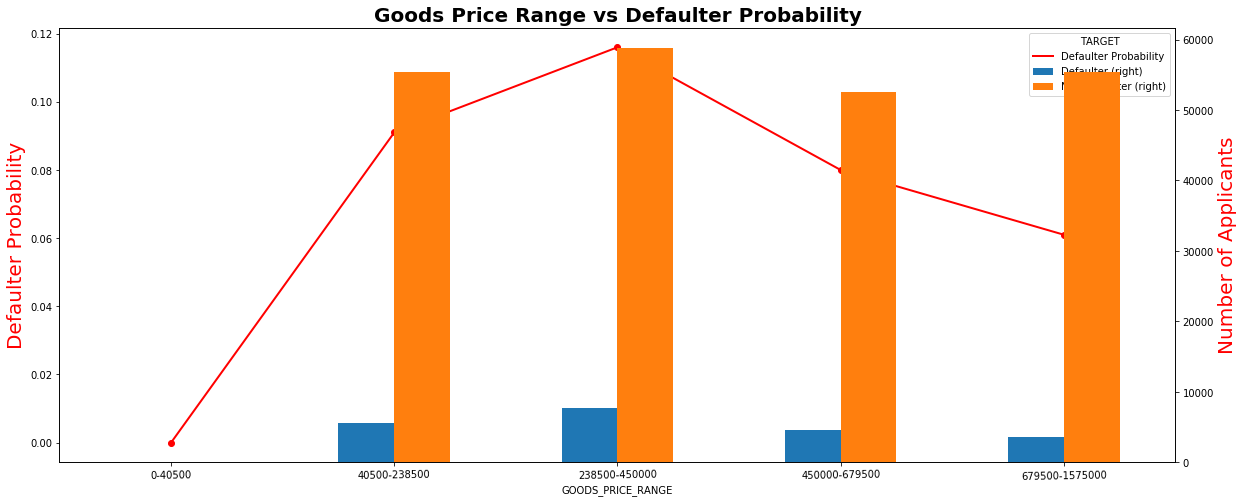

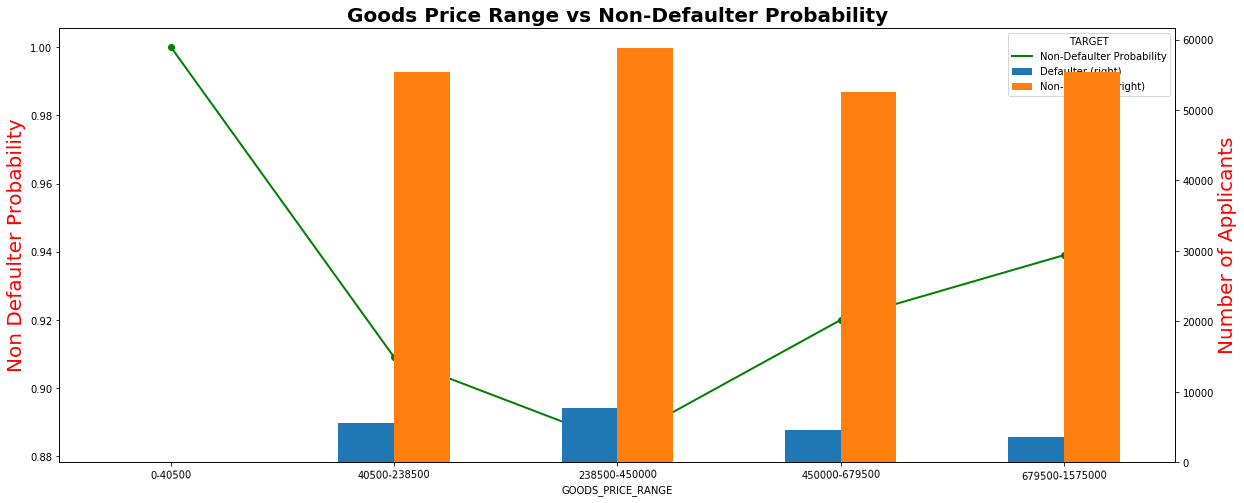

In [120]:
#Defaulters and non defaulters with respect to Goods Price Range
bivariate_analysis(app_data_without_outliers,'GOODS_PRICE_RANGE','Goods Price Range')


In [121]:
#Insight - 
#Probability of being a defaulter is highest if applicant is going to submit collaterals with value in between 40K to 4.5 Lakhs.

<Figure size 1008x360 with 0 Axes>

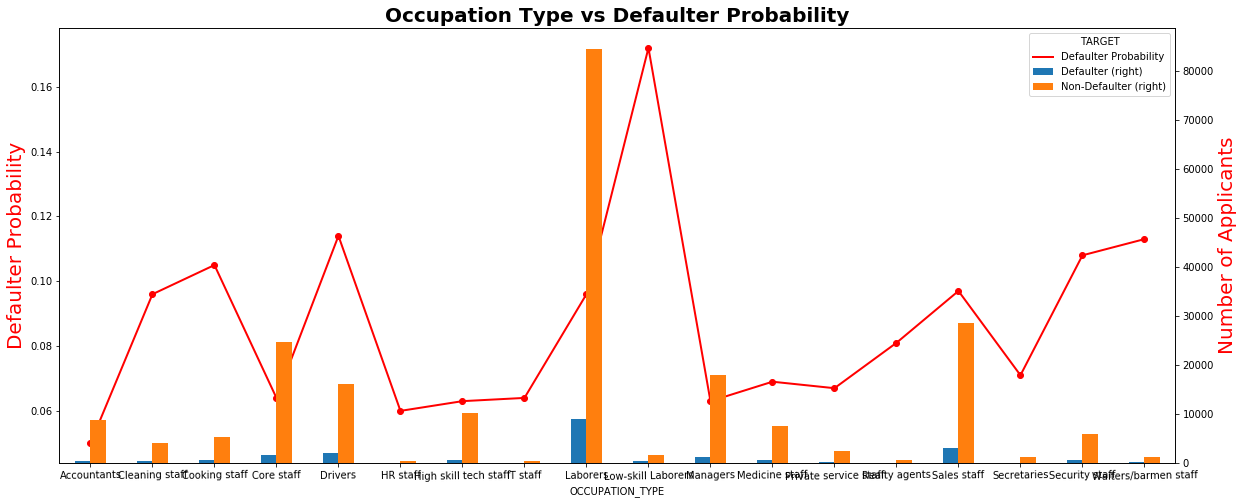

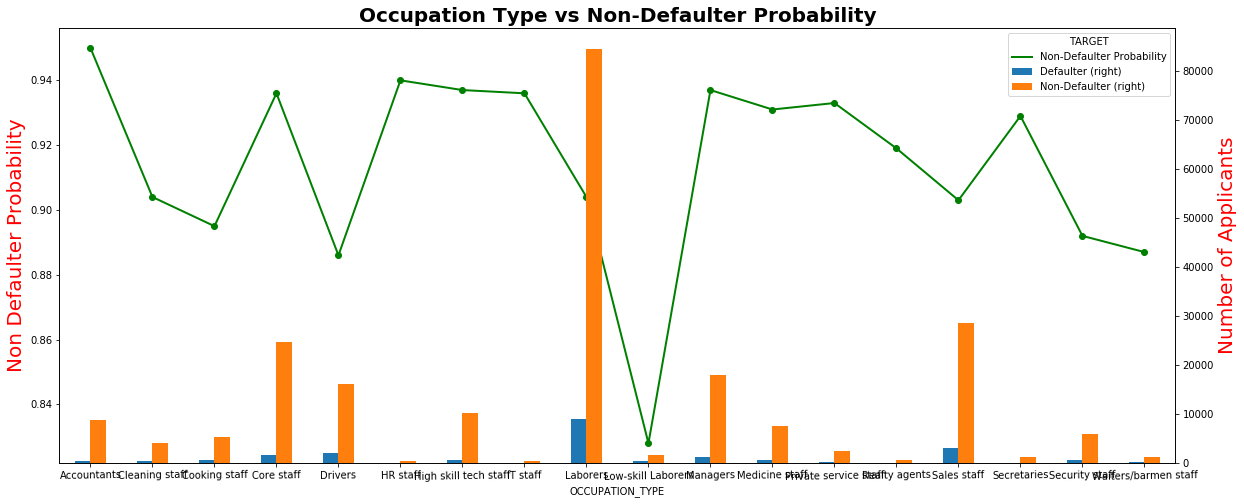

In [122]:
#OCCUPATION_TYPE
occupation_typelist = ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff', 'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff']
#print(occupation_typelist)

app_data_without_outliers1 = app_data_without_outliers[app_data_without_outliers["OCCUPATION_TYPE"].isin(occupation_typelist) ]
bivariate_analysis(app_data_without_outliers1,'OCCUPATION_TYPE','Occupation Type')

In [123]:
#Insight - we can infer that the default proabibility is high for Low Skilled Laborers

<Figure size 1008x360 with 0 Axes>

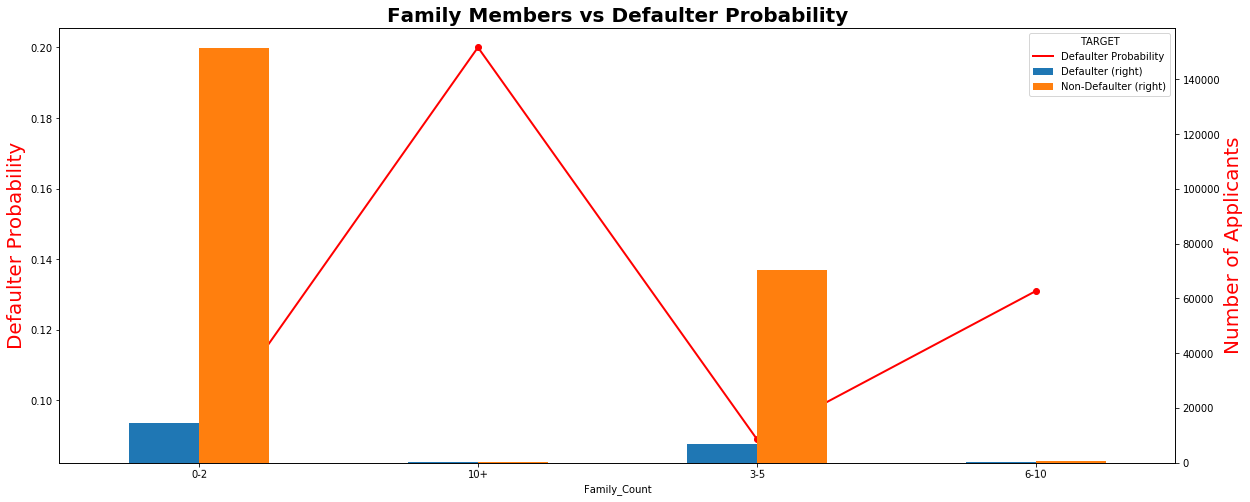

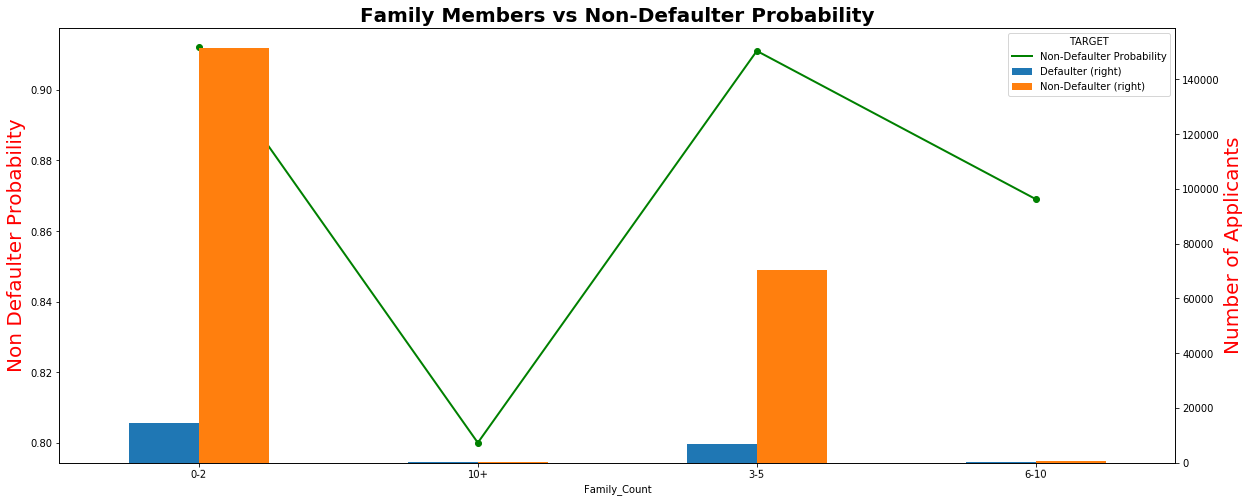

In [124]:
#Family member Count
bivariate_analysis(app_data_without_outliers,'Family_Count','Family Members')

In [125]:
#Insights - From the above plot, we can infer that, 
#Probability of default is high if number of family members is greater than 6.
#Probability of non defaulters is high if the number of family members id less than 6.

<Figure size 1008x360 with 0 Axes>

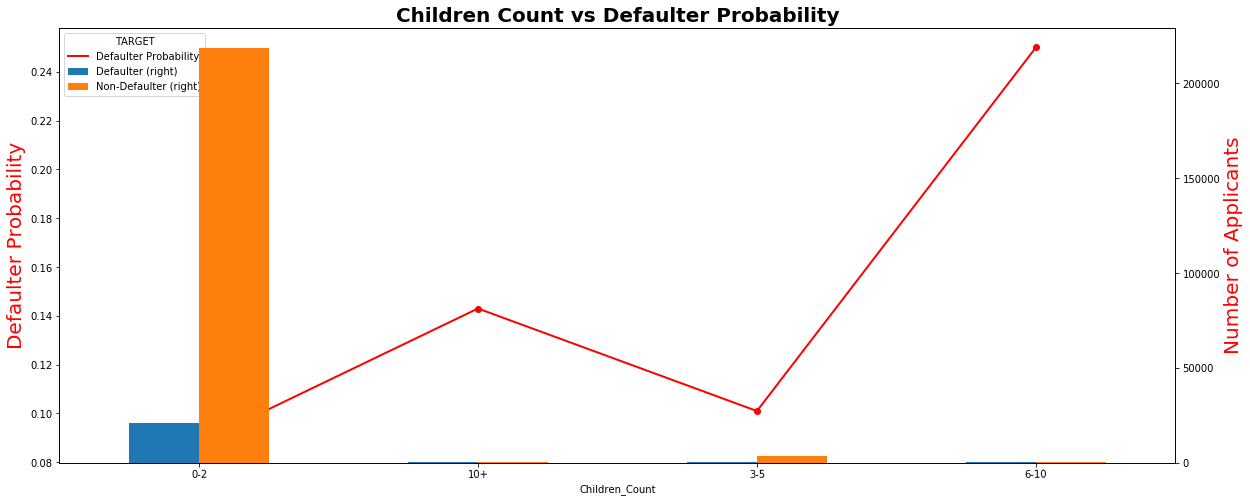

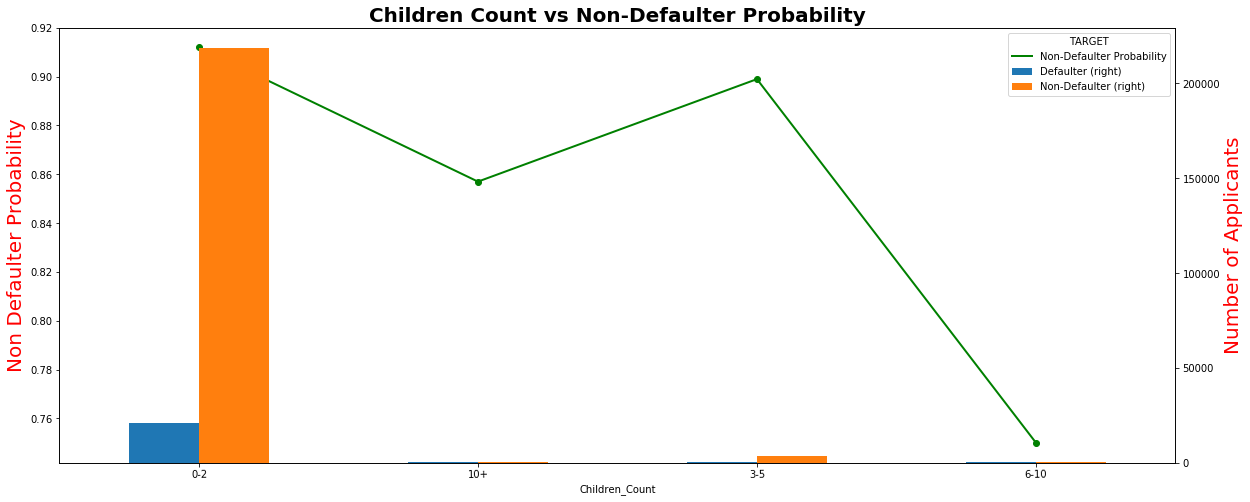

In [126]:
#Count of Children

bivariate_analysis(app_data_without_outliers,'Children_Count','Children Count')

In [127]:
#Insights - From the above plot, we can infer that, 
#Probability of default is high if number of family members is greater than 6.
#Probability of non defaulters is high if the number of family members is less than 6.

# Recommendations:

Company should take care in providing loans to customers with following behaviours :

Applicant’s employment experience is less than 10 years.
Applicant falls in age group of 21-30.
Applicant earns in income bracket of 25K to 1.125K
Education type is Lower secondary or Secondary/Secondary Special. 
Applicant is a Low Skilled Labourer.
Collaterals with value in between 40K to 4.5 Lakhs.

In [128]:
#Now lets start with second dataset - pevious_application.csv.
#we have already read this dataset into a dataframe- prev_data. 
#So lets first try to do data cleaning for this.

# Data Cleaning - prev_data

In [129]:
#Print basic information about the dataset
print('Information about prev_data:\n')
print(prev_data.info())
print('Description of prev_data:\n', prev_data.describe())
print('Shape of prev_data:\n',prev_data.shape)

Information about prev_data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         16702

In [130]:
#Printing datatypes of prev_data columns
print(prev_data.dtypes)

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [131]:
#Printing sample records

print(prev_data.head())

   SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CN

In [132]:
#Check missing data 
missing_data(prev_data)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


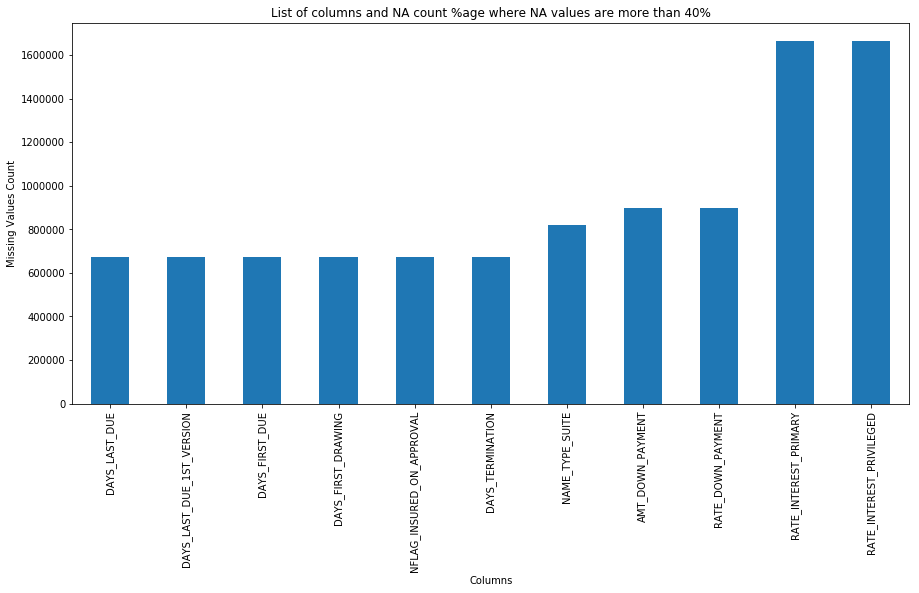

In [133]:
#Insight - Here I see that most of the columns have more than 40% of missing data, which will not be able to provide us 
# any insight for our analysis. So, lets just drop such columns

#Lets see how many columns has more than 40% missing values.
NA_col_prev = prev_data.isnull().sum().sort_values()

NA_col_prev = NA_col_prev[NA_col_prev.values > (0.4*len(prev_data))]

#Plot NA count for columns having more than 50% missing values
plt.figure(figsize=(15,7))
NA_col_prev.plot(kind='bar')
plt.title('List of columns and NA count %age where NA values are more than 40%')
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()

In [134]:
#Insight - There are 11 columns which having more than 40% of missing values.


In [135]:
#Drop those columns where missing values>= 40%

col_to_remove_prevdf = NA_col_prev.index.to_list()
#Create a backup of prev_data
cleaned_prev_data = prev_data.copy()
print('Number of rows,Number of columns of cleaned dataset before removing columns:\n',cleaned_prev_data.shape)

cleaned_prev_data = cleaned_prev_data[cleaned_prev_data.columns.difference(col_to_remove_prevdf)]
print('\nNumber of rows,Number of columns of cleaned dataset after above step:\n', cleaned_prev_data.shape)
print('\nSample data of our cleaned dataset:\n',cleaned_prev_data.head())

Number of rows,Number of columns of cleaned dataset before removing columns:
 (1670214, 37)

Number of rows,Number of columns of cleaned dataset after above step:
 (1670214, 26)

Sample data of our cleaned dataset:
    AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0     1730.430          17145.0     17145.0          17145.0   
1    25188.615         607500.0    679671.0         607500.0   
2    15060.735         112500.0    136444.5         112500.0   
3    47041.335         450000.0    470790.0         450000.0   
4    31924.395         337500.0    404055.0         337500.0   

              CHANNEL_TYPE  CNT_PAYMENT CODE_REJECT_REASON  DAYS_DECISION  \
0             Country-wide         12.0                XAP            -73   
1           Contact center         36.0                XAP           -164   
2  Credit and cash offices         12.0                XAP           -301   
3  Credit and cash offices         12.0                XAP           -512   
4  Credit and 

In [136]:
#Checking out rows with more than 50% or 30% missing values

NA_row_prevdf = 100*(cleaned_prev_data.transpose().isnull().sum()/len(cleaned_prev_data))
print(NA_row_prevdf[NA_row_prevdf.values > (0.5 * len(cleaned_prev_data))])
print(NA_row_prevdf[NA_row_prevdf.values > (0.3 * len(cleaned_prev_data))])

Series([], dtype: float64)
Series([], dtype: float64)


In [137]:
#Insight - I didn't find any row in prev_data dataset having moe than 50% or 30% values as missing values

In [138]:
#Remove columns with only one unique values
uniq_cleaned_prev_data= cleaned_prev_data.loc[:,cleaned_prev_data.nunique()!=1]
print(uniq_cleaned_prev_data.shape)

(1670214, 26)


In [139]:
#Insight - There is no column in prev_data dataset having a single value

In [140]:
#priting dtypes of left out columns 
uniq_cleaned_prev_data.dtypes

AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
CHANNEL_TYPE                    object
CNT_PAYMENT                    float64
CODE_REJECT_REASON              object
DAYS_DECISION                    int64
FLAG_LAST_APPL_PER_CONTRACT     object
HOUR_APPR_PROCESS_START          int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CLIENT_TYPE                object
NAME_CONTRACT_STATUS            object
NAME_CONTRACT_TYPE              object
NAME_GOODS_CATEGORY             object
NAME_PAYMENT_TYPE               object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
NAME_SELLER_INDUSTRY            object
NAME_YIELD_GROUP                object
NFLAG_LAST_APPL_IN_DAY           int64
PRODUCT_COMBINATION             object
SELLERPLACE_AREA                 int64
SK_ID_CURR                       int64
SK_ID_PREV                       int64
WEEKDAY_APPR_PROCESS_STAR

In [141]:
#After checking columns description of above listed columns,
#we came to know that not all the columns are required for our analysis

#Creating a list of required fields for this analysis
required_fields_for_analysis_prevdf = ['SK_ID_CURR','AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT', 'CODE_REJECT_REASON', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_CONTRACT_TYPE','NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE', 'NAME_PORTFOLIO', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP']

#Selecting only those columns which are required for this analysis
required_prev_data = uniq_cleaned_prev_data[uniq_cleaned_prev_data.columns.intersection(required_fields_for_analysis_prevdf)]
print('Number of rows,Number of columns left in dataset after chossing specific columns step:\n', required_prev_data.shape)
print('\nSample data of our dataset after above step:\n', required_prev_data.head())


Number of rows,Number of columns left in dataset after chossing specific columns step:
 (1670214, 16)

Sample data of our dataset after above step:
    AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  CNT_PAYMENT  \
0     1730.430          17145.0     17145.0          17145.0         12.0   
1    25188.615         607500.0    679671.0         607500.0         36.0   
2    15060.735         112500.0    136444.5         112500.0         12.0   
3    47041.335         450000.0    470790.0         450000.0         12.0   
4    31924.395         337500.0    404055.0         337500.0         24.0   

  CODE_REJECT_REASON NAME_CASH_LOAN_PURPOSE NAME_CLIENT_TYPE  \
0                XAP                    XAP         Repeater   
1                XAP                    XNA         Repeater   
2                XAP                    XNA         Repeater   
3                XAP                    XNA         Repeater   
4                 HC                Repairs         Repeater   

  N

In [142]:
#Data Cleaning
#Check missing data
missing_data(required_prev_data)

,Total,Percent
AMT_GOODS_PRICE,385515,23.081773
AMT_ANNUITY,372235,22.286665
CNT_PAYMENT,372230,22.286366
AMT_CREDIT,1,0.000060
SK_ID_CURR,0,0.000000
NAME_YIELD_GROUP,0,0.000000
NAME_SELLER_INDUSTRY,0,0.000000
NAME_PORTFOLIO,0,0.000000
NAME_PAYMENT_TYPE,0,0.000000
NAME_GOODS_CATEGORY,0,0.000000


In [143]:
#As we had done missing value computation for application dataset. Same way we will do for prev_data

print('Median of Goods_price amount field:\n',required_prev_data.AMT_GOODS_PRICE.median())
print('Median of AMT_ANNUITY is:\n',required_prev_data.AMT_ANNUITY.median() )
print('Most repetitive count payment is:\n ', required_prev_data.CNT_PAYMENT.mode().values[0])
print('Median of AMT_CREDIT is:\n',required_prev_data.AMT_CREDIT.median() )

Median of Goods_price amount field:
 112320.0
Median of AMT_ANNUITY is:
 11250.0
Most repetitive count payment is:
  12.0
Median of AMT_CREDIT is:
 80541.0


In [144]:
required_prev_data.AMT_CREDIT.fillna(required_prev_data.AMT_CREDIT.mode().values[0],inplace=True)
required_prev_data.AMT_GOODS_PRICE.fillna(required_prev_data.AMT_GOODS_PRICE.median(), inplace=True)
required_prev_data.AMT_ANNUITY.fillna(required_prev_data.AMT_ANNUITY.median(), inplace=True)
required_prev_data.CNT_PAYMENT.fillna(required_prev_data.CNT_PAYMENT.mode().values[0],inplace=True)

In [145]:
#Check if required fields are imported with correct dtype
print('\nDatatypes of our left columns are:\n', required_prev_data.dtypes)


Datatypes of our left columns are:
 AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
CNT_PAYMENT               float64
CODE_REJECT_REASON         object
NAME_CASH_LOAN_PURPOSE     object
NAME_CLIENT_TYPE           object
NAME_CONTRACT_STATUS       object
NAME_CONTRACT_TYPE         object
NAME_GOODS_CATEGORY        object
NAME_PAYMENT_TYPE          object
NAME_PORTFOLIO             object
NAME_SELLER_INDUSTRY       object
NAME_YIELD_GROUP           object
SK_ID_CURR                  int64
dtype: object


In [146]:
#I found that CNT_PAYMENT which represents term of the previous application, is imported as float.
#But it should be an int field.
#Changing its datatype
required_prev_data['CNT_PAYMENT'] = required_prev_data['CNT_PAYMENT'].astype(int)
required_prev_data.dtypes

AMT_ANNUITY               float64
AMT_APPLICATION           float64
AMT_CREDIT                float64
AMT_GOODS_PRICE           float64
CNT_PAYMENT                 int32
CODE_REJECT_REASON         object
NAME_CASH_LOAN_PURPOSE     object
NAME_CLIENT_TYPE           object
NAME_CONTRACT_STATUS       object
NAME_CONTRACT_TYPE         object
NAME_GOODS_CATEGORY        object
NAME_PAYMENT_TYPE          object
NAME_PORTFOLIO             object
NAME_SELLER_INDUSTRY       object
NAME_YIELD_GROUP           object
SK_ID_CURR                  int64
dtype: object

In [147]:
#Check for missing data 
#Find the numeric columns in both datasets
numerictype = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] #List containing the different numeric datatypes
numeric_columns_appdf = required_prev_data.select_dtypes(include = numerictype).columns
print(numeric_columns_appdf)


Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CNT_PAYMENT', 'SK_ID_CURR'],
      dtype='object')


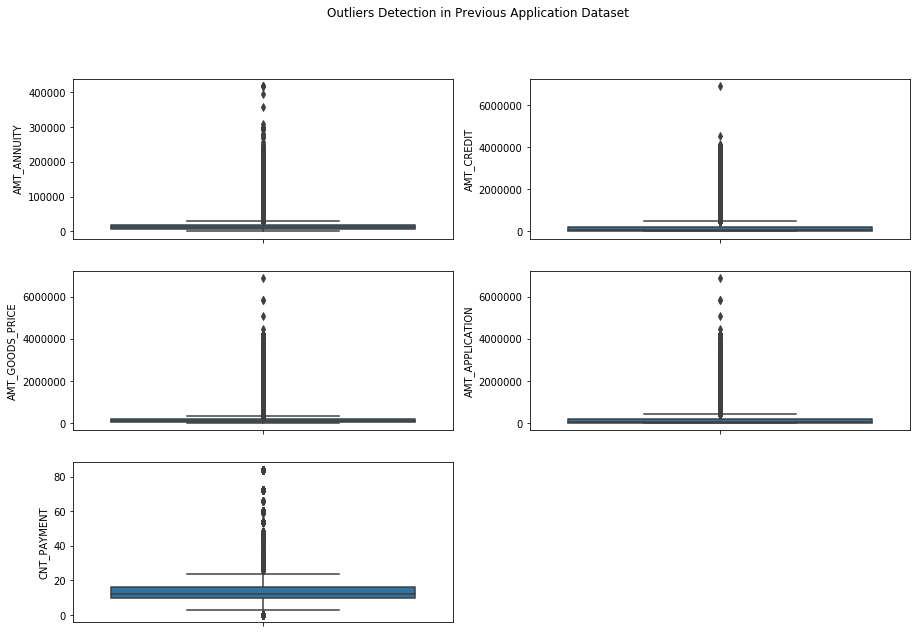

In [148]:
#Checking for outliers in AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, AMT_APPLICATION, CNT_PAYMENT
fig=plt.figure(figsize=(15,10))
fig.suptitle("Outliers Detection in Previous Application Dataset")
plt.subplot(321)
sns.boxplot(y=required_prev_data['AMT_ANNUITY'])
plt.subplot(322)
sns.boxplot(y=required_prev_data['AMT_CREDIT'])
plt.subplot(323)
sns.boxplot(y=required_prev_data['AMT_GOODS_PRICE'])
plt.subplot(324)
sns.boxplot(y=required_prev_data['AMT_APPLICATION'])
plt.subplot(325)
sns.boxplot(y=required_prev_data['CNT_PAYMENT'])
plt.show()

In [149]:
#Insight - Above box plots clearly shows that other than AGE, each column has outliers in our dataset.
#As it may distort our analysis, so we will remove these datapoints.


required_prev_data2=required_prev_data.copy()
threshold_annuity = required_prev_data['AMT_ANNUITY'].quantile([0.99]).values[0]
row_index_to_rm_annuity = required_prev_data[required_prev_data['AMT_ANNUITY'] > threshold_annuity].index
prev_data_without_annuity_outliers = required_prev_data2.drop(row_index_to_rm_annuity)


threshold_credit = prev_data_without_annuity_outliers['AMT_CREDIT'].quantile([0.99]).values[0]
row_index_to_rm_credit = prev_data_without_annuity_outliers[prev_data_without_annuity_outliers['AMT_CREDIT'] > threshold_credit].index
prev_data_without_credit_outliers = prev_data_without_annuity_outliers.drop(row_index_to_rm_credit)


threshold_good_price = prev_data_without_credit_outliers['AMT_GOODS_PRICE'].quantile([0.99]).values[0]
row_index_to_rm_goods_price = prev_data_without_credit_outliers[prev_data_without_credit_outliers['AMT_GOODS_PRICE'] > threshold_good_price].index
prev_data_without_gprice_outliers = prev_data_without_credit_outliers.drop(row_index_to_rm_goods_price)


threshold_application = prev_data_without_gprice_outliers['AMT_APPLICATION'].quantile([0.99]).values[0]
row_index_to_rm_app = prev_data_without_gprice_outliers[prev_data_without_gprice_outliers['AMT_APPLICATION'] > threshold_application].index
prev_data_without_app_outliers = prev_data_without_gprice_outliers.drop(row_index_to_rm_app)


prev_data_without_outliers = prev_data_without_app_outliers.copy()



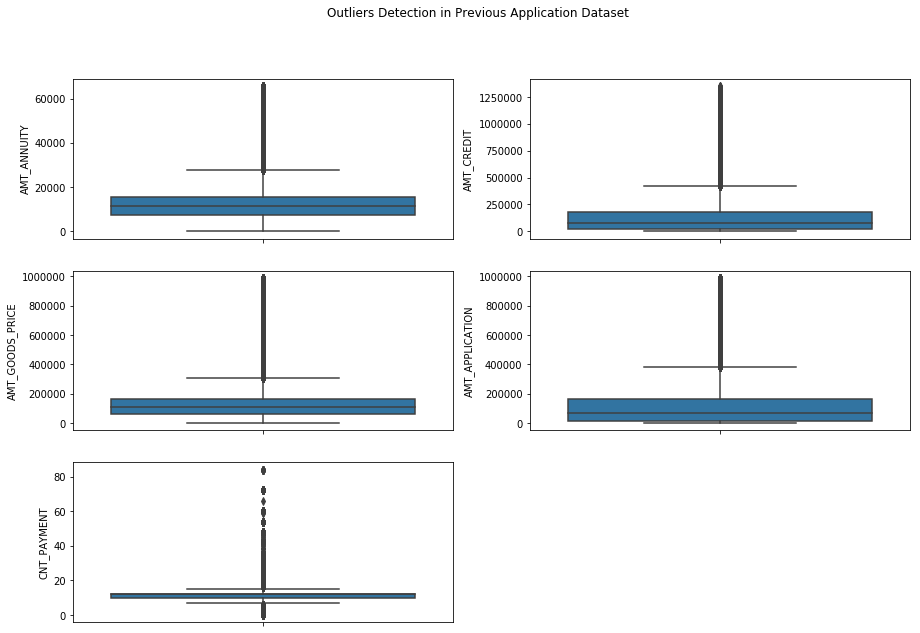

In [150]:
#Checking Again for outliers in AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, AMT_APPLICATION, CNT_PAYMENT
fig = plt.figure(figsize=(15,10))
fig.suptitle("Outliers Detection in Previous Application Dataset")
plt.subplot(321)
sns.boxplot(y=prev_data_without_outliers['AMT_ANNUITY'])
plt.subplot(322)
sns.boxplot(y=prev_data_without_outliers['AMT_CREDIT'])
plt.subplot(323)
sns.boxplot(y=prev_data_without_outliers['AMT_GOODS_PRICE'])
plt.subplot(324)
sns.boxplot(y=prev_data_without_outliers['AMT_APPLICATION'])
plt.subplot(325)
sns.boxplot(y=prev_data_without_outliers['CNT_PAYMENT'])
plt.show()

#Insights- 
1. There are still some outliers in our dataset but we will keep them for our analysis.
2. I see that all above amount fileds, CNT_PAYMENT field are continuous variable. So, lets divide them into bins.


In [151]:
application_range_list = list(prev_data_without_outliers['AMT_APPLICATION'].quantile([0, 0.7, 0.85,0.95,0.98,1]).values)
print(application_range_list)

amt_credit_list = list(prev_data_without_outliers['AMT_CREDIT'].quantile([0, 0.7, 0.85,0.95,0.98,1]).values)
print(amt_credit_list)

amt_gprice_list = list(prev_data_without_outliers['AMT_GOODS_PRICE'].quantile([0, 0.7, 0.85,0.95,0.98,1]).values)
print(amt_gprice_list)

amt_annuity_list = list(prev_data_without_outliers['AMT_ANNUITY'].quantile([0, 0.7, 0.85,0.95,0.98,1]).values)
print(amt_annuity_list)

term_list = list(prev_data_without_outliers['CNT_PAYMENT'].quantile([0,0.5,0.92,0.99, 1]).values)
#As we have minimum experince as 0, so not inserting 0 again in experience list
print(term_list)

application_slot = ['0-135000', '135000-265500', '265500-540000', '540000-765000', '765000-990000']
prev_data_without_outliers['AMT_APPLICATION_RANGE'] =pd.cut(prev_data_without_outliers['AMT_APPLICATION'], application_range_list, labels=application_slot)

credit_slot = ['0-152010', '152010-300055', '300055-630000','630000-855000', '855000-1352948']
prev_data_without_outliers['CREDIT_RANGE'] = pd.cut(prev_data_without_outliers['AMT_CREDIT'], amt_credit_list, labels=credit_slot)

gprice_slot = ['0-135000', '135000-265851', '265851-540000', '540000-765000', '765000-990000']
prev_data_without_outliers['GOODS_PRICE_RANGE'] = pd.cut(prev_data_without_outliers['AMT_GOODS_PRICE'], amt_gprice_list, labels=gprice_slot)


annuity_slot = ['0-13440','13440-21914','21914-33750','33750-44277','44277-65758']
prev_data_without_outliers['AMT_ANNUITY_RANGE'] = pd.cut(prev_data_without_outliers['AMT_ANNUITY'], amt_annuity_list, labels=annuity_slot)

term_slot = ['0-12','12-36','36-60','60-84']
prev_data_without_outliers['CNT_PAYMENT_SLOT'] = pd.cut(prev_data_without_outliers['CNT_PAYMENT'], term_list, labels=term_slot)



[0.0, 135000.0, 265500.0, 540000.0, 765000.0, 990000.0]
[0.0, 152010.0, 300054.59999999916, 630000.0, 855000.0, 1352947.5]
[0.0, 135000.0, 265851.0, 540000.0, 765000.0, 990000.0]
[0.0, 13439.735999999992, 21913.568999999945, 33750.0, 44277.39, 65758.5]
[0.0, 12.0, 36.0, 60.0, 84.0]


In [152]:
prev_data_without_outliers.dtypes

AMT_ANNUITY                float64
AMT_APPLICATION            float64
AMT_CREDIT                 float64
AMT_GOODS_PRICE            float64
CNT_PAYMENT                  int32
CODE_REJECT_REASON          object
NAME_CASH_LOAN_PURPOSE      object
NAME_CLIENT_TYPE            object
NAME_CONTRACT_STATUS        object
NAME_CONTRACT_TYPE          object
NAME_GOODS_CATEGORY         object
NAME_PAYMENT_TYPE           object
NAME_PORTFOLIO              object
NAME_SELLER_INDUSTRY        object
NAME_YIELD_GROUP            object
SK_ID_CURR                   int64
AMT_APPLICATION_RANGE     category
CREDIT_RANGE              category
GOODS_PRICE_RANGE         category
AMT_ANNUITY_RANGE         category
CNT_PAYMENT_SLOT          category
dtype: object

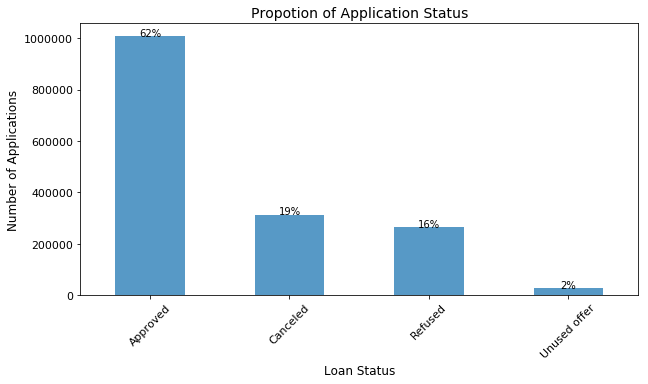

In [153]:
#Task - Data Imbalance

univariate_analysis(prev_data_without_outliers,'NAME_CONTRACT_STATUS','Propotion of Application Status','Loan Status')

In [154]:
#Insight-
#There are more number of applicantions which has been approved.

In [155]:
#Lets now first divide our dataset into two: one for approved applications and other is for refused applications.

prev_approved_df = prev_data_without_outliers[prev_data_without_outliers['NAME_CONTRACT_STATUS']=='Approved']
prev_refused_df = prev_data_without_outliers[prev_data_without_outliers['NAME_CONTRACT_STATUS']=='Refused']
print('Shape of Approved Dataset is:\n', prev_approved_df.shape)
print('Shape of Refued Dataset is:\n', prev_refused_df.shape)

Shape of Approved Dataset is:
 (1006666, 21)
Shape of Refued Dataset is:
 (264203, 21)


In [156]:
print('Percentage of Approved applicants in our dataset: ', round(100 *(len(prev_approved_df)/len(prev_data_without_outliers)),2))
print('Percentage of Refused applicants in our dataset: ', round(100 *(len(prev_refused_df)/len(prev_data_without_outliers)),2))

print('Data Imbalance Percentage in previous_application dataset: ', round(100 *(len(prev_refused_df)/len(prev_approved_df)),2) )

Percentage of Approved applicants in our dataset:  62.48
Percentage of Refused applicants in our dataset:  16.4
Data Imbalance Percentage in previous_application dataset:  26.25


In [157]:
#Assumptions
#Few of these columns have the XNA and XAP values
#XNA = not available
#XAP = not applicable (X as a logical not !?) 
#Removing XNA and XAP for better visualisation in the plots

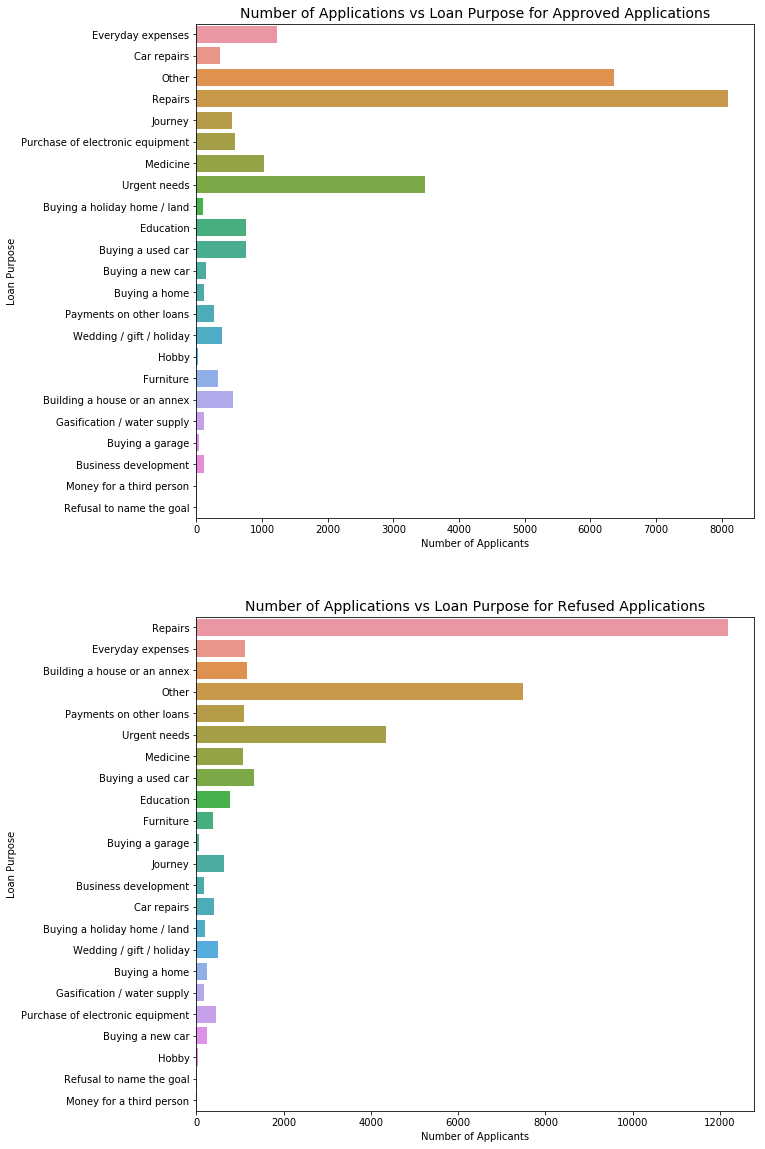

In [158]:
#---------------------Univariate Analyis for Accepted and Refused Loan Status Dataset---------------

#Loan Purpose
plt.figure(figsize=(10,20))
plt.subplot(211)
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',data=prev_approved_df[(prev_approved_df['NAME_CASH_LOAN_PURPOSE']!='XAP') & (prev_approved_df['NAME_CASH_LOAN_PURPOSE']!='XNA')])
plt.ylabel('Loan Purpose')
plt.xlabel('Number of Applicants')
plt.title('Number of Applications vs Loan Purpose for Approved Applications',fontsize=14)
plt.subplot(212)
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',data=prev_refused_df[(prev_refused_df['NAME_CASH_LOAN_PURPOSE']!='XAP') & (prev_refused_df['NAME_CASH_LOAN_PURPOSE']!='XNA')])
plt.ylabel('Loan Purpose')
plt.xlabel('Number of Applicants')
plt.title('Number of Applications vs Loan Purpose for Refused Applications',fontsize=14)
plt.show()

In [159]:
#We can infer from the above plots that most the applicants had previously applied for Repairs

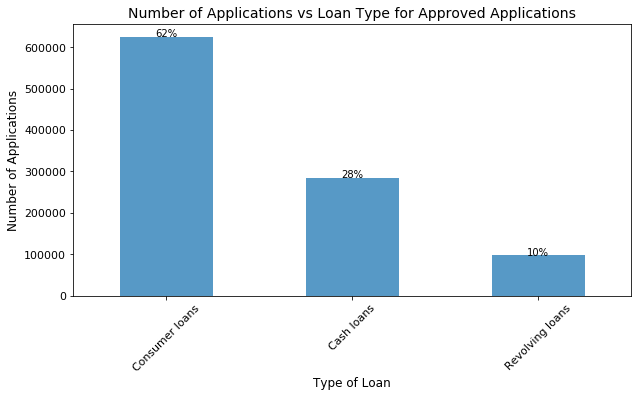

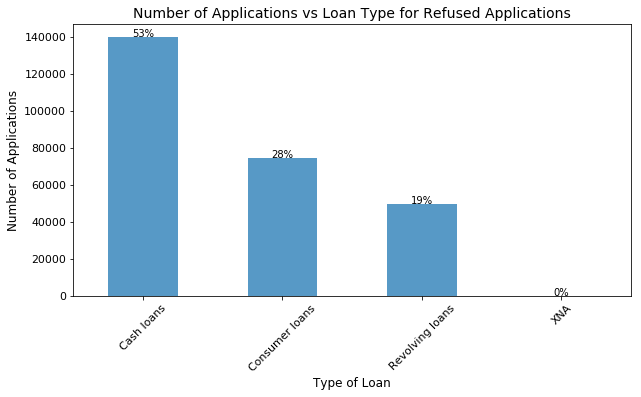

In [160]:
#Type of Loan

univariate_analysis(prev_approved_df,'NAME_CONTRACT_TYPE','Number of Applications vs Loan Type for Approved Applications','Type of Loan')
univariate_analysis(prev_refused_df,'NAME_CONTRACT_TYPE','Number of Applications vs Loan Type for Refused Applications','Type of Loan')

In [161]:
#Insight -
#Clearly, There is more propotion of Cash loans getting rejected and Consumer loans getting approved.
#Also, there are less chances of revolving loans getting approved.

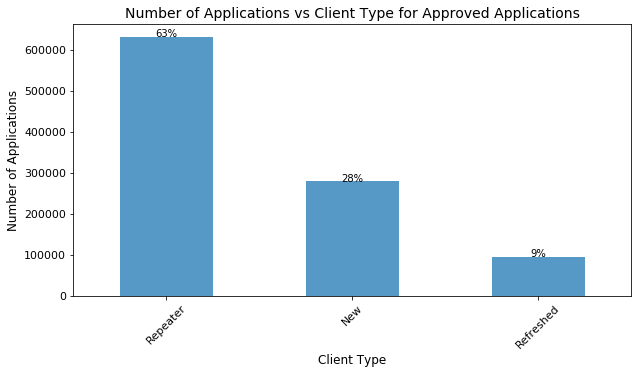

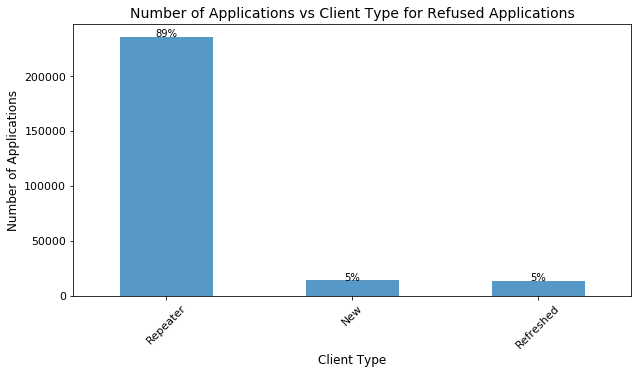

In [162]:
#Client Type

cli_type = np.unique(prev_approved_df['NAME_CLIENT_TYPE'].values)
#print(cli_type)
cli_typelist = ['New','Refreshed','Repeater']
#print(cli_typelist)

prev_approved_df1 = prev_approved_df[prev_approved_df["NAME_CLIENT_TYPE"].isin(cli_typelist) ]
univariate_analysis(prev_approved_df1,'NAME_CLIENT_TYPE','Number of Applications vs Client Type for Approved Applications','Client Type')

prev_refused_df1 = prev_refused_df[prev_refused_df["NAME_CLIENT_TYPE"].isin(cli_typelist) ]
univariate_analysis(prev_refused_df1,'NAME_CLIENT_TYPE','Number of Applications vs Client Type for Refused Applications','Client Type')

In [163]:
#Insights -
# There are highest probability of Repeater client's application getting approved followed by new applications.

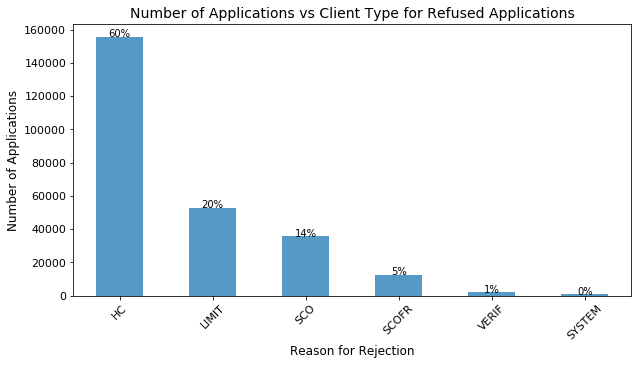

In [164]:
#Here I have not checked for approved dataset, as CODE_REJECT_REASON is XAP i.e. Not Applicable for approved application.
#Client Type

reject_rsn = np.unique(prev_refused_df['CODE_REJECT_REASON'].values)
#print(reject_rsn)
reject_rsnlist =['HC','LIMIT','SCO','SCOFR','SYSTEM','VERIF']
#print(reject_rsnlist)

prev_refused_df1 = prev_refused_df[prev_refused_df["CODE_REJECT_REASON"].isin(reject_rsnlist) ]
univariate_analysis(prev_refused_df1,'CODE_REJECT_REASON','Number of Applications vs Client Type for Refused Applications','Reason for Rejection')

In [165]:
#Insights - Most number of applications are rejected because of HC.

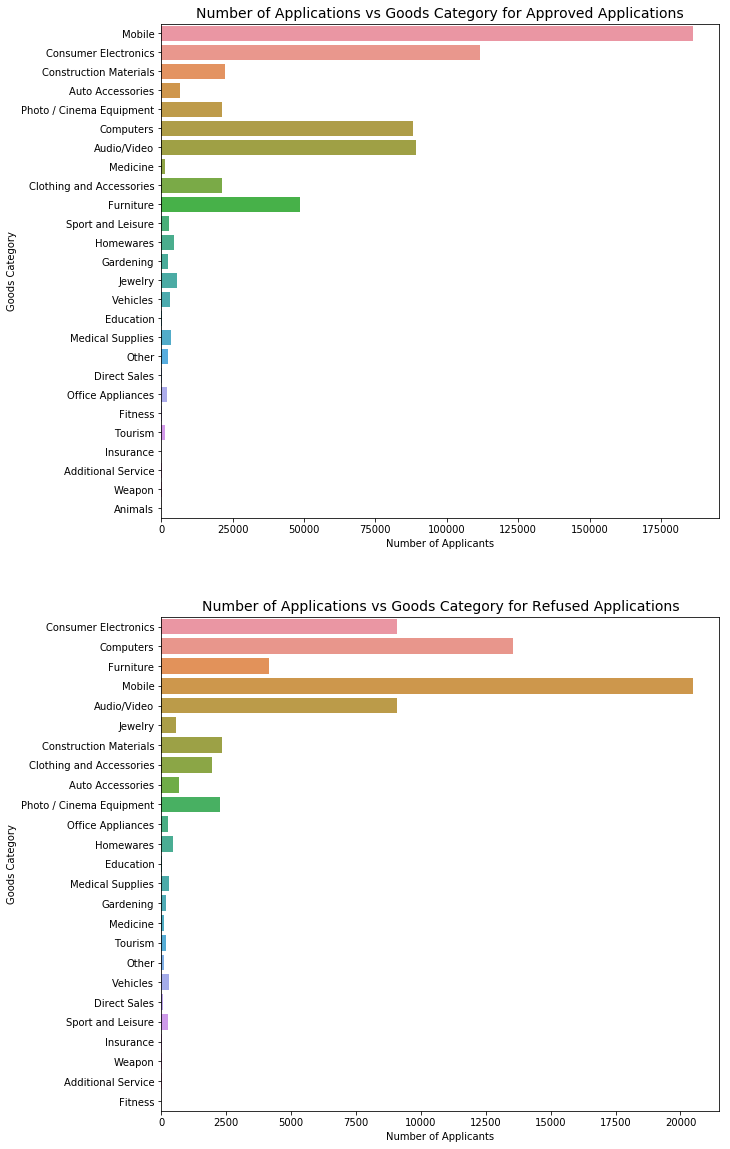

In [166]:
#goods Category

plt.figure(figsize=(10,20))
plt.subplot(211)
sns.countplot(y='NAME_GOODS_CATEGORY',data=prev_approved_df[(prev_approved_df['NAME_GOODS_CATEGORY']!='XAP') & (prev_approved_df['NAME_GOODS_CATEGORY']!='XNA')])
plt.ylabel('Goods Category')
plt.xlabel('Number of Applicants')
plt.title('Number of Applications vs Goods Category for Approved Applications',fontsize=14)
plt.subplot(212)
sns.countplot(y='NAME_GOODS_CATEGORY',data=prev_refused_df[(prev_refused_df['NAME_GOODS_CATEGORY']!='XAP') & (prev_refused_df['NAME_GOODS_CATEGORY']!='XNA')])
plt.ylabel('Goods Category')
plt.xlabel('Number of Applicants')
plt.title('Number of Applications vs Goods Category for Refused Applications',fontsize=14)
plt.show()

In [167]:
#Highest proportion of loan applications are approved for Mobiles followed by consumer electronics.

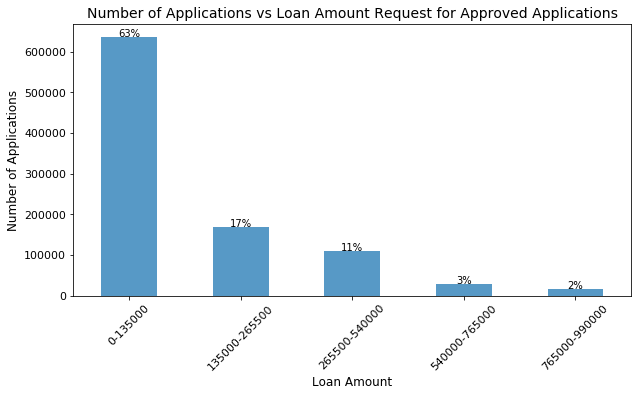

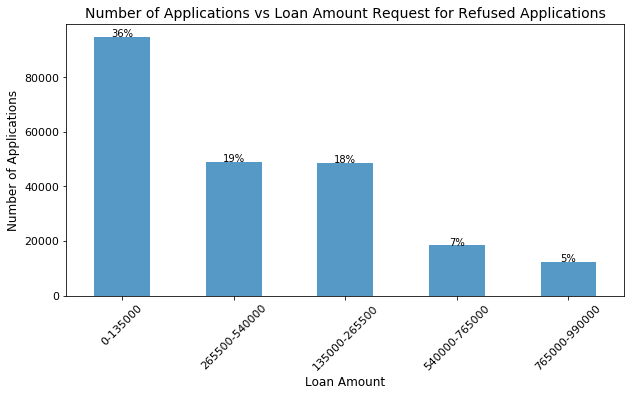

In [168]:
#Loan Amount
univariate_analysis(prev_approved_df,'AMT_APPLICATION_RANGE','Number of Applications vs Loan Amount Request for Approved Applications','Loan Amount')
univariate_analysis(prev_refused_df,'AMT_APPLICATION_RANGE','Number of Applications vs Loan Amount Request for Refused Applications','Loan Amount')

In [169]:
#Insights: More number of applications are approved if loan is <135000.
#But with increase in loan amount request, chances of it getting rejected gets increased.

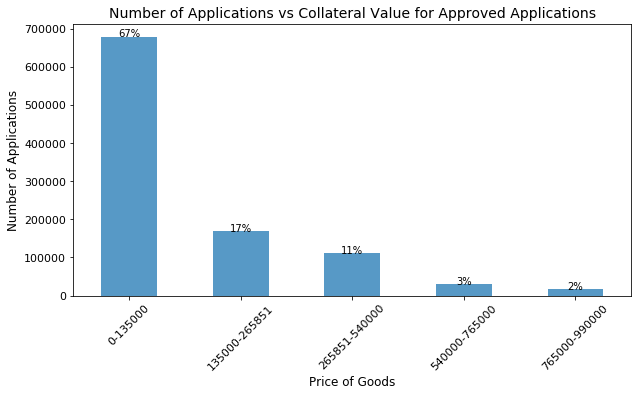

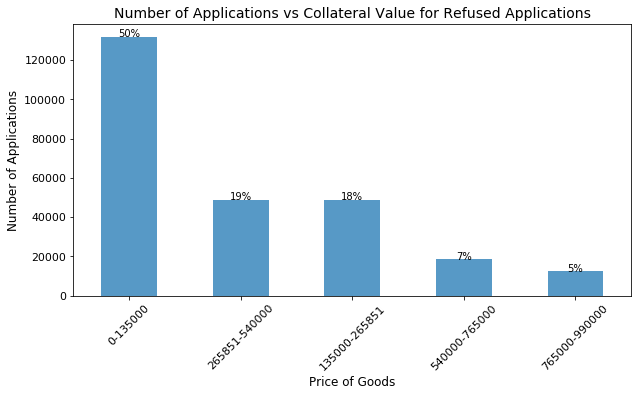

In [170]:
#Goods Price Range

univariate_analysis(prev_approved_df,'GOODS_PRICE_RANGE','Number of Applications vs Collateral Value for Approved Applications','Price of Goods')
univariate_analysis(prev_refused_df,'GOODS_PRICE_RANGE','Number of Applications vs Collateral Value for Refused Applications','Price of Goods')

In [171]:
#Insights - Most of the pplications are rejected if a person submit a collateral value of less than 1.35 Lakhs

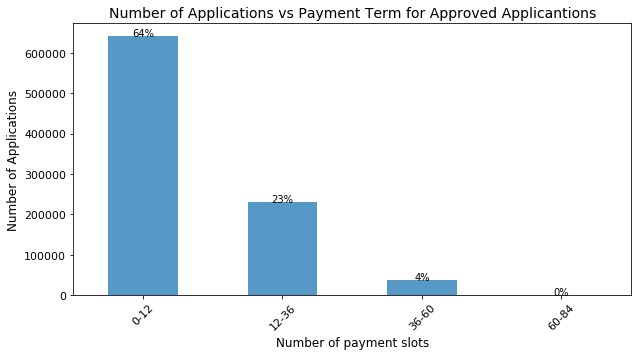

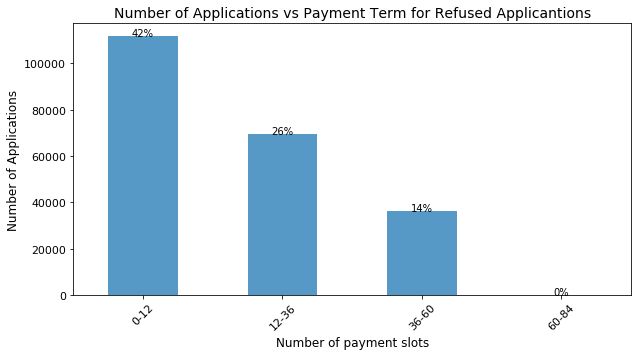

In [172]:
#Payment slot count

univariate_analysis(prev_approved_df,'CNT_PAYMENT_SLOT','Number of Applications vs Payment Term for Approved Applicantions','Number of payment slots')
univariate_analysis(prev_refused_df,'CNT_PAYMENT_SLOT','Number of Applications vs Payment Term for Refused Applicantions','Number of payment slots')

In [173]:
#Insights - Chances of a loan applications gets decreases with increase in Application Payment Term

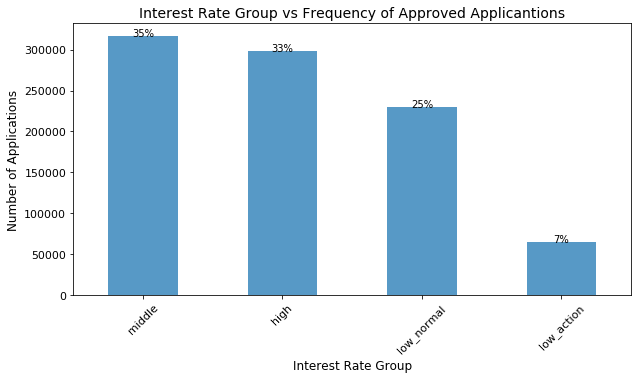

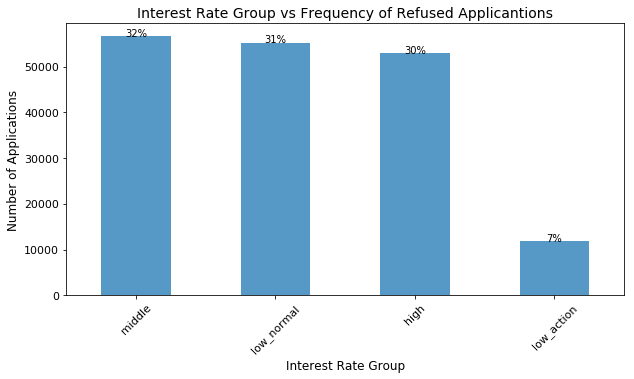

In [174]:
#Interest Rate Group

univariate_analysis(prev_approved_df[prev_approved_df['NAME_YIELD_GROUP']!='XNA'],'NAME_YIELD_GROUP','Interest Rate Group vs Frequency of Approved Applicantions','Interest Rate Group')
univariate_analysis(prev_refused_df[prev_refused_df['NAME_YIELD_GROUP']!='XNA'],'NAME_YIELD_GROUP','Interest Rate Group vs Frequency of Refused Applicantions','Interest Rate Group')

In [175]:
#Insight -

#There are higher chances of applications being rejected if interest group is low_normal.
#There are higher chances of applications getting approved if interest group is medium or high.

In [176]:
#------------- picking relevent fields to check if they are correlated ----------------- 

In [177]:
#finding the numeric columns in the previous application dataset
numeric_cols_prev = prev_approved_df.select_dtypes(include = numerictype).columns
print(numeric_cols_prev)

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CNT_PAYMENT', 'SK_ID_CURR'],
      dtype='object')


In [178]:
#remove SK_ID_CURR column from dataset
prev_approved_df.drop('SK_ID_CURR', axis=1,inplace=True)

In [179]:
#Creating a correlation matrix
approved_metric = prev_approved_df.corr()
approved_metric

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.792378,0.818034,0.805765,0.300101
AMT_APPLICATION,0.792378,1.000000,0.922987,0.991362,0.634026
AMT_CREDIT,0.818034,0.922987,1.000000,0.952172,0.589723
AMT_GOODS_PRICE,0.805765,0.991362,0.952172,1.000000,0.609841
CNT_PAYMENT,0.300101,0.634026,0.589723,0.609841,1.000000


In [180]:
#remove SK_ID_CURR column from dataset
prev_refused_df.drop('SK_ID_CURR', axis=1,inplace=True)

In [181]:
#Creating a correlation matrix
refused_metric = prev_refused_df.corr()
refused_metric

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.769335,0.781490,0.782725,0.375673
AMT_APPLICATION,0.769335,1.000000,0.953442,0.986364,0.655367
AMT_CREDIT,0.781490,0.953442,1.000000,0.954484,0.655644
AMT_GOODS_PRICE,0.782725,0.986364,0.954484,1.000000,0.649304
CNT_PAYMENT,0.375673,0.655367,0.655644,0.649304,1.000000


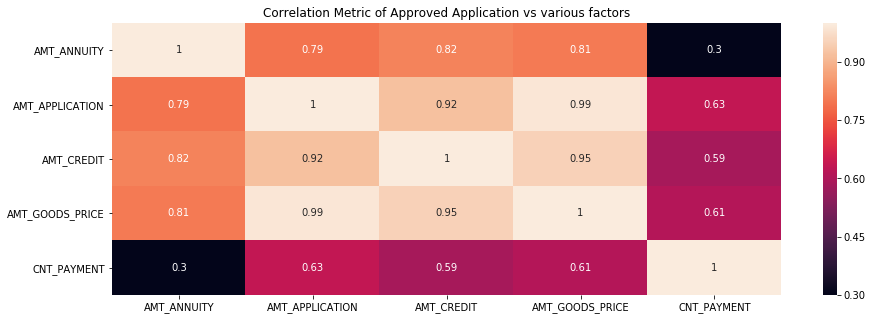

In [182]:
plt.figure(figsize=(15,5))
sns.heatmap(approved_metric, xticklabels=approved_metric.columns, yticklabels=approved_metric.columns,annot=True)
plt.title("Correlation Metric of Approved Application vs various factors")
plt.show()

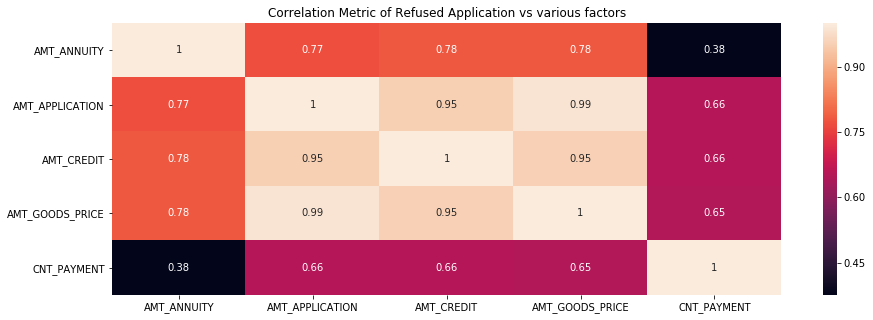

In [183]:
plt.figure(figsize=(15,5))
sns.heatmap(refused_metric, xticklabels=refused_metric.columns, yticklabels=refused_metric.columns,annot=True)
plt.title("Correlation Metric of Refused Application vs various factors")
plt.show()

In [184]:
#remove SK_ID_CURR column from dataset
prev_data_without_outliers.drop('SK_ID_CURR', axis=1,inplace=True)

In [185]:
full_dataset = prev_data_without_outliers.corr()
full_dataset

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
AMT_ANNUITY,1.000000,0.763065,0.781815,0.795505,0.335748
AMT_APPLICATION,0.763065,1.000000,0.944545,0.966116,0.640943
AMT_CREDIT,0.781815,0.944545,1.000000,0.932974,0.615628
AMT_GOODS_PRICE,0.795505,0.966116,0.932974,1.000000,0.641430
CNT_PAYMENT,0.335748,0.640943,0.615628,0.641430,1.000000


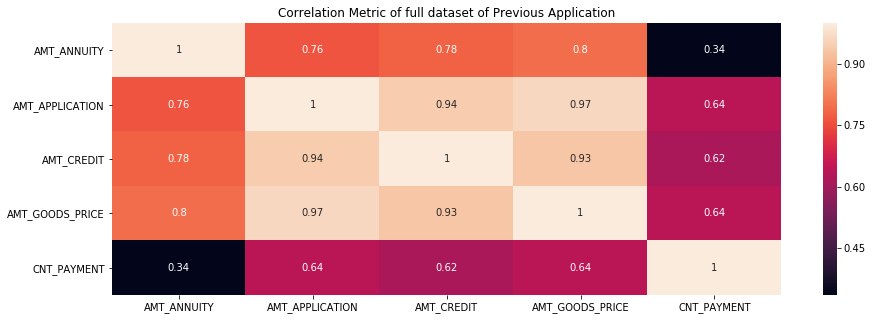

In [186]:
plt.figure(figsize=(15,5))
sns.heatmap(full_dataset, xticklabels=full_dataset.columns, yticklabels=full_dataset.columns,annot=True)
plt.title("Correlation Metric of full dataset of Previous Application")
plt.show()

In [187]:
# Select upper triangle of correlation matrix
upper1 = approved_metric.where(np.triu(np.ones(approved_metric.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation
correlatedCols_approved50 = [column for column in upper1.columns if any(upper1[column] > 0.50)]
correlatedCols_approved75 = [column for column in upper1.columns if any(upper1[column] > 0.75)]
correlatedCols_approved90 = [column for column in upper1.columns if any(upper1[column] > 0.95)]

print("greater than 50% correlation",correlatedCols_approved50)
print("greater than 75% correlation",correlatedCols_approved75)
print("greater than 95% correlation",correlatedCols_approved90)

greater than 50% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
greater than 75% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
greater than 95% correlation ['AMT_GOODS_PRICE']


In [188]:
upper2 = refused_metric.where(np.triu(np.ones(refused_metric.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation
correlatedCols_rejected50 = [column for column in upper2.columns if any(upper2[column] > 0.50)]
correlatedCols_rejected75 = [column for column in upper2.columns if any(upper2[column] > 0.75)]
correlatedCols_rejected95 = [column for column in upper2.columns if any(upper2[column] > 0.95)]

print("greater than 50% correlation",correlatedCols_rejected50)
print("greater than 75% correlation",correlatedCols_rejected75)
print("greater than 95% correlation",correlatedCols_rejected95)

greater than 50% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
greater than 75% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
greater than 95% correlation ['AMT_CREDIT', 'AMT_GOODS_PRICE']


In [189]:
upper3 = full_dataset.where(np.triu(np.ones(full_dataset.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation
correlatedCols_fulldata50 = [column for column in upper3.columns if any(upper3[column] > 0.50)]
correlatedCols_fulldata75 = [column for column in upper3.columns if any(upper3[column] > 0.75)]
correlatedCols_fulldata95 = [column for column in upper3.columns if any(upper3[column] > 0.95)]

print("greater than 50% correlation",correlatedCols_fulldata50)
print("greater than 75% correlation",correlatedCols_fulldata75)
print("greater than 95% correlation",correlatedCols_fulldata95)

greater than 50% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
greater than 75% correlation ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE']
greater than 95% correlation ['AMT_GOODS_PRICE']


In [190]:
#It is clear from the HEAT map that 
#--the loan amount is highly correlated with the goods price
#--the loan amount credited is correlated with the annuity amount
#--the count of payment is correlated with loan amount,loan amount credited and annuity amount

#As a result, we can use one of these columns out of each for analysing our data and providing the expected result

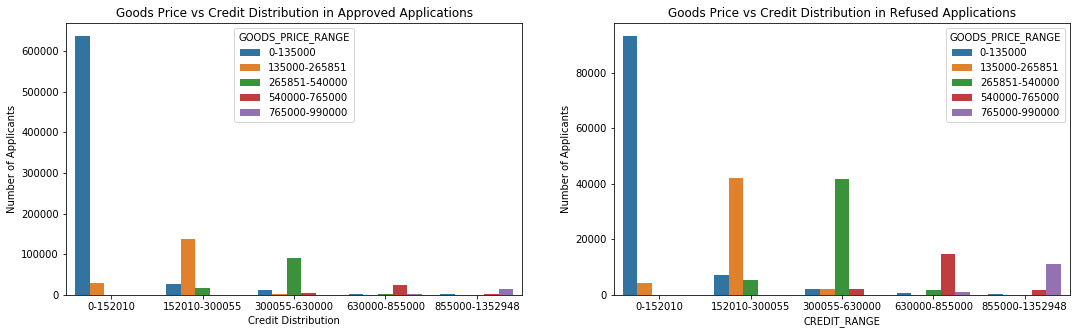

In [191]:
#--------------------------Bivariate analysis based on Loan Status (Approved Or Rejected)------------------------------------

plt.figure(figsize=(18,5))
plt.subplot(121)
sns.countplot(x='CREDIT_RANGE', hue='GOODS_PRICE_RANGE', data =prev_approved_df )
plt.title('Goods Price vs Credit Distribution in Approved Applications')
plt.ylabel('Number of Applicants')
plt.xlabel('Credit Distribution')
plt.subplot(122)
sns.countplot(x='CREDIT_RANGE', hue='GOODS_PRICE_RANGE', data =prev_refused_df )
plt.title('Goods Price vs Credit Distribution in Refused Applications')
plt.ylabel('Credit Distribution')
plt.ylabel('Number of Applicants')
plt.show()

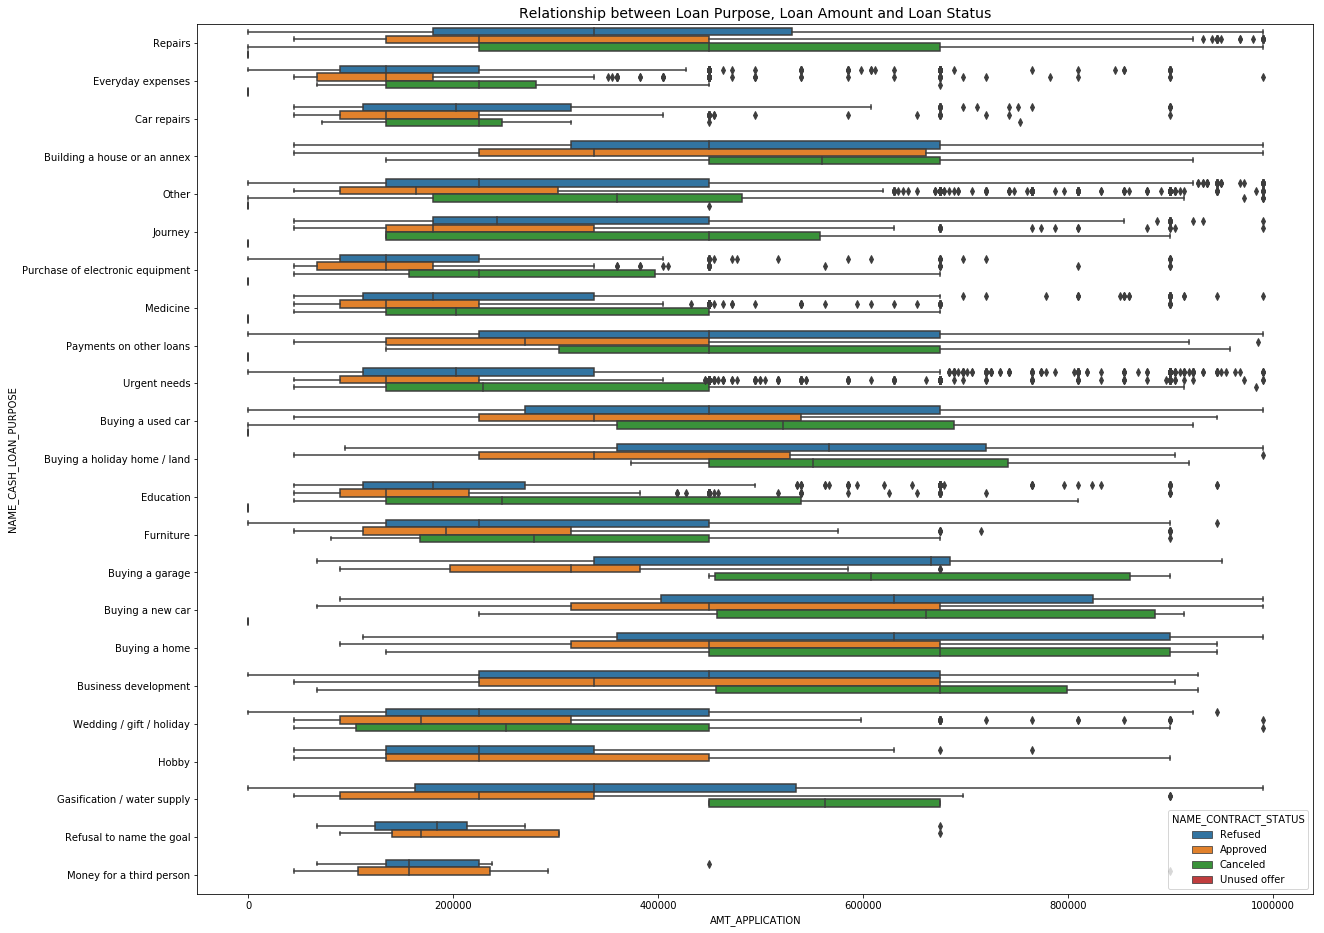

In [192]:
#Relation between loan purpose, loan amount and status
loan_purposelist = ['Building a house or an annex', 'Business development', 'Buying a garage', 'Buying a holiday home / land', 'Buying a home', 'Buying a new car', 'Buying a used car', 'Car repairs', 'Education', 'Everyday expenses', 'Furniture', 'Gasification / water supply', 'Hobby', 'Journey', 'Medicine', 'Money for a third person', 'Other', 'Payments on other loans', 'Purchase of electronic equipment', 'Refusal to name the goal', 'Repairs', 'Urgent needs', 'Wedding / gift / holiday']
#print(loan_purposelist)

prev_data_without_outliers1 = prev_data_without_outliers[prev_data_without_outliers["NAME_CASH_LOAN_PURPOSE"].isin(loan_purposelist) ]
plt.figure(figsize=(20,16))
sns.boxplot(data =prev_data_without_outliers1, x='AMT_APPLICATION', y='NAME_CASH_LOAN_PURPOSE', hue ='NAME_CONTRACT_STATUS')
plt.title("Relationship between Loan Purpose, Loan Amount and Loan Status", fontsize=14)
plt.show()

In [193]:
#By looking at above plot we can see EveryDay expenses and purchase of electronic equipment have a lot of outlieres
#in Approved Status and which will contribute to more losses for the bank. 
#Medicines,Car Repairs,urgent needs and Education also needs to be closely monitored.
#Hence while giving loan for above categories bank should have more proactive checks.

In [194]:
#We can also calculate the chances of an application getting rejected

#Find the probability of rejection to identify the rejected applicants
#We know that probability of any event is occurence of that event happening/total events

#In our case, Probability of rejected = rejected/(rejected + approved)

#Lets create a function to calculate the default percentage and also a fucntion to perform bivariate analysis by using this 
#probability

In [195]:
#Creating a list to store the loan status values
contract_status = np.unique(prev_data_without_outliers1['NAME_CONTRACT_STATUS'].values)
print(contract_status)
contract_statuslist = list(contract_status)
print(contract_statuslist)

['Approved' 'Canceled' 'Refused' 'Unused offer']
['Approved', 'Canceled', 'Refused', 'Unused offer']


In [196]:
def rejection_precentage(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['NAME_CONTRACT_STATUS'],margins=True)
    def_tab['All'] = def_tab['Refused'] + def_tab['Approved'] + def_tab['Canceled'] + def_tab['Unused offer']
    def_tab['Rejection Probability'] = round((def_tab['Refused']/def_tab['All']),3)
    def_tab = def_tab[0:-1] # removing last row with sum totol 
    return def_tab

In [197]:
def bivariate_analysisRejection(df,col,title,stacked=False):
    
    plot = rejection_precentage(df,col)
    #display(plot)
    #initializing line plot
    plt.figure(figsize=(15,10))
    
    linePlot = plot[['Rejection Probability']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(title+' vs Rejection Probability',fontsize=20,weight="bold")
    line.set_xlabel(df[col].name.title(),fontsize=14)
    line.set_ylabel('Rejection Probability',color = 'r',fontsize=20)
    
    #initializing bar plot
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=90,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
    
    plt.show()

<Figure size 1080x720 with 0 Axes>

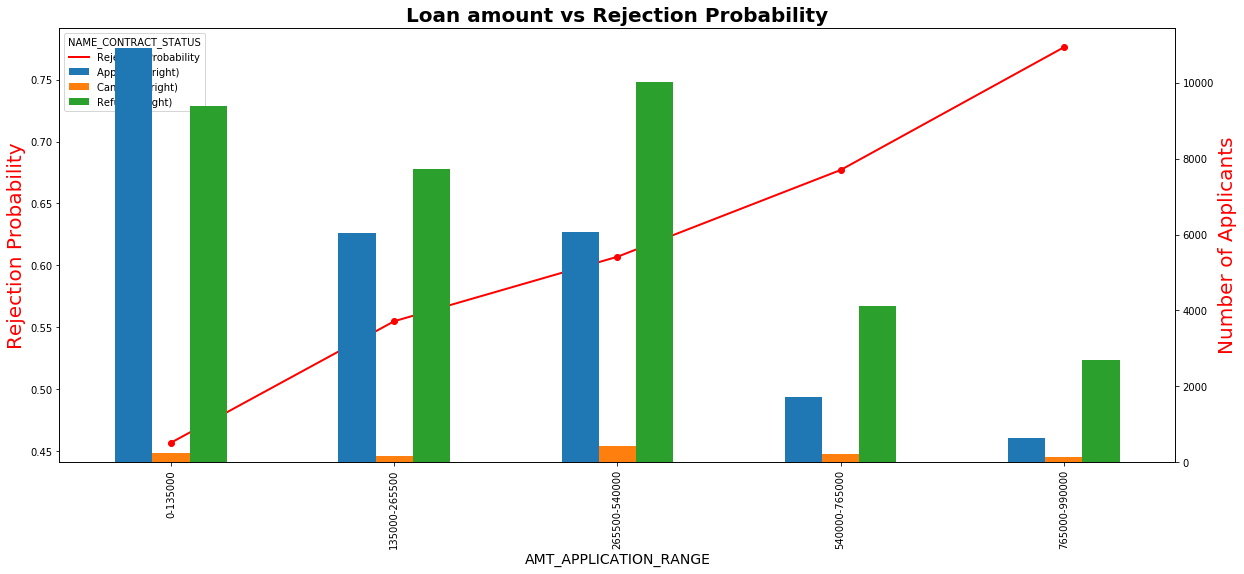

In [198]:
bivariate_analysisRejection(prev_data_without_outliers1,'AMT_APPLICATION_RANGE','Loan amount')

In [199]:
#Rejection probability is high when the loan amount is more

<Figure size 1080x720 with 0 Axes>

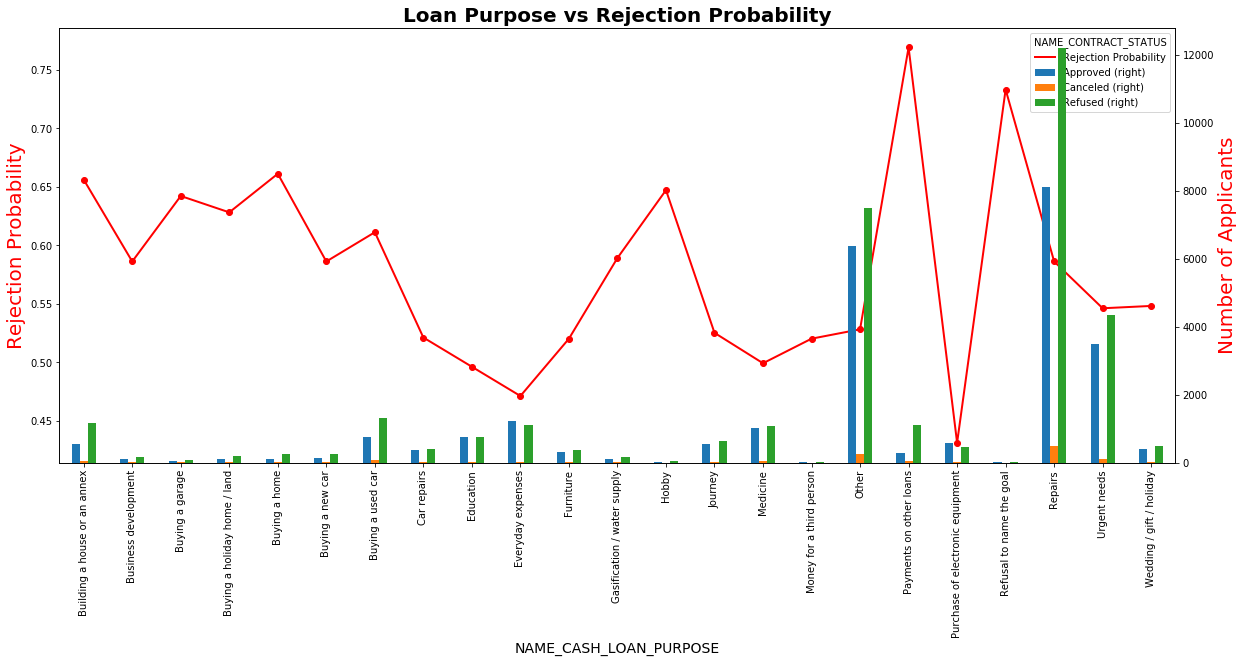

In [200]:
bivariate_analysisRejection(prev_data_without_outliers1,'NAME_CASH_LOAN_PURPOSE','Loan Purpose')

In [201]:
#Insight-
#Rejection probability is high on the below items
#Buying a Home
#Building a house
#Hobby
#Payment on other loans
#Refusal to name the goal

In [202]:
#--------------------------End Of Analysis----------------------------